In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error

In [12]:
df = pd.read_csv('train.csv', index_col='id')

In [14]:
df.T

id,0,1,2,3,4,5,6,7,8,9,...,15279,15280,15281,15282,15283,15284,15285,15286,15287,15288
clonesize,25.000000,25.000000,12.500000,12.500000,25.000000,25.000000,12.500000,12.500000,25.000000,25.000000,...,12.500000,25.000000,25.000000,25.000000,25.000000,12.500000,12.500000,25.000000,25.000000,25.000000
honeybee,0.500000,0.500000,0.250000,0.250000,0.500000,0.500000,0.250000,0.250000,0.500000,0.500000,...,0.250000,0.500000,0.500000,0.500000,0.500000,0.250000,0.250000,0.500000,0.500000,0.500000
bumbles,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.380000,0.250000,0.380000,0.250000,...,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000
andrena,0.750000,0.500000,0.630000,0.630000,0.630000,0.630000,0.500000,0.750000,0.380000,0.630000,...,0.380000,0.500000,0.630000,0.630000,0.750000,0.380000,0.250000,0.380000,0.630000,0.630000
osmia,0.500000,0.500000,0.630000,0.500000,0.630000,0.750000,0.630000,0.750000,0.750000,0.630000,...,0.500000,0.500000,0.750000,0.630000,0.500000,0.500000,0.500000,0.750000,0.630000,0.500000
MaxOfUpperTRange,69.700000,69.700000,86.000000,77.400000,77.400000,94.600000,86.000000,86.000000,94.600000,94.600000,...,94.600000,94.600000,77.400000,94.600000,77.400000,77.400000,86.000000,77.400000,69.700000,77.400000
MinOfUpperTRange,42.100000,42.100000,52.000000,46.800000,46.800000,57.200000,52.000000,52.000000,57.200000,57.200000,...,57.200000,57.200000,46.800000,57.200000,46.800000,46.800000,52.000000,46.800000,42.100000,46.800000
AverageOfUpperTRange,58.200000,58.200000,71.900000,64.700000,64.700000,79.000000,71.900000,71.900000,79.000000,79.000000,...,79.000000,79.000000,64.700000,79.000000,64.700000,64.700000,71.900000,64.700000,58.200000,64.700000
MaxOfLowerTRange,50.200000,50.200000,62.000000,55.800000,55.800000,68.200000,62.000000,62.000000,68.200000,68.200000,...,68.200000,68.200000,55.800000,68.200000,55.800000,55.800000,62.000000,55.800000,50.200000,55.800000
MinOfLowerTRange,24.300000,24.300000,30.000000,27.000000,27.000000,33.000000,30.000000,30.000000,33.000000,33.000000,...,33.000000,33.000000,27.000000,33.000000,27.000000,27.000000,30.000000,27.000000,24.300000,27.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15289 entries, 0 to 15288
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clonesize             15289 non-null  float64
 1   honeybee              15289 non-null  float64
 2   bumbles               15289 non-null  float64
 3   andrena               15289 non-null  float64
 4   osmia                 15289 non-null  float64
 5   MaxOfUpperTRange      15289 non-null  float64
 6   MinOfUpperTRange      15289 non-null  float64
 7   AverageOfUpperTRange  15289 non-null  float64
 8   MaxOfLowerTRange      15289 non-null  float64
 9   MinOfLowerTRange      15289 non-null  float64
 10  AverageOfLowerTRange  15289 non-null  float64
 11  RainingDays           15289 non-null  float64
 12  AverageRainingDays    15289 non-null  float64
 13  fruitset              15289 non-null  float64
 14  fruitmass             15289 non-null  float64
 15  seeds              

In [17]:
print(df.describe())

          clonesize      honeybee       bumbles       andrena         osmia  \
count  15289.000000  15289.000000  15289.000000  15289.000000  15289.000000   
mean      19.704690      0.389314      0.286768      0.492675      0.592355   
std        6.595211      0.361643      0.059917      0.148115      0.139489   
min       10.000000      0.000000      0.000000      0.000000      0.000000   
25%       12.500000      0.250000      0.250000      0.380000      0.500000   
50%       25.000000      0.500000      0.250000      0.500000      0.630000   
75%       25.000000      0.500000      0.380000      0.630000      0.750000   
max       40.000000     18.430000      0.585000      0.750000      0.750000   

       MaxOfUpperTRange  MinOfUpperTRange  AverageOfUpperTRange  \
count      15289.000000      15289.000000          15289.000000   
mean          82.169887         49.673281             68.656256   
std            9.146703          5.546405              7.641807   
min           69.700

In [28]:
X

,const,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
id,,,,,,,,,,,,,,,,,
0,1.0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887
1,1.0,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317
2,1.0,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781
3,1.0,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561
4,1.0,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15284,1.0,12.5,0.25,0.25,0.38,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.556302,0.476308,40.546480
15285,1.0,12.5,0.25,0.25,0.25,0.50,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.354413,0.388145,29.467434
15286,1.0,25.0,0.50,0.25,0.38,0.75,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.422548,0.416786,32.299059


## EDA

array([[<AxesSubplot:title={'center':'clonesize'}>,
        <AxesSubplot:title={'center':'honeybee'}>,
        <AxesSubplot:title={'center':'bumbles'}>,
        <AxesSubplot:title={'center':'andrena'}>],
       [<AxesSubplot:title={'center':'osmia'}>,
        <AxesSubplot:title={'center':'MaxOfUpperTRange'}>,
        <AxesSubplot:title={'center':'MinOfUpperTRange'}>,
        <AxesSubplot:title={'center':'AverageOfUpperTRange'}>],
       [<AxesSubplot:title={'center':'MaxOfLowerTRange'}>,
        <AxesSubplot:title={'center':'MinOfLowerTRange'}>,
        <AxesSubplot:title={'center':'AverageOfLowerTRange'}>,
        <AxesSubplot:title={'center':'RainingDays'}>],
       [<AxesSubplot:title={'center':'AverageRainingDays'}>,
        <AxesSubplot:title={'center':'fruitset'}>,
        <AxesSubplot:title={'center':'fruitmass'}>,
        <AxesSubplot:title={'center':'seeds'}>],
       [<AxesSubplot:title={'center':'yield'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=objec

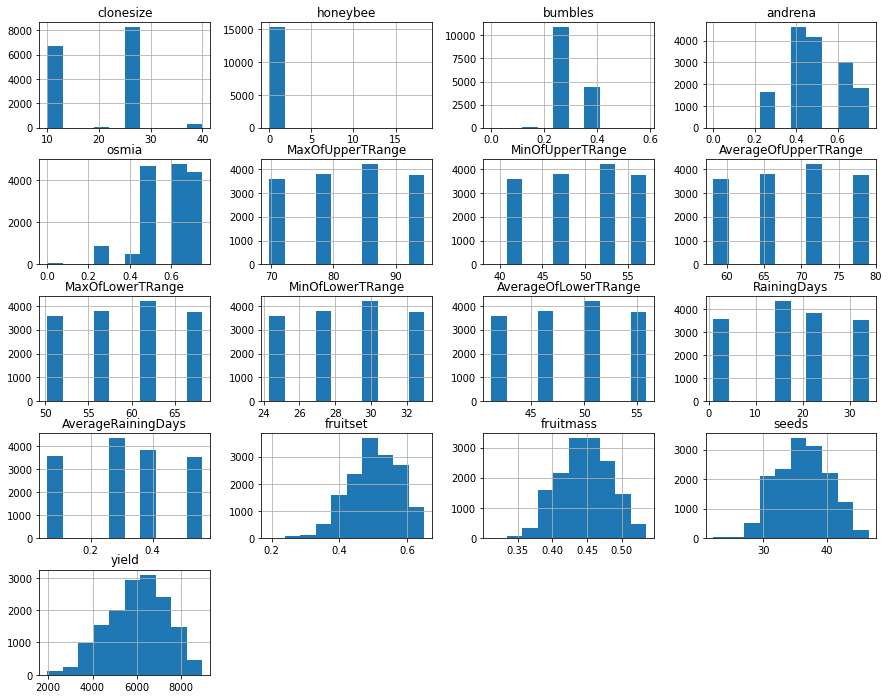

In [114]:
# Plot the histograms of each column
df.hist(figsize=(15, 12))

In [115]:
df.nunique()

clonesize                  6
honeybee                   7
bumbles                   11
andrena                   16
osmia                     14
MaxOfUpperTRange           6
MinOfUpperTRange           5
AverageOfUpperTRange       5
MaxOfLowerTRange           6
MinOfLowerTRange           7
AverageOfLowerTRange       5
RainingDays                6
AverageRainingDays         8
fruitset                1526
fruitmass               1515
seeds                   2066
yield                    776
dtype: int64

In [125]:
# Get the number of unique values in each column
nunique = df.nunique().drop('yield')

# Select the columns with less than 20 unique values
dummy_cols = list(nunique[nunique < 20].index)
scaled_cols = list(nunique[nunique >= 20].index)

In [126]:
dummy_cols

['clonesize',
 'honeybee',
 'bumbles',
 'andrena',
 'osmia',
 'MaxOfUpperTRange',
 'MinOfUpperTRange',
 'AverageOfUpperTRange',
 'MaxOfLowerTRange',
 'MinOfLowerTRange',
 'AverageOfLowerTRange',
 'RainingDays',
 'AverageRainingDays']

In [127]:
scaled_cols

['fruitset', 'fruitmass', 'seeds']

In [128]:
len(dummy_cols) + len(scaled_cols)

16

In [129]:
len(df.columns)

17

## Scaling Data

In [132]:
# Create a StandardScaler object
scaler = StandardScaler()

# Scale the selected columns and create a new DataFrame
scaled_df = pd.DataFrame(scaler.fit_transform(df[scaled_cols]), columns=scaled_cols)

# Concatenate the scaled columns with the non-scaled columns
scaled_df = pd.concat([scaled_df, df.drop(scaled_cols, axis=1)], axis=1)

In [133]:
scaled_df

,fruitset,fruitmass,seeds,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,yield
0,-1.044938,-0.783260,-0.918905,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,4476.81146
1,-0.777454,-0.661588,-0.572230,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,5548.12201
2,0.674659,0.656157,0.540029,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,6869.77760
3,0.850087,0.852832,0.819312,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,6880.77590
4,1.034261,1.285628,1.071598,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,7479.93417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15284,0.720029,0.803468,1.086971,12.5,0.25,0.25,0.38,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,7667.83619
15285,-1.993998,-1.577126,-1.661521,12.5,0.25,0.25,0.25,0.50,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,3680.56025
15286,-1.078051,-0.803777,-0.959051,25.0,0.50,0.25,0.38,0.75,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,4696.44394
15287,0.530056,-0.335372,0.126345,25.0,0.50,0.25,0.63,0.63,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,6772.93347


## Train/Test Split

In [143]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_df.drop('yield', axis=1), scaled_df['yield'], test_size=0.2)

In [144]:
# Print the shapes of the training and testing sets
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (12231, 16)
y_train shape: (12231,)
X_test shape: (3058, 16)
y_test shape: (3058,)


## Model 1: OLS

In [179]:
# Add constant to X for OLS
X = sm.add_constant(X_train)

# Fit the OLS model
model = sm.OLS(y_train, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     3319.
Date:                Tue, 02 May 2023   Prob (F-statistic):               0.00
Time:                        12:15:53   Log-Likelihood:                -95126.
No. Observations:               12231   AIC:                         1.903e+05
Df Residuals:                   12214   BIC:                         1.904e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 6376.3920 

In [182]:
# notice all sclaed cols have a low p value, lets keep the low p values, and random forrest the rest? Then combine?
scaled_cols

['fruitset', 'fruitmass', 'seeds']

In [183]:
# Predict the values of y using the OLS model
y_pred = model.predict(sm.add_constant(X_test))

# Calculate the MAE
mae = mean_absolute_error(y_test, y_pred)

# Print the MAE
print('MAE:', mae)

MAE: 378.3032595843453


### Creating list of features with low p values

In [201]:
low_ps = ['clonesize', 'bumbles', 'andrena',
                    'fruitset', 'fruitmass',
                    'seeds', 'AverageOfUpperTRange', 'AverageOfLowerTRange']

In [202]:
# Add constant to X for OLS
X = sm.add_constant(X_train)

# Fit the OLS model
model = sm.OLS(y_train, X_train[low_ps]).fit()

# Print the summary of the model
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  yield   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                          9.788e+04
Date:                Tue, 02 May 2023   Prob (F-statistic):                        0.00
Time:                        12:21:27   Log-Likelihood:                         -98575.
No. Observations:               12231   AIC:                                  1.972e+05
Df Residuals:                   12223   BIC:                                  1.972e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [203]:
# Predict the values of y using the OLS model
y_pred = model.predict(X_test[low_ps])

# Calculate the MAE
mae = mean_absolute_error(y_test, y_pred)

# Print the MAE
print('MAE:', mae)

MAE: 576.7421061227484


#### combining low ps with scaled autocorrelated data

In [206]:
rf_cols = ['honeybee', 'osmia', 'MaxOfUpperTRange', 'MinOfUpperTRange', 'MaxOfLowerTRange', 
           'MinOfLowerTRange', 'AverageRainingDays', 'RainingDays']  

In [207]:
len(low_ps) 

8

In [208]:
len(rf_cols)

8

## Model 2: Random Forrest

In [211]:
# Create a random forest model with 100 trees
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf.fit(X_train[rf_cols], y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test[rf_cols])

# Compute the mean absolute error of the predictions
mae = mean_absolute_error(y_test, y_pred)

# Print the mean absolute error
print("Mean Absolute Error:", mae)

Mean Absolute Error: 830.4160818073851


In [214]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

def objective(trial):
    # Define the search space for the hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 5, 200)
    max_depth = trial.suggest_int('max_depth', 5, 100)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)

    # Create a random forest model with the current hyperparameters
    rf = RandomForestRegressor(
        n_estimators=n_estimators, 
        max_depth=max_depth, 
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf, 
        random_state=42
    )

    # Train the model on the training data
    rf.fit(X_train[rf_cols], y_train)

    # Make predictions on the test data
    y_pred = rf.predict(X_test[rf_cols])

    # Compute the mean absolute error of the predictions
    mae = mean_absolute_error(y_test, y_pred)

    # Return the mean absolute error as the objective value
    return mae

# Define the study object for the optimization
study = optuna.create_study(direction='minimize')

# Optimize the objective function with the defined search space
study.optimize(objective, n_trials=2000)

# Print the best hyperparameters and mean absolute error found during optimization
print('Best trial:')
trial = study.best_trial
print('  Hyperparameters: ', trial.params)
print('  MAE: ', trial.value)

[I 2023-05-02 12:40:54,604] A new study created in memory with name: no-name-d5e732f6-ade6-4100-9a8a-6d587b9a9f22
[I 2023-05-02 12:40:55,808] Trial 0 finished with value: 833.0685785261638 and parameters: {'n_estimators': 181, 'max_depth': 66, 'min_samples_split': 15, 'min_samples_leaf': 17}. Best is trial 0 with value: 833.0685785261638.
[I 2023-05-02 12:40:56,130] Trial 1 finished with value: 833.532298538993 and parameters: {'n_estimators': 50, 'max_depth': 56, 'min_samples_split': 14, 'min_samples_leaf': 20}. Best is trial 0 with value: 833.0685785261638.
[I 2023-05-02 12:40:56,345] Trial 2 finished with value: 832.29992635683 and parameters: {'n_estimators': 33, 'max_depth': 60, 'min_samples_split': 8, 'min_samples_leaf': 9}. Best is trial 2 with value: 832.29992635683.
[I 2023-05-02 12:40:56,665] Trial 3 finished with value: 831.0410390014645 and parameters: {'n_estimators': 51, 'max_depth': 48, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 3 with value: 831.04103

[I 2023-05-02 12:41:13,174] Trial 34 finished with value: 831.1208285432266 and parameters: {'n_estimators': 48, 'max_depth': 38, 'min_samples_split': 3, 'min_samples_leaf': 4}. Best is trial 11 with value: 830.2061937002512.
[I 2023-05-02 12:41:13,599] Trial 35 finished with value: 830.9039781723164 and parameters: {'n_estimators': 55, 'max_depth': 13, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 11 with value: 830.2061937002512.
[I 2023-05-02 12:41:14,239] Trial 36 finished with value: 830.6761746194935 and parameters: {'n_estimators': 93, 'max_depth': 51, 'min_samples_split': 9, 'min_samples_leaf': 1}. Best is trial 11 with value: 830.2061937002512.
[I 2023-05-02 12:41:14,448] Trial 37 finished with value: 831.0380510128788 and parameters: {'n_estimators': 28, 'max_depth': 21, 'min_samples_split': 3, 'min_samples_leaf': 4}. Best is trial 11 with value: 830.2061937002512.
[I 2023-05-02 12:41:15,290] Trial 38 finished with value: 831.1669206772038 and parameters: {'n_

[I 2023-05-02 12:41:28,764] Trial 69 finished with value: 830.6765380835088 and parameters: {'n_estimators': 108, 'max_depth': 23, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 49 with value: 830.1080340137877.
[I 2023-05-02 12:41:29,172] Trial 70 finished with value: 830.1869092215751 and parameters: {'n_estimators': 61, 'max_depth': 93, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 49 with value: 830.1080340137877.
[I 2023-05-02 12:41:29,583] Trial 71 finished with value: 830.2448243921023 and parameters: {'n_estimators': 62, 'max_depth': 94, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 49 with value: 830.1080340137877.
[I 2023-05-02 12:41:29,986] Trial 72 finished with value: 830.2077076329717 and parameters: {'n_estimators': 60, 'max_depth': 93, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 49 with value: 830.1080340137877.
[I 2023-05-02 12:41:30,315] Trial 73 finished with value: 831.1409645042412 and parameters: {'n

[I 2023-05-02 12:41:44,224] Trial 104 finished with value: 830.1969670659068 and parameters: {'n_estimators': 64, 'max_depth': 92, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:41:44,496] Trial 105 finished with value: 831.243394421764 and parameters: {'n_estimators': 42, 'max_depth': 91, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:41:44,947] Trial 106 finished with value: 830.3733089930981 and parameters: {'n_estimators': 72, 'max_depth': 97, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:41:45,257] Trial 107 finished with value: 830.6792161208374 and parameters: {'n_estimators': 47, 'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:41:45,523] Trial 108 finished with value: 830.7256829697326 and parameters: 

[I 2023-05-02 12:41:58,949] Trial 139 finished with value: 830.1724700324066 and parameters: {'n_estimators': 57, 'max_depth': 28, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:41:59,998] Trial 140 finished with value: 830.3339070363858 and parameters: {'n_estimators': 166, 'max_depth': 24, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:42:00,383] Trial 141 finished with value: 830.3707746485852 and parameters: {'n_estimators': 57, 'max_depth': 28, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:42:00,737] Trial 142 finished with value: 830.2769816547668 and parameters: {'n_estimators': 52, 'max_depth': 34, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:42:01,129] Trial 143 finished with value: 830.8186885436754 and parameters

[I 2023-05-02 12:42:15,331] Trial 174 finished with value: 830.8465837735337 and parameters: {'n_estimators': 62, 'max_depth': 30, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:42:15,691] Trial 175 finished with value: 830.2257345066807 and parameters: {'n_estimators': 56, 'max_depth': 33, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:42:16,834] Trial 176 finished with value: 830.6874988733748 and parameters: {'n_estimators': 189, 'max_depth': 36, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:42:17,295] Trial 177 finished with value: 830.201763142317 and parameters: {'n_estimators': 71, 'max_depth': 28, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:42:17,761] Trial 178 finished with value: 830.2865569865925 and parameters:

[I 2023-05-02 12:42:33,409] Trial 209 finished with value: 830.0420260498361 and parameters: {'n_estimators': 71, 'max_depth': 45, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:42:33,876] Trial 210 finished with value: 830.0420260498361 and parameters: {'n_estimators': 71, 'max_depth': 42, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:42:34,332] Trial 211 finished with value: 830.0420260498361 and parameters: {'n_estimators': 71, 'max_depth': 42, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:42:34,777] Trial 212 finished with value: 830.0519014100527 and parameters: {'n_estimators': 70, 'max_depth': 42, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:42:35,237] Trial 213 finished with value: 830.0930493776692 and parameters:

[I 2023-05-02 12:42:49,663] Trial 244 finished with value: 830.094425528176 and parameters: {'n_estimators': 68, 'max_depth': 62, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:42:50,223] Trial 245 finished with value: 830.2061937002512 and parameters: {'n_estimators': 67, 'max_depth': 60, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:42:50,721] Trial 246 finished with value: 830.2262069965792 and parameters: {'n_estimators': 65, 'max_depth': 64, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:42:51,241] Trial 247 finished with value: 830.4994741747818 and parameters: {'n_estimators': 69, 'max_depth': 59, 'min_samples_split': 9, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:42:51,718] Trial 248 finished with value: 830.3860583442977 and parameters: 

[I 2023-05-02 12:43:08,054] Trial 279 finished with value: 830.2262069965792 and parameters: {'n_estimators': 65, 'max_depth': 39, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:43:08,590] Trial 280 finished with value: 830.0519014100527 and parameters: {'n_estimators': 70, 'max_depth': 52, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:43:09,057] Trial 281 finished with value: 830.7879341190908 and parameters: {'n_estimators': 61, 'max_depth': 51, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:43:09,564] Trial 282 finished with value: 830.2694859122056 and parameters: {'n_estimators': 69, 'max_depth': 53, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:43:10,055] Trial 283 finished with value: 830.8088096650896 and parameters:

[I 2023-05-02 12:43:28,005] Trial 314 finished with value: 830.0519014100527 and parameters: {'n_estimators': 70, 'max_depth': 52, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:43:28,559] Trial 315 finished with value: 832.85409377889 and parameters: {'n_estimators': 76, 'max_depth': 52, 'min_samples_split': 2, 'min_samples_leaf': 17}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:43:29,125] Trial 316 finished with value: 830.1194482174378 and parameters: {'n_estimators': 72, 'max_depth': 48, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:43:29,706] Trial 317 finished with value: 830.1640454595057 and parameters: {'n_estimators': 78, 'max_depth': 51, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:43:30,239] Trial 318 finished with value: 830.6715707670927 and parameters: 

[I 2023-05-02 12:43:48,304] Trial 349 finished with value: 830.3794088685348 and parameters: {'n_estimators': 73, 'max_depth': 48, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:43:48,841] Trial 350 finished with value: 830.6882154084595 and parameters: {'n_estimators': 69, 'max_depth': 43, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:43:49,437] Trial 351 finished with value: 830.5599465600699 and parameters: {'n_estimators': 76, 'max_depth': 41, 'min_samples_split': 17, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:43:49,932] Trial 352 finished with value: 830.8197504980925 and parameters: {'n_estimators': 63, 'max_depth': 45, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:43:50,701] Trial 353 finished with value: 830.2547512999844 and parameters

[I 2023-05-02 12:44:08,763] Trial 384 finished with value: 830.7955793397592 and parameters: {'n_estimators': 67, 'max_depth': 42, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:44:09,393] Trial 385 finished with value: 830.2929554598576 and parameters: {'n_estimators': 73, 'max_depth': 43, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:44:09,978] Trial 386 finished with value: 830.6720026349701 and parameters: {'n_estimators': 69, 'max_depth': 40, 'min_samples_split': 8, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:44:10,647] Trial 387 finished with value: 830.1163816740876 and parameters: {'n_estimators': 76, 'max_depth': 47, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:44:11,458] Trial 388 finished with value: 830.483233013046 and parameters: 

[I 2023-05-02 12:44:29,620] Trial 419 finished with value: 830.3636634412015 and parameters: {'n_estimators': 66, 'max_depth': 44, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:44:30,187] Trial 420 finished with value: 830.0420260498361 and parameters: {'n_estimators': 71, 'max_depth': 37, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:44:30,815] Trial 421 finished with value: 830.1056814886748 and parameters: {'n_estimators': 74, 'max_depth': 37, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:44:31,598] Trial 422 finished with value: 830.8463023837202 and parameters: {'n_estimators': 103, 'max_depth': 36, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:44:32,235] Trial 423 finished with value: 832.144567831269 and parameters:

[I 2023-05-02 12:44:51,283] Trial 454 finished with value: 830.686096455677 and parameters: {'n_estimators': 68, 'max_depth': 44, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:44:51,870] Trial 455 finished with value: 830.1090703493924 and parameters: {'n_estimators': 73, 'max_depth': 47, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:44:52,038] Trial 456 finished with value: 830.8131319182984 and parameters: {'n_estimators': 15, 'max_depth': 72, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:44:52,545] Trial 457 finished with value: 831.4422560396264 and parameters: {'n_estimators': 63, 'max_depth': 42, 'min_samples_split': 4, 'min_samples_leaf': 8}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:44:53,084] Trial 458 finished with value: 830.7955793397592 and parameters: 

[I 2023-05-02 12:45:11,530] Trial 489 finished with value: 830.2448243921023 and parameters: {'n_estimators': 62, 'max_depth': 49, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:45:12,147] Trial 490 finished with value: 830.1640454595057 and parameters: {'n_estimators': 78, 'max_depth': 59, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:45:12,715] Trial 491 finished with value: 831.0532761817741 and parameters: {'n_estimators': 72, 'max_depth': 53, 'min_samples_split': 4, 'min_samples_leaf': 6}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:45:13,318] Trial 492 finished with value: 830.2623054786138 and parameters: {'n_estimators': 68, 'max_depth': 45, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:45:13,978] Trial 493 finished with value: 830.6672350194167 and parameters:

[I 2023-05-02 12:45:34,840] Trial 524 finished with value: 830.6622580430419 and parameters: {'n_estimators': 75, 'max_depth': 57, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:45:35,434] Trial 525 finished with value: 830.2337155034004 and parameters: {'n_estimators': 71, 'max_depth': 45, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:45:36,077] Trial 526 finished with value: 830.6655032495086 and parameters: {'n_estimators': 79, 'max_depth': 37, 'min_samples_split': 11, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:45:36,634] Trial 527 finished with value: 830.2061937002512 and parameters: {'n_estimators': 67, 'max_depth': 49, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:45:37,248] Trial 528 finished with value: 830.2865569865925 and parameters

[I 2023-05-02 12:45:55,473] Trial 559 finished with value: 830.2262069965792 and parameters: {'n_estimators': 65, 'max_depth': 46, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:45:56,127] Trial 560 finished with value: 830.7548180285416 and parameters: {'n_estimators': 85, 'max_depth': 41, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:45:56,710] Trial 561 finished with value: 830.1090703493924 and parameters: {'n_estimators': 73, 'max_depth': 36, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:45:57,349] Trial 562 finished with value: 830.655186595707 and parameters: {'n_estimators': 79, 'max_depth': 49, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:45:57,902] Trial 563 finished with value: 830.0930493776692 and parameters: 

[I 2023-05-02 12:46:15,933] Trial 594 finished with value: 832.4311189023057 and parameters: {'n_estimators': 76, 'max_depth': 55, 'min_samples_split': 3, 'min_samples_leaf': 14}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:46:16,639] Trial 595 finished with value: 832.6052141168831 and parameters: {'n_estimators': 85, 'max_depth': 33, 'min_samples_split': 3, 'min_samples_leaf': 15}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:46:17,211] Trial 596 finished with value: 830.4254495798966 and parameters: {'n_estimators': 56, 'max_depth': 70, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:46:17,917] Trial 597 finished with value: 830.6113471638345 and parameters: {'n_estimators': 71, 'max_depth': 42, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:46:18,348] Trial 598 finished with value: 830.5390504582897 and parameter

[I 2023-05-02 12:46:37,662] Trial 629 finished with value: 830.2623054786138 and parameters: {'n_estimators': 68, 'max_depth': 44, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:46:38,297] Trial 630 finished with value: 830.6988632424107 and parameters: {'n_estimators': 72, 'max_depth': 53, 'min_samples_split': 9, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:46:39,008] Trial 631 finished with value: 830.6133989214204 and parameters: {'n_estimators': 79, 'max_depth': 51, 'min_samples_split': 19, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:46:39,141] Trial 632 finished with value: 832.5144556297925 and parameters: {'n_estimators': 8, 'max_depth': 68, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:46:39,720] Trial 633 finished with value: 830.1969670659068 and parameters:

[I 2023-05-02 12:46:57,940] Trial 664 finished with value: 830.0420260498361 and parameters: {'n_estimators': 71, 'max_depth': 45, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:46:59,607] Trial 665 finished with value: 830.6358269405562 and parameters: {'n_estimators': 199, 'max_depth': 45, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:47:00,323] Trial 666 finished with value: 830.1698517250902 and parameters: {'n_estimators': 84, 'max_depth': 44, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:47:00,955] Trial 667 finished with value: 830.5160664395488 and parameters: {'n_estimators': 77, 'max_depth': 43, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:47:01,542] Trial 668 finished with value: 830.3733089930981 and parameters

[I 2023-05-02 12:47:19,370] Trial 699 finished with value: 830.7712094108396 and parameters: {'n_estimators': 65, 'max_depth': 25, 'min_samples_split': 12, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:47:20,018] Trial 700 finished with value: 830.2442206435013 and parameters: {'n_estimators': 80, 'max_depth': 32, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:47:20,601] Trial 701 finished with value: 830.0420260498361 and parameters: {'n_estimators': 71, 'max_depth': 42, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:47:21,216] Trial 702 finished with value: 830.5861365203664 and parameters: {'n_estimators': 74, 'max_depth': 39, 'min_samples_split': 18, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:47:21,762] Trial 703 finished with value: 830.6882154084595 and parameter

[I 2023-05-02 12:47:41,139] Trial 734 finished with value: 830.3155799935545 and parameters: {'n_estimators': 77, 'max_depth': 40, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:47:41,868] Trial 735 finished with value: 830.6621244471064 and parameters: {'n_estimators': 74, 'max_depth': 38, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:47:42,551] Trial 736 finished with value: 830.094425528176 and parameters: {'n_estimators': 68, 'max_depth': 42, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:47:43,123] Trial 737 finished with value: 830.5883131789955 and parameters: {'n_estimators': 59, 'max_depth': 39, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:47:43,753] Trial 738 finished with value: 830.3860583442977 and parameters: 

[I 2023-05-02 12:48:02,665] Trial 769 finished with value: 830.655186595707 and parameters: {'n_estimators': 79, 'max_depth': 58, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:48:03,237] Trial 770 finished with value: 830.2131723928485 and parameters: {'n_estimators': 70, 'max_depth': 44, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:48:03,849] Trial 771 finished with value: 830.5728308448236 and parameters: {'n_estimators': 75, 'max_depth': 38, 'min_samples_split': 17, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:48:04,504] Trial 772 finished with value: 830.7283174316265 and parameters: {'n_estimators': 84, 'max_depth': 41, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:48:05,136] Trial 773 finished with value: 830.1869092215751 and parameters:

[I 2023-05-02 12:48:24,097] Trial 804 finished with value: 830.8465837735337 and parameters: {'n_estimators': 62, 'max_depth': 44, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:48:24,681] Trial 805 finished with value: 830.1194482174378 and parameters: {'n_estimators': 72, 'max_depth': 47, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:48:25,253] Trial 806 finished with value: 830.2439548589994 and parameters: {'n_estimators': 69, 'max_depth': 29, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:48:25,836] Trial 807 finished with value: 832.1172524442087 and parameters: {'n_estimators': 74, 'max_depth': 69, 'min_samples_split': 2, 'min_samples_leaf': 12}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:48:26,322] Trial 808 finished with value: 830.199971156796 and parameters:

[I 2023-05-02 12:48:44,614] Trial 839 finished with value: 831.8042433857354 and parameters: {'n_estimators': 37, 'max_depth': 49, 'min_samples_split': 4, 'min_samples_leaf': 6}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:48:44,886] Trial 840 finished with value: 830.2937869885227 and parameters: {'n_estimators': 26, 'max_depth': 45, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:48:45,456] Trial 841 finished with value: 830.6882154084595 and parameters: {'n_estimators': 69, 'max_depth': 34, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:48:46,062] Trial 842 finished with value: 830.1090703493924 and parameters: {'n_estimators': 73, 'max_depth': 40, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:48:46,696] Trial 843 finished with value: 830.3298058054478 and parameters:

[I 2023-05-02 12:49:05,693] Trial 874 finished with value: 830.7879341190908 and parameters: {'n_estimators': 61, 'max_depth': 54, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:49:06,171] Trial 875 finished with value: 830.2694652368253 and parameters: {'n_estimators': 55, 'max_depth': 50, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:49:06,739] Trial 876 finished with value: 830.094425528176 and parameters: {'n_estimators': 68, 'max_depth': 40, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:49:07,339] Trial 877 finished with value: 830.6672350194167 and parameters: {'n_estimators': 73, 'max_depth': 43, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:49:08,022] Trial 878 finished with value: 830.2460075567121 and parameters: 

[I 2023-05-02 12:49:27,334] Trial 909 finished with value: 830.7251149741174 and parameters: {'n_estimators': 57, 'max_depth': 62, 'min_samples_split': 20, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:49:27,870] Trial 910 finished with value: 833.2165985328269 and parameters: {'n_estimators': 67, 'max_depth': 39, 'min_samples_split': 3, 'min_samples_leaf': 20}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:49:28,515] Trial 911 finished with value: 830.3298058054478 and parameters: {'n_estimators': 78, 'max_depth': 45, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:49:29,104] Trial 912 finished with value: 830.6621244471064 and parameters: {'n_estimators': 74, 'max_depth': 42, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:49:29,676] Trial 913 finished with value: 830.2694859122056 and parameter

[I 2023-05-02 12:49:48,602] Trial 944 finished with value: 830.0519014100527 and parameters: {'n_estimators': 70, 'max_depth': 39, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:49:49,103] Trial 945 finished with value: 830.2448243921023 and parameters: {'n_estimators': 62, 'max_depth': 43, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:49:49,690] Trial 946 finished with value: 832.3085054020595 and parameters: {'n_estimators': 74, 'max_depth': 61, 'min_samples_split': 3, 'min_samples_leaf': 13}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:49:50,155] Trial 947 finished with value: 830.9214786846811 and parameters: {'n_estimators': 57, 'max_depth': 41, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:49:50,728] Trial 948 finished with value: 830.3577092097652 and parameters

[I 2023-05-02 12:50:10,588] Trial 979 finished with value: 830.6988584002428 and parameters: {'n_estimators': 82, 'max_depth': 88, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:50:11,177] Trial 980 finished with value: 830.0519014100527 and parameters: {'n_estimators': 70, 'max_depth': 86, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:50:12,286] Trial 981 finished with value: 830.3535656780507 and parameters: {'n_estimators': 145, 'max_depth': 92, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:50:12,930] Trial 982 finished with value: 830.6574179720316 and parameters: {'n_estimators': 77, 'max_depth': 87, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:50:13,500] Trial 983 finished with value: 830.3860583442977 and parameters

[I 2023-05-02 12:50:31,964] Trial 1014 finished with value: 830.6715707670927 and parameters: {'n_estimators': 70, 'max_depth': 54, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:50:32,636] Trial 1015 finished with value: 830.4064278303513 and parameters: {'n_estimators': 80, 'max_depth': 34, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:50:33,266] Trial 1016 finished with value: 830.1056814886748 and parameters: {'n_estimators': 74, 'max_depth': 37, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:50:33,810] Trial 1017 finished with value: 830.8170097124631 and parameters: {'n_estimators': 64, 'max_depth': 60, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:50:34,366] Trial 1018 finished with value: 830.0930493776692 and parame

[I 2023-05-02 12:50:53,504] Trial 1048 finished with value: 830.3452630370223 and parameters: {'n_estimators': 79, 'max_depth': 52, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:50:54,229] Trial 1049 finished with value: 830.4525931351913 and parameters: {'n_estimators': 87, 'max_depth': 32, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:50:54,829] Trial 1050 finished with value: 830.6672350194167 and parameters: {'n_estimators': 73, 'max_depth': 51, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:50:55,404] Trial 1051 finished with value: 830.5429617514787 and parameters: {'n_estimators': 65, 'max_depth': 55, 'min_samples_split': 12, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:50:55,971] Trial 1052 finished with value: 830.3260173113255 and param

[I 2023-05-02 12:51:15,253] Trial 1082 finished with value: 830.1163816740876 and parameters: {'n_estimators': 76, 'max_depth': 89, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:51:15,793] Trial 1083 finished with value: 830.4129858340199 and parameters: {'n_estimators': 62, 'max_depth': 33, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:51:16,439] Trial 1084 finished with value: 830.5337388785525 and parameters: {'n_estimators': 79, 'max_depth': 40, 'min_samples_split': 9, 'min_samples_leaf': 3}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:51:17,037] Trial 1085 finished with value: 830.2762413800681 and parameters: {'n_estimators': 72, 'max_depth': 41, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:51:17,597] Trial 1086 finished with value: 830.7955793397592 and parame

[I 2023-05-02 12:51:35,938] Trial 1117 finished with value: 830.0420260498361 and parameters: {'n_estimators': 71, 'max_depth': 75, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:51:36,502] Trial 1118 finished with value: 830.8088096650896 and parameters: {'n_estimators': 65, 'max_depth': 62, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:51:37,164] Trial 1119 finished with value: 832.60089289451 and parameters: {'n_estimators': 81, 'max_depth': 36, 'min_samples_split': 3, 'min_samples_leaf': 15}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:51:37,758] Trial 1120 finished with value: 830.2929554598576 and parameters: {'n_estimators': 73, 'max_depth': 48, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:51:38,362] Trial 1121 finished with value: 830.1056814886748 and paramet

[I 2023-05-02 12:51:57,903] Trial 1152 finished with value: 830.742992540342 and parameters: {'n_estimators': 83, 'max_depth': 35, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:51:58,551] Trial 1153 finished with value: 830.1640454595057 and parameters: {'n_estimators': 78, 'max_depth': 93, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:51:59,142] Trial 1154 finished with value: 830.4675270867164 and parameters: {'n_estimators': 67, 'max_depth': 48, 'min_samples_split': 6, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:51:59,732] Trial 1155 finished with value: 830.3733089930981 and parameters: {'n_estimators': 72, 'max_depth': 39, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:52:00,397] Trial 1156 finished with value: 830.2974415198485 and paramet

[I 2023-05-02 12:52:21,243] Trial 1186 finished with value: 830.290886049514 and parameters: {'n_estimators': 75, 'max_depth': 43, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:52:21,813] Trial 1187 finished with value: 830.3548357322071 and parameters: {'n_estimators': 65, 'max_depth': 57, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:52:22,448] Trial 1188 finished with value: 830.655186595707 and parameters: {'n_estimators': 79, 'max_depth': 53, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:52:23,059] Trial 1189 finished with value: 830.0420260498361 and parameters: {'n_estimators': 71, 'max_depth': 45, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:52:23,587] Trial 1190 finished with value: 830.8285402899503 and paramete

[I 2023-05-02 12:52:42,375] Trial 1221 finished with value: 830.3577092097652 and parameters: {'n_estimators': 67, 'max_depth': 40, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:52:43,053] Trial 1222 finished with value: 830.1640454595057 and parameters: {'n_estimators': 78, 'max_depth': 63, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:52:43,568] Trial 1223 finished with value: 830.8465837735337 and parameters: {'n_estimators': 62, 'max_depth': 49, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:52:44,187] Trial 1224 finished with value: 830.1194482174378 and parameters: {'n_estimators': 72, 'max_depth': 44, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:52:44,737] Trial 1225 finished with value: 830.7971641743587 and parame

[I 2023-05-02 12:53:04,643] Trial 1255 finished with value: 830.1365974643002 and parameters: {'n_estimators': 28, 'max_depth': 46, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:53:05,431] Trial 1256 finished with value: 830.2794544687493 and parameters: {'n_estimators': 75, 'max_depth': 32, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:53:06,012] Trial 1257 finished with value: 830.1957343416739 and parameters: {'n_estimators': 63, 'max_depth': 64, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:53:06,670] Trial 1258 finished with value: 830.655186595707 and parameters: {'n_estimators': 79, 'max_depth': 43, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:53:07,278] Trial 1259 finished with value: 830.0930493776692 and paramet

[I 2023-05-02 12:53:27,460] Trial 1290 finished with value: 830.6546126753797 and parameters: {'n_estimators': 72, 'max_depth': 66, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:53:28,002] Trial 1291 finished with value: 830.3920428112824 and parameters: {'n_estimators': 65, 'max_depth': 58, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:53:28,619] Trial 1292 finished with value: 830.4646509637363 and parameters: {'n_estimators': 70, 'max_depth': 41, 'min_samples_split': 9, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:53:29,274] Trial 1293 finished with value: 831.1801604620812 and parameters: {'n_estimators': 74, 'max_depth': 53, 'min_samples_split': 3, 'min_samples_leaf': 7}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:53:29,792] Trial 1294 finished with value: 830.8465837735337 and parame

[I 2023-05-02 12:53:49,801] Trial 1325 finished with value: 833.2086781074186 and parameters: {'n_estimators': 88, 'max_depth': 33, 'min_samples_split': 3, 'min_samples_leaf': 20}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:53:50,345] Trial 1326 finished with value: 830.8088096650896 and parameters: {'n_estimators': 65, 'max_depth': 47, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:53:50,954] Trial 1327 finished with value: 830.0930493776692 and parameters: {'n_estimators': 69, 'max_depth': 44, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:53:51,606] Trial 1328 finished with value: 830.6622580430419 and parameters: {'n_estimators': 75, 'max_depth': 94, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:53:52,198] Trial 1329 finished with value: 830.0420260498361 and param

[I 2023-05-02 12:54:11,716] Trial 1359 finished with value: 830.6480877685514 and parameters: {'n_estimators': 92, 'max_depth': 43, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:54:12,403] Trial 1360 finished with value: 830.7548180285416 and parameters: {'n_estimators': 85, 'max_depth': 40, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:54:13,044] Trial 1361 finished with value: 830.1090703493924 and parameters: {'n_estimators': 73, 'max_depth': 46, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:54:13,210] Trial 1362 finished with value: 831.9542363359475 and parameters: {'n_estimators': 6, 'max_depth': 31, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:54:13,792] Trial 1363 finished with value: 830.094425528176 and paramete

[I 2023-05-02 12:54:33,945] Trial 1394 finished with value: 830.8170097124631 and parameters: {'n_estimators': 64, 'max_depth': 43, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:54:34,562] Trial 1395 finished with value: 830.1194482174378 and parameters: {'n_estimators': 72, 'max_depth': 96, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:54:35,167] Trial 1396 finished with value: 830.094425528176 and parameters: {'n_estimators': 68, 'max_depth': 54, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:54:35,808] Trial 1397 finished with value: 830.290886049514 and parameters: {'n_estimators': 75, 'max_depth': 41, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:54:36,394] Trial 1398 finished with value: 830.8586988530963 and paramete

[I 2023-05-02 12:54:55,211] Trial 1428 finished with value: 830.2077076329717 and parameters: {'n_estimators': 60, 'max_depth': 39, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:54:55,889] Trial 1429 finished with value: 830.3372099133978 and parameters: {'n_estimators': 82, 'max_depth': 45, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:54:56,505] Trial 1430 finished with value: 831.0591046851406 and parameters: {'n_estimators': 76, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 6}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:54:57,099] Trial 1431 finished with value: 830.3577092097652 and parameters: {'n_estimators': 67, 'max_depth': 76, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:54:58,292] Trial 1432 finished with value: 830.7624043883061 and parame

[I 2023-05-02 12:55:17,381] Trial 1462 finished with value: 830.1957343416739 and parameters: {'n_estimators': 63, 'max_depth': 49, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:55:18,009] Trial 1463 finished with value: 830.2694859122056 and parameters: {'n_estimators': 69, 'max_depth': 38, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:55:18,649] Trial 1464 finished with value: 830.3803111465253 and parameters: {'n_estimators': 74, 'max_depth': 65, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:55:19,327] Trial 1465 finished with value: 830.7050008282048 and parameters: {'n_estimators': 78, 'max_depth': 36, 'min_samples_split': 3, 'min_samples_leaf': 4}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:55:19,906] Trial 1466 finished with value: 830.7955793397592 and parame

[I 2023-05-02 12:55:40,680] Trial 1496 finished with value: 830.3131046588386 and parameters: {'n_estimators': 72, 'max_depth': 46, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:55:41,259] Trial 1497 finished with value: 830.4443924349947 and parameters: {'n_estimators': 64, 'max_depth': 40, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:55:41,911] Trial 1498 finished with value: 830.6323036636343 and parameters: {'n_estimators': 76, 'max_depth': 37, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:55:42,542] Trial 1499 finished with value: 830.0930493776692 and parameters: {'n_estimators': 69, 'max_depth': 86, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:55:43,243] Trial 1500 finished with value: 830.2442206435013 and parame

[I 2023-05-02 12:56:02,799] Trial 1531 finished with value: 830.3466673040928 and parameters: {'n_estimators': 74, 'max_depth': 60, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:56:03,351] Trial 1532 finished with value: 832.6600936903204 and parameters: {'n_estimators': 62, 'max_depth': 57, 'min_samples_split': 4, 'min_samples_leaf': 14}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:56:03,988] Trial 1533 finished with value: 830.6113471638345 and parameters: {'n_estimators': 71, 'max_depth': 39, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:56:04,568] Trial 1534 finished with value: 830.3577092097652 and parameters: {'n_estimators': 67, 'max_depth': 79, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:56:05,222] Trial 1535 finished with value: 830.6633952715729 and param

[I 2023-05-02 12:56:25,243] Trial 1565 finished with value: 830.3792343583422 and parameters: {'n_estimators': 70, 'max_depth': 57, 'min_samples_split': 13, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:56:25,886] Trial 1566 finished with value: 830.1056814886748 and parameters: {'n_estimators': 74, 'max_depth': 48, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:56:26,632] Trial 1567 finished with value: 830.4292314812838 and parameters: {'n_estimators': 86, 'max_depth': 43, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:56:27,216] Trial 1568 finished with value: 830.3470883152667 and parameters: {'n_estimators': 63, 'max_depth': 53, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:56:27,956] Trial 1569 finished with value: 830.094425528176 and parame

[I 2023-05-02 12:56:48,970] Trial 1599 finished with value: 830.7309375725038 and parameters: {'n_estimators': 85, 'max_depth': 81, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:56:49,535] Trial 1600 finished with value: 830.2694652368253 and parameters: {'n_estimators': 55, 'max_depth': 54, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:56:50,239] Trial 1601 finished with value: 830.2623054786138 and parameters: {'n_estimators': 68, 'max_depth': 70, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:56:50,850] Trial 1602 finished with value: 830.6427790039594 and parameters: {'n_estimators': 63, 'max_depth': 38, 'min_samples_split': 19, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:56:51,540] Trial 1603 finished with value: 830.6574179720316 and param

[I 2023-05-02 12:57:11,390] Trial 1634 finished with value: 830.1107867012184 and parameters: {'n_estimators': 75, 'max_depth': 36, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:57:12,115] Trial 1635 finished with value: 830.8314266542667 and parameters: {'n_estimators': 88, 'max_depth': 57, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:57:12,731] Trial 1636 finished with value: 830.3678167855834 and parameters: {'n_estimators': 67, 'max_depth': 39, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:57:13,363] Trial 1637 finished with value: 830.6715707670927 and parameters: {'n_estimators': 70, 'max_depth': 67, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:57:14,061] Trial 1638 finished with value: 830.1640454595057 and parame

[I 2023-05-02 12:57:34,305] Trial 1668 finished with value: 830.3441424050077 and parameters: {'n_estimators': 78, 'max_depth': 39, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:57:34,950] Trial 1669 finished with value: 830.7955793397592 and parameters: {'n_estimators': 67, 'max_depth': 41, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:57:35,725] Trial 1670 finished with value: 831.9585217038364 and parameters: {'n_estimators': 75, 'max_depth': 55, 'min_samples_split': 4, 'min_samples_leaf': 11}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:57:36,474] Trial 1671 finished with value: 830.1969670659068 and parameters: {'n_estimators': 64, 'max_depth': 36, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:57:37,311] Trial 1672 finished with value: 830.3827215746178 and param

[I 2023-05-02 12:57:57,073] Trial 1702 finished with value: 830.6622580430419 and parameters: {'n_estimators': 75, 'max_depth': 47, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:57:57,773] Trial 1703 finished with value: 830.4967726292591 and parameters: {'n_estimators': 79, 'max_depth': 53, 'min_samples_split': 12, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:57:58,422] Trial 1704 finished with value: 830.0519014100527 and parameters: {'n_estimators': 70, 'max_depth': 39, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:57:59,155] Trial 1705 finished with value: 830.7283174316265 and parameters: {'n_estimators': 84, 'max_depth': 64, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:57:59,732] Trial 1706 finished with value: 830.2117866413449 and param

[I 2023-05-02 12:58:20,799] Trial 1736 finished with value: 830.290886049514 and parameters: {'n_estimators': 75, 'max_depth': 54, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:58:21,030] Trial 1737 finished with value: 830.8817564589556 and parameters: {'n_estimators': 14, 'max_depth': 49, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:58:21,723] Trial 1738 finished with value: 830.736558281413 and parameters: {'n_estimators': 81, 'max_depth': 38, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:58:22,382] Trial 1739 finished with value: 830.0930493776692 and parameters: {'n_estimators': 69, 'max_depth': 45, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:58:23,014] Trial 1740 finished with value: 831.0532761817741 and paramete

[I 2023-05-02 12:58:43,654] Trial 1770 finished with value: 830.3441424050077 and parameters: {'n_estimators': 78, 'max_depth': 84, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:58:44,377] Trial 1771 finished with value: 830.6546126753797 and parameters: {'n_estimators': 72, 'max_depth': 55, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:58:45,223] Trial 1772 finished with value: 830.0420260498361 and parameters: {'n_estimators': 71, 'max_depth': 50, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:58:46,025] Trial 1773 finished with value: 830.2168749038779 and parameters: {'n_estimators': 85, 'max_depth': 35, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:58:46,648] Trial 1774 finished with value: 833.0114970814482 and parame

[I 2023-05-02 12:59:07,271] Trial 1804 finished with value: 830.9214786846811 and parameters: {'n_estimators': 57, 'max_depth': 46, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:59:07,974] Trial 1805 finished with value: 830.3374861689726 and parameters: {'n_estimators': 77, 'max_depth': 36, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:59:08,575] Trial 1806 finished with value: 830.2448243921023 and parameters: {'n_estimators': 62, 'max_depth': 53, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:59:09,153] Trial 1807 finished with value: 830.7971641743587 and parameters: {'n_estimators': 66, 'max_depth': 64, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:59:09,780] Trial 1808 finished with value: 830.0420260498361 and parame

[I 2023-05-02 12:59:29,950] Trial 1838 finished with value: 830.0930493776692 and parameters: {'n_estimators': 69, 'max_depth': 33, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:59:31,232] Trial 1839 finished with value: 830.4453771340334 and parameters: {'n_estimators': 158, 'max_depth': 40, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:59:31,972] Trial 1840 finished with value: 830.655186595707 and parameters: {'n_estimators': 79, 'max_depth': 85, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:59:32,592] Trial 1841 finished with value: 830.3763640880012 and parameters: {'n_estimators': 59, 'max_depth': 44, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:59:33,296] Trial 1842 finished with value: 830.2929554598576 and parame

[I 2023-05-02 12:59:54,567] Trial 1873 finished with value: 830.3511746715292 and parameters: {'n_estimators': 66, 'max_depth': 32, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:59:55,271] Trial 1874 finished with value: 830.1056814886748 and parameters: {'n_estimators': 74, 'max_depth': 37, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:59:55,958] Trial 1875 finished with value: 830.7317585952844 and parameters: {'n_estimators': 80, 'max_depth': 60, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:59:56,613] Trial 1876 finished with value: 830.0519014100527 and parameters: {'n_estimators': 70, 'max_depth': 35, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 12:59:57,303] Trial 1877 finished with value: 830.1056814886748 and parame

[I 2023-05-02 13:00:17,582] Trial 1907 finished with value: 830.6715707670927 and parameters: {'n_estimators': 70, 'max_depth': 39, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 13:00:18,200] Trial 1908 finished with value: 830.2262069965792 and parameters: {'n_estimators': 65, 'max_depth': 32, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 13:00:18,847] Trial 1909 finished with value: 830.1090703493924 and parameters: {'n_estimators': 73, 'max_depth': 41, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 13:00:19,231] Trial 1910 finished with value: 831.1121103506559 and parameters: {'n_estimators': 32, 'max_depth': 66, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 13:00:19,979] Trial 1911 finished with value: 830.4064278303513 and parame

[I 2023-05-02 13:00:41,647] Trial 1942 finished with value: 830.3155799935545 and parameters: {'n_estimators': 77, 'max_depth': 55, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 13:00:42,278] Trial 1943 finished with value: 830.4155251918477 and parameters: {'n_estimators': 58, 'max_depth': 35, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 13:00:42,931] Trial 1944 finished with value: 830.8170097124631 and parameters: {'n_estimators': 64, 'max_depth': 41, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 13:00:43,618] Trial 1945 finished with value: 830.1194482174378 and parameters: {'n_estimators': 72, 'max_depth': 38, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 13:00:44,282] Trial 1946 finished with value: 830.4434928878758 and parame

[I 2023-05-02 13:01:07,539] Trial 1977 finished with value: 830.0519014100527 and parameters: {'n_estimators': 70, 'max_depth': 43, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 13:01:08,482] Trial 1978 finished with value: 830.4074005093474 and parameters: {'n_estimators': 80, 'max_depth': 49, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 13:01:09,338] Trial 1979 finished with value: 830.6481586982726 and parameters: {'n_estimators': 74, 'max_depth': 93, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 13:01:10,041] Trial 1980 finished with value: 830.3828777321957 and parameters: {'n_estimators': 58, 'max_depth': 39, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 86 with value: 830.0420260498361.
[I 2023-05-02 13:01:10,911] Trial 1981 finished with value: 830.2061937002512 and parame

Best trial:
  Hyperparameters:  {'n_estimators': 71, 'max_depth': 57, 'min_samples_split': 3, 'min_samples_leaf': 1}
  MAE:  830.0420260498361


## Model 3: Neural Network

In [222]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_absolute_error

# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(len(rf_cols),)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(34, activation='relu'),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Adam(learning_rate=0.005)
# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
model.fit(X_train[rf_cols], y_train, epochs=50, batch_size=32, validation_split=0.2)

# Make predictions on the test set
y_pred = model.predict(X_test[rf_cols])

# Compute the MAE
mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)


Epoch 1/50
306/306 [==============================] - 1s 2ms/step - loss: 4693302.5000 - val_loss: 2032975.2500
Epoch 2/50
306/306 [==============================] - 1s 2ms/step - loss: 1997169.6250 - val_loss: 2012585.1250
Epoch 3/50
306/306 [==============================] - 1s 2ms/step - loss: 1978602.0000 - val_loss: 2141526.0000
Epoch 4/50
306/306 [==============================] - 1s 2ms/step - loss: 1958154.0000 - val_loss: 2197153.0000
Epoch 5/50
306/306 [==============================] - 1s 2ms/step - loss: 1917862.0000 - val_loss: 1960720.2500
Epoch 6/50
306/306 [==============================] - 1s 2ms/step - loss: 1872599.0000 - val_loss: 1846314.8750
Epoch 7/50
306/306 [==============================] - 1s 2ms/step - loss: 1810137.7500 - val_loss: 1780717.1250
Epoch 8/50
306/306 [==============================] - 1s 2ms/step - loss: 1701852.1250 - val_loss: 1651019.3750
Epoch 9/50
306/306 [==============================] - 1s 2ms/step - loss: 1609672.1250 - val_loss: 15738

In [223]:
import optuna
from tensorflow import keras
from sklearn.metrics import mean_absolute_error

def objective(trial):
    # Define the search space
    n_nodes_layer1 = trial.suggest_int('n_nodes_layer1', 32, 256)
    n_nodes_layer2 = trial.suggest_int('n_nodes_layer2', 16, 256)
    n_nodes_layer3 = trial.suggest_int('n_nodes_layer3', 8, 128)
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)

    # Define the model architecture
    model = keras.Sequential([
        keras.layers.Dense(n_nodes_layer1, activation='relu', input_shape=(len(rf_cols),)),
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(n_nodes_layer2, activation='relu'),
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(n_nodes_layer3, activation='relu'),
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(1)
    ])

    optimizer = keras.optimizers.Adam(learning_rate=0.005)
    # Compile the model
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    # Train the model
    model.fit(X_train[rf_cols], y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

    # Make predictions on the test set
    y_pred = model.predict(X_test[rf_cols])

    # Compute the MAE
    mae = mean_absolute_error(y_test, y_pred)

    return mae

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)


[I 2023-05-02 13:37:05,863] A new study created in memory with name: no-name-855c8ab2-9aee-4a4d-be60-5a6ecf8a77f8
<ipython-input-223-1a76b8e95da8>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)


96/96 [==============================] - 0s 1ms/step


[I 2023-05-02 13:37:42,760] Trial 0 finished with value: 922.1485311608385 and parameters: {'n_nodes_layer1': 53, 'n_nodes_layer2': 171, 'n_nodes_layer3': 44, 'dropout_rate': 0.004153252350596992}. Best is trial 0 with value: 922.1485311608385.
<ipython-input-223-1a76b8e95da8>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)
[W 2023-05-02 13:37:58,400] Trial 1 failed with parameters: {'n_nodes_layer1': 217, 'n_nodes_layer2': 190, 'n_nodes_layer3': 29, 'dropout_rate': 0.16845442639789693} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "C:\Users\jamie\anaconda3\lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-223-1a76b8e95da8>", line

KeyboardInterrupt: 

In [229]:
import optuna

def objective(trial):
    # Define the search space for the number of nodes per layer and number of layers
    n_layers = trial.suggest_int('n_layers', 3, 5)
    n_nodes = []
    for i in range(n_layers):
        n_nodes.append(trial.suggest_int(f'n_nodes_layer{i}', 8, 400))

    # Define the model architecture
    model = keras.Sequential()
    model.add(keras.layers.Dense(n_nodes[0], activation='relu', input_shape=(len(rf_cols),)))
    for i in range(1, len(n_nodes)):
        model.add(keras.layers.Dense(n_nodes[i], activation='relu'))
    model.add(keras.layers.Dense(1))

    optimizer = keras.optimizers.Adam(learning_rate=0.005)

    # Compile the model
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    # Train the model
    model.fit(X_train[rf_cols], y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

    # Make predictions on the test set
    y_pred = model.predict(X_test[rf_cols])

    # Compute the MAE
    mae = mean_absolute_error(y_test, y_pred)

    return mae

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)


[I 2023-05-02 15:51:15,385] A new study created in memory with name: no-name-13635cbb-61ba-41f2-a54a-7c1c79fdcd70


96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 15:52:11,021] Trial 0 finished with value: 869.7313788694103 and parameters: {'n_layers': 5, 'n_nodes_layer0': 236, 'n_nodes_layer1': 125, 'n_nodes_layer2': 223, 'n_nodes_layer3': 143, 'n_nodes_layer4': 260}. Best is trial 0 with value: 869.7313788694103.


96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 15:53:06,865] Trial 1 finished with value: 896.3265713929142 and parameters: {'n_layers': 4, 'n_nodes_layer0': 353, 'n_nodes_layer1': 136, 'n_nodes_layer2': 388, 'n_nodes_layer3': 114}. Best is trial 0 with value: 869.7313788694103.
[W 2023-05-02 15:54:29,069] Trial 2 failed with parameters: {'n_layers': 5, 'n_nodes_layer0': 238, 'n_nodes_layer1': 378, 'n_nodes_layer2': 39, 'n_nodes_layer3': 82, 'n_nodes_layer4': 298} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "C:\Users\jamie\anaconda3\lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-229-d2a62db39ecd>", line 23, in objective
    model.fit(X_train[rf_cols], y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
  File "C:\Users\jamie\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
  File "C:\Users\jamie\anaconda3\

KeyboardInterrupt: 

In [231]:
import optuna
import tensorflow.keras as keras
from sklearn.metrics import mean_absolute_error

def objective(trial):
    # Define the search space
    n_nodes = []
    for i in range(trial.suggest_int('n_layers', 1, 3)):
        n_nodes.append(trial.suggest_int(f'n_nodes_layer{i+1}', 2**(5+i), 2**(8+i)))
    dropout_rate = trial.suggest_float('dropout_rate', 0.0, 0.5)
    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64, 128])

    # Define the model architecture
    model = keras.Sequential()
    model.add(keras.layers.Dense(n_nodes[0], activation='relu', input_shape=(len(rf_cols),)))
    for i in range(1, len(n_nodes)):
        model.add(keras.layers.Dense(n_nodes[i], activation='relu'))
        model.add(keras.layers.Dropout(dropout_rate))
    model.add(keras.layers.Dense(1))

    optimizer = keras.optimizers.Adam(learning_rate=0.005)

    # Compile the model
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    # Set up early stopping
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1)

    # Train the model
    model.fit(X_train[rf_cols], y_train, epochs=50, batch_size=batch_size, validation_split=0.2, verbose=0, callbacks=[early_stopping])

    # Make predictions on the test set
    y_pred = model.predict(X_test[rf_cols])

    # Compute the MAE
    mae = mean_absolute_error(y_test, y_pred)

    return mae

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)

print(f"Best trial: {study.best_trial.params}, MAE: {study.best_trial.value:.4f}")


[I 2023-05-02 15:55:39,719] A new study created in memory with name: no-name-a92377ba-3fdf-4345-8ad4-a6b86470fc4c


Epoch 37: early stopping
96/96 [==============================] - 0s 1ms/step


[I 2023-05-02 15:56:12,048] Trial 0 finished with value: 1089.4513855664445 and parameters: {'n_layers': 2, 'n_nodes_layer1': 117, 'n_nodes_layer2': 179, 'dropout_rate': 0.21882504601317054, 'batch_size': 32}. Best is trial 0 with value: 1089.4513855664445.


Epoch 27: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 15:57:17,864] Trial 1 finished with value: 892.1226360747168 and parameters: {'n_layers': 2, 'n_nodes_layer1': 159, 'n_nodes_layer2': 442, 'dropout_rate': 0.33392676064228227, 'batch_size': 16}. Best is trial 1 with value: 892.1226360747168.


Epoch 19: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 15:58:17,850] Trial 2 finished with value: 1075.9605031758656 and parameters: {'n_layers': 2, 'n_nodes_layer1': 219, 'n_nodes_layer2': 428, 'dropout_rate': 0.4349539017326637, 'batch_size': 16}. Best is trial 1 with value: 892.1226360747168.


Epoch 24: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 15:59:24,329] Trial 3 finished with value: 898.0958894834756 and parameters: {'n_layers': 3, 'n_nodes_layer1': 121, 'n_nodes_layer2': 287, 'n_nodes_layer3': 627, 'dropout_rate': 0.1534961245256145, 'batch_size': 32}. Best is trial 1 with value: 892.1226360747168.


Epoch 23: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 15:59:52,157] Trial 4 finished with value: 917.8863263733956 and parameters: {'n_layers': 2, 'n_nodes_layer1': 243, 'n_nodes_layer2': 368, 'dropout_rate': 0.24446111175683122, 'batch_size': 64}. Best is trial 1 with value: 892.1226360747168.


96/96 [==============================] - 0s 1ms/step


[I 2023-05-02 16:00:11,803] Trial 5 finished with value: 953.9766852127871 and parameters: {'n_layers': 2, 'n_nodes_layer1': 119, 'n_nodes_layer2': 144, 'dropout_rate': 0.39831776692704157, 'batch_size': 128}. Best is trial 1 with value: 892.1226360747168.


96/96 [==============================] - 0s 1ms/step


[I 2023-05-02 16:00:21,385] Trial 6 finished with value: 1128.4582732334247 and parameters: {'n_layers': 1, 'n_nodes_layer1': 51, 'dropout_rate': 0.2546780683906936, 'batch_size': 128}. Best is trial 1 with value: 892.1226360747168.


96/96 [==============================] - 0s 1ms/step


[I 2023-05-02 16:00:31,307] Trial 7 finished with value: 1093.9122900815485 and parameters: {'n_layers': 1, 'n_nodes_layer1': 208, 'dropout_rate': 0.04502456466629223, 'batch_size': 128}. Best is trial 1 with value: 892.1226360747168.


96/96 [==============================] - 0s 1ms/step


[I 2023-05-02 16:01:00,740] Trial 8 finished with value: 1040.1286583809883 and parameters: {'n_layers': 1, 'n_nodes_layer1': 47, 'dropout_rate': 0.176015121727373, 'batch_size': 32}. Best is trial 1 with value: 892.1226360747168.


Epoch 42: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 16:02:04,189] Trial 9 finished with value: 879.9987824668899 and parameters: {'n_layers': 2, 'n_nodes_layer1': 86, 'n_nodes_layer2': 400, 'dropout_rate': 0.1088697544997767, 'batch_size': 16}. Best is trial 9 with value: 879.9987824668899.


Epoch 18: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 16:02:54,741] Trial 10 finished with value: 905.3819948707282 and parameters: {'n_layers': 3, 'n_nodes_layer1': 84, 'n_nodes_layer2': 502, 'n_nodes_layer3': 143, 'dropout_rate': 0.016683407025673225, 'batch_size': 16}. Best is trial 9 with value: 879.9987824668899.


Epoch 22: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 16:04:41,006] Trial 11 finished with value: 881.2298866148728 and parameters: {'n_layers': 3, 'n_nodes_layer1': 171, 'n_nodes_layer2': 369, 'n_nodes_layer3': 960, 'dropout_rate': 0.34386428254217144, 'batch_size': 16}. Best is trial 9 with value: 879.9987824668899.


Epoch 18: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 16:05:57,759] Trial 12 finished with value: 881.8303070225638 and parameters: {'n_layers': 3, 'n_nodes_layer1': 165, 'n_nodes_layer2': 309, 'n_nodes_layer3': 1002, 'dropout_rate': 0.48639861356341435, 'batch_size': 16}. Best is trial 9 with value: 879.9987824668899.


Epoch 32: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 16:08:07,648] Trial 13 finished with value: 878.2579612603723 and parameters: {'n_layers': 3, 'n_nodes_layer1': 192, 'n_nodes_layer2': 283, 'n_nodes_layer3': 1015, 'dropout_rate': 0.10443958875500953, 'batch_size': 16}. Best is trial 13 with value: 878.2579612603723.


Epoch 33: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 16:09:05,013] Trial 14 finished with value: 993.549845878076 and parameters: {'n_layers': 3, 'n_nodes_layer1': 195, 'n_nodes_layer2': 239, 'n_nodes_layer3': 649, 'dropout_rate': 0.09099506587971892, 'batch_size': 64}. Best is trial 13 with value: 878.2579612603723.


Epoch 30: early stopping
96/96 [==============================] - 0s 1ms/step


[I 2023-05-02 16:09:49,364] Trial 15 finished with value: 897.0836222128435 and parameters: {'n_layers': 2, 'n_nodes_layer1': 85, 'n_nodes_layer2': 74, 'dropout_rate': 0.11649510550941328, 'batch_size': 16}. Best is trial 13 with value: 878.2579612603723.


Epoch 31: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 16:12:26,598] Trial 16 finished with value: 1035.001831589325 and parameters: {'n_layers': 3, 'n_nodes_layer1': 251, 'n_nodes_layer2': 337, 'n_nodes_layer3': 306, 'dropout_rate': 0.001161263704659965, 'batch_size': 16}. Best is trial 13 with value: 878.2579612603723.


96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 16:13:38,590] Trial 17 finished with value: 914.6424126464909 and parameters: {'n_layers': 1, 'n_nodes_layer1': 89, 'dropout_rate': 0.07043723158617905, 'batch_size': 16}. Best is trial 13 with value: 878.2579612603723.


Epoch 38: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 16:14:10,756] Trial 18 finished with value: 977.5156715895295 and parameters: {'n_layers': 2, 'n_nodes_layer1': 185, 'n_nodes_layer2': 226, 'dropout_rate': 0.12176546973370002, 'batch_size': 64}. Best is trial 13 with value: 878.2579612603723.


Epoch 23: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 16:16:16,214] Trial 19 finished with value: 914.4151891120116 and parameters: {'n_layers': 3, 'n_nodes_layer1': 144, 'n_nodes_layer2': 427, 'n_nodes_layer3': 851, 'dropout_rate': 0.04667236086555317, 'batch_size': 16}. Best is trial 13 with value: 878.2579612603723.


Epoch 20: early stopping
96/96 [==============================] - 0s 1ms/step


[I 2023-05-02 16:16:48,574] Trial 20 finished with value: 959.0376145930244 and parameters: {'n_layers': 2, 'n_nodes_layer1': 66, 'n_nodes_layer2': 508, 'dropout_rate': 0.16268575096178114, 'batch_size': 16}. Best is trial 13 with value: 878.2579612603723.


Epoch 17: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 16:18:24,431] Trial 21 finished with value: 888.7389420366662 and parameters: {'n_layers': 3, 'n_nodes_layer1': 171, 'n_nodes_layer2': 375, 'n_nodes_layer3': 1024, 'dropout_rate': 0.31184475938749123, 'batch_size': 16}. Best is trial 13 with value: 878.2579612603723.


Epoch 19: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-02 16:19:43,238] Trial 22 finished with value: 940.2667905135607 and parameters: {'n_layers': 3, 'n_nodes_layer1': 142, 'n_nodes_layer2': 275, 'n_nodes_layer3': 816, 'dropout_rate': 0.10322907437254725, 'batch_size': 16}. Best is trial 13 with value: 878.2579612603723.


Epoch 26: early stopping
96/96 [==============================] - 2s 12ms/step


[I 2023-05-02 16:25:26,750] Trial 23 finished with value: 888.630940543656 and parameters: {'n_layers': 3, 'n_nodes_layer1': 222, 'n_nodes_layer2': 378, 'n_nodes_layer3': 839, 'dropout_rate': 0.20549117185341412, 'batch_size': 16}. Best is trial 13 with value: 878.2579612603723.


Epoch 34: early stopping
96/96 [==============================] - 1s 7ms/step


[I 2023-05-02 16:28:43,026] Trial 24 finished with value: 926.93202302378 and parameters: {'n_layers': 2, 'n_nodes_layer1': 185, 'n_nodes_layer2': 339, 'dropout_rate': 0.13518297145859864, 'batch_size': 16}. Best is trial 13 with value: 878.2579612603723.


Epoch 21: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 16:31:24,030] Trial 25 finished with value: 906.1819026528777 and parameters: {'n_layers': 3, 'n_nodes_layer1': 103, 'n_nodes_layer2': 404, 'n_nodes_layer3': 490, 'dropout_rate': 0.0801267517589907, 'batch_size': 16}. Best is trial 13 with value: 878.2579612603723.


Epoch 24: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 16:32:31,581] Trial 26 finished with value: 959.9136150542633 and parameters: {'n_layers': 3, 'n_nodes_layer1': 152, 'n_nodes_layer2': 245, 'n_nodes_layer3': 900, 'dropout_rate': 0.1869012000521639, 'batch_size': 32}. Best is trial 13 with value: 878.2579612603723.


Epoch 35: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 16:33:02,843] Trial 27 finished with value: 892.8139203316608 and parameters: {'n_layers': 2, 'n_nodes_layer1': 133, 'n_nodes_layer2': 459, 'dropout_rate': 0.13966426094861895, 'batch_size': 64}. Best is trial 13 with value: 878.2579612603723.


Epoch 8: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 16:33:10,982] Trial 28 finished with value: 1154.5343401868563 and parameters: {'n_layers': 3, 'n_nodes_layer1': 32, 'n_nodes_layer2': 339, 'n_nodes_layer3': 701, 'dropout_rate': 0.2969285885240126, 'batch_size': 128}. Best is trial 13 with value: 878.2579612603723.


Epoch 32: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 16:33:51,771] Trial 29 finished with value: 1066.1837481498835 and parameters: {'n_layers': 2, 'n_nodes_layer1': 175, 'n_nodes_layer2': 311, 'dropout_rate': 0.19989315215158832, 'batch_size': 32}. Best is trial 13 with value: 878.2579612603723.


Epoch 24: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 16:35:53,642] Trial 30 finished with value: 890.285289299481 and parameters: {'n_layers': 3, 'n_nodes_layer1': 194, 'n_nodes_layer2': 462, 'n_nodes_layer3': 1020, 'dropout_rate': 0.22849570715848472, 'batch_size': 16}. Best is trial 13 with value: 878.2579612603723.


Epoch 21: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 16:37:47,241] Trial 31 finished with value: 945.9090006958694 and parameters: {'n_layers': 3, 'n_nodes_layer1': 166, 'n_nodes_layer2': 307, 'n_nodes_layer3': 954, 'dropout_rate': 0.47601169378441516, 'batch_size': 16}. Best is trial 13 with value: 878.2579612603723.


Epoch 17: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 16:39:00,363] Trial 32 finished with value: 887.7453914108486 and parameters: {'n_layers': 3, 'n_nodes_layer1': 158, 'n_nodes_layer2': 269, 'n_nodes_layer3': 759, 'dropout_rate': 0.37022777944810725, 'batch_size': 16}. Best is trial 13 with value: 878.2579612603723.


Epoch 13: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 16:40:02,935] Trial 33 finished with value: 934.8426595344689 and parameters: {'n_layers': 3, 'n_nodes_layer1': 220, 'n_nodes_layer2': 208, 'n_nodes_layer3': 947, 'dropout_rate': 0.4834228382123577, 'batch_size': 16}. Best is trial 13 with value: 878.2579612603723.


Epoch 22: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 16:40:59,916] Trial 34 finished with value: 924.5490278342922 and parameters: {'n_layers': 2, 'n_nodes_layer1': 129, 'n_nodes_layer2': 395, 'dropout_rate': 0.4394019082817656, 'batch_size': 16}. Best is trial 13 with value: 878.2579612603723.


Epoch 36: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 16:44:33,862] Trial 35 finished with value: 885.9009702266596 and parameters: {'n_layers': 3, 'n_nodes_layer1': 205, 'n_nodes_layer2': 169, 'n_nodes_layer3': 460, 'dropout_rate': 0.3561944131764614, 'batch_size': 16}. Best is trial 13 with value: 878.2579612603723.


Epoch 30: early stopping
96/96 [==============================] - 1s 4ms/step


[I 2023-05-02 16:46:43,776] Trial 36 finished with value: 936.2766037103755 and parameters: {'n_layers': 2, 'n_nodes_layer1': 106, 'n_nodes_layer2': 312, 'dropout_rate': 0.4983643134691825, 'batch_size': 16}. Best is trial 13 with value: 878.2579612603723.


Epoch 23: early stopping
96/96 [==============================] - 1s 7ms/step


[I 2023-05-02 16:48:26,556] Trial 37 finished with value: 905.677091464269 and parameters: {'n_layers': 2, 'n_nodes_layer1': 240, 'n_nodes_layer2': 351, 'dropout_rate': 0.2738073963646846, 'batch_size': 32}. Best is trial 13 with value: 878.2579612603723.


Epoch 44: early stopping
96/96 [==============================] - 1s 9ms/step


[I 2023-05-02 16:50:46,978] Trial 38 finished with value: 909.1992542611337 and parameters: {'n_layers': 3, 'n_nodes_layer1': 174, 'n_nodes_layer2': 418, 'n_nodes_layer3': 949, 'dropout_rate': 0.39706686978153405, 'batch_size': 128}. Best is trial 13 with value: 878.2579612603723.


96/96 [==============================] - 1s 6ms/step


[I 2023-05-02 16:51:35,759] Trial 39 finished with value: 972.7732539154352 and parameters: {'n_layers': 1, 'n_nodes_layer1': 231, 'dropout_rate': 0.23419040985577316, 'batch_size': 64}. Best is trial 13 with value: 878.2579612603723.


Epoch 17: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-02 16:53:56,178] Trial 40 finished with value: 894.4487266704136 and parameters: {'n_layers': 3, 'n_nodes_layer1': 204, 'n_nodes_layer2': 303, 'n_nodes_layer3': 746, 'dropout_rate': 0.1553841084116871, 'batch_size': 16}. Best is trial 13 with value: 878.2579612603723.


Epoch 11: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-02 16:54:56,228] Trial 41 finished with value: 1228.5153573962252 and parameters: {'n_layers': 3, 'n_nodes_layer1': 208, 'n_nodes_layer2': 91, 'n_nodes_layer3': 507, 'dropout_rate': 0.34374322840403576, 'batch_size': 16}. Best is trial 13 with value: 878.2579612603723.


Epoch 26: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 16:56:56,769] Trial 42 finished with value: 876.3377286769335 and parameters: {'n_layers': 3, 'n_nodes_layer1': 184, 'n_nodes_layer2': 143, 'n_nodes_layer3': 395, 'dropout_rate': 0.3463980354785261, 'batch_size': 16}. Best is trial 42 with value: 876.3377286769335.


Epoch 22: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 16:57:58,989] Trial 43 finished with value: 889.5636420738125 and parameters: {'n_layers': 3, 'n_nodes_layer1': 186, 'n_nodes_layer2': 130, 'n_nodes_layer3': 339, 'dropout_rate': 0.3202323852250988, 'batch_size': 16}. Best is trial 42 with value: 876.3377286769335.


Epoch 23: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 16:59:25,672] Trial 44 finished with value: 908.1786400207448 and parameters: {'n_layers': 3, 'n_nodes_layer1': 161, 'n_nodes_layer2': 192, 'n_nodes_layer3': 387, 'dropout_rate': 0.26959187103311677, 'batch_size': 16}. Best is trial 42 with value: 876.3377286769335.


Epoch 35: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-02 17:00:14,361] Trial 45 finished with value: 959.0917811538382 and parameters: {'n_layers': 3, 'n_nodes_layer1': 148, 'n_nodes_layer2': 111, 'n_nodes_layer3': 995, 'dropout_rate': 0.39189728506633953, 'batch_size': 128}. Best is trial 42 with value: 876.3377286769335.


Epoch 26: early stopping
96/96 [==============================] - 1s 4ms/step


[I 2023-05-02 17:02:26,636] Trial 46 finished with value: 886.2233675943735 and parameters: {'n_layers': 3, 'n_nodes_layer1': 194, 'n_nodes_layer2': 361, 'n_nodes_layer3': 255, 'dropout_rate': 0.33325088972053435, 'batch_size': 16}. Best is trial 42 with value: 876.3377286769335.


Epoch 24: early stopping
96/96 [==============================] - 3s 8ms/step


[I 2023-05-02 17:04:07,689] Trial 47 finished with value: 895.8604099336525 and parameters: {'n_layers': 2, 'n_nodes_layer1': 179, 'n_nodes_layer2': 446, 'dropout_rate': 0.4233254510256451, 'batch_size': 16}. Best is trial 42 with value: 876.3377286769335.


Epoch 22: early stopping
96/96 [==============================] - 1s 4ms/step


[I 2023-05-02 17:05:15,352] Trial 48 finished with value: 890.3921054895969 and parameters: {'n_layers': 3, 'n_nodes_layer1': 131, 'n_nodes_layer2': 251, 'n_nodes_layer3': 898, 'dropout_rate': 0.29964184806573313, 'batch_size': 64}. Best is trial 42 with value: 876.3377286769335.


Epoch 40: early stopping
96/96 [==============================] - 1s 4ms/step


[I 2023-05-02 17:09:48,329] Trial 49 finished with value: 941.4724748429836 and parameters: {'n_layers': 2, 'n_nodes_layer1': 110, 'n_nodes_layer2': 482, 'dropout_rate': 0.3745391447277281, 'batch_size': 16}. Best is trial 42 with value: 876.3377286769335.


Epoch 33: early stopping
96/96 [==============================] - 1s 11ms/step


[I 2023-05-02 17:12:50,396] Trial 50 finished with value: 918.0986666807349 and parameters: {'n_layers': 3, 'n_nodes_layer1': 73, 'n_nodes_layer2': 394, 'n_nodes_layer3': 579, 'dropout_rate': 0.44888367530677287, 'batch_size': 32}. Best is trial 42 with value: 876.3377286769335.


Epoch 32: early stopping
96/96 [==============================] - 1s 8ms/step


[I 2023-05-02 17:15:47,835] Trial 51 finished with value: 873.1808489278635 and parameters: {'n_layers': 3, 'n_nodes_layer1': 204, 'n_nodes_layer2': 164, 'n_nodes_layer3': 452, 'dropout_rate': 0.35002121473697384, 'batch_size': 16}. Best is trial 51 with value: 873.1808489278635.


Epoch 26: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-02 17:18:13,491] Trial 52 finished with value: 1010.4775403178139 and parameters: {'n_layers': 3, 'n_nodes_layer1': 200, 'n_nodes_layer2': 152, 'n_nodes_layer3': 440, 'dropout_rate': 0.4143198844792852, 'batch_size': 16}. Best is trial 51 with value: 873.1808489278635.


Epoch 19: early stopping
96/96 [==============================] - 1s 7ms/step


[I 2023-05-02 17:20:01,221] Trial 53 finished with value: 930.8719427019804 and parameters: {'n_layers': 3, 'n_nodes_layer1': 213, 'n_nodes_layer2': 167, 'n_nodes_layer3': 389, 'dropout_rate': 0.36225505268479335, 'batch_size': 16}. Best is trial 51 with value: 873.1808489278635.


Epoch 24: early stopping
96/96 [==============================] - 1s 4ms/step


[I 2023-05-02 17:22:27,491] Trial 54 finished with value: 881.5640005724229 and parameters: {'n_layers': 3, 'n_nodes_layer1': 165, 'n_nodes_layer2': 212, 'n_nodes_layer3': 570, 'dropout_rate': 0.2507299778924662, 'batch_size': 16}. Best is trial 51 with value: 873.1808489278635.


Epoch 25: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-02 17:24:48,405] Trial 55 finished with value: 882.2087863705854 and parameters: {'n_layers': 3, 'n_nodes_layer1': 188, 'n_nodes_layer2': 209, 'n_nodes_layer3': 563, 'dropout_rate': 0.2549422015436876, 'batch_size': 16}. Best is trial 51 with value: 873.1808489278635.


96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 17:26:39,878] Trial 56 finished with value: 888.946392784193 and parameters: {'n_layers': 1, 'n_nodes_layer1': 169, 'dropout_rate': 0.3344266525429584, 'batch_size': 16}. Best is trial 51 with value: 873.1808489278635.


Epoch 18: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 17:27:53,280] Trial 57 finished with value: 884.5744236246626 and parameters: {'n_layers': 3, 'n_nodes_layer1': 180, 'n_nodes_layer2': 117, 'n_nodes_layer3': 554, 'dropout_rate': 0.21411703423928208, 'batch_size': 16}. Best is trial 51 with value: 873.1808489278635.


96/96 [==============================] - 1s 3ms/step


[I 2023-05-02 17:28:24,899] Trial 58 finished with value: 892.4486537809128 and parameters: {'n_layers': 2, 'n_nodes_layer1': 154, 'n_nodes_layer2': 193, 'dropout_rate': 0.10639015268031109, 'batch_size': 128}. Best is trial 51 with value: 873.1808489278635.


Epoch 21: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 17:29:48,744] Trial 59 finished with value: 894.9203992978969 and parameters: {'n_layers': 3, 'n_nodes_layer1': 140, 'n_nodes_layer2': 149, 'n_nodes_layer3': 201, 'dropout_rate': 0.17123557519265417, 'batch_size': 16}. Best is trial 51 with value: 873.1808489278635.


Epoch 45: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 17:32:03,924] Trial 60 finished with value: 931.9330834863473 and parameters: {'n_layers': 2, 'n_nodes_layer1': 232, 'n_nodes_layer2': 260, 'dropout_rate': 0.05237560315472985, 'batch_size': 16}. Best is trial 51 with value: 873.1808489278635.


Epoch 27: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 17:34:22,710] Trial 61 finished with value: 910.1378008675503 and parameters: {'n_layers': 3, 'n_nodes_layer1': 160, 'n_nodes_layer2': 227, 'n_nodes_layer3': 629, 'dropout_rate': 0.3849380204727249, 'batch_size': 16}. Best is trial 51 with value: 873.1808489278635.


Epoch 27: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 17:36:13,774] Trial 62 finished with value: 897.45409913153 and parameters: {'n_layers': 3, 'n_nodes_layer1': 165, 'n_nodes_layer2': 291, 'n_nodes_layer3': 404, 'dropout_rate': 0.18313270400427664, 'batch_size': 16}. Best is trial 51 with value: 873.1808489278635.


Epoch 27: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 17:38:16,184] Trial 63 finished with value: 881.3992782144171 and parameters: {'n_layers': 3, 'n_nodes_layer1': 179, 'n_nodes_layer2': 280, 'n_nodes_layer3': 314, 'dropout_rate': 0.40905765833477703, 'batch_size': 16}. Best is trial 51 with value: 873.1808489278635.


Epoch 16: early stopping
96/96 [==============================] - 1s 4ms/step


[I 2023-05-02 17:40:14,364] Trial 64 finished with value: 982.0011616945818 and parameters: {'n_layers': 3, 'n_nodes_layer1': 196, 'n_nodes_layer2': 327, 'n_nodes_layer3': 336, 'dropout_rate': 0.35491637040231866, 'batch_size': 16}. Best is trial 51 with value: 873.1808489278635.


Epoch 27: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-02 17:42:10,133] Trial 65 finished with value: 892.839274803027 and parameters: {'n_layers': 3, 'n_nodes_layer1': 189, 'n_nodes_layer2': 274, 'n_nodes_layer3': 136, 'dropout_rate': 0.4078629318266633, 'batch_size': 16}. Best is trial 51 with value: 873.1808489278635.


Epoch 29: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 17:42:57,925] Trial 66 finished with value: 914.8067469693224 and parameters: {'n_layers': 3, 'n_nodes_layer1': 180, 'n_nodes_layer2': 65, 'n_nodes_layer3': 292, 'dropout_rate': 0.13294339336105426, 'batch_size': 64}. Best is trial 51 with value: 873.1808489278635.


Epoch 21: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 17:44:48,568] Trial 67 finished with value: 882.1294461305389 and parameters: {'n_layers': 3, 'n_nodes_layer1': 52, 'n_nodes_layer2': 235, 'n_nodes_layer3': 510, 'dropout_rate': 0.37659318285668986, 'batch_size': 16}. Best is trial 51 with value: 873.1808489278635.


Epoch 26: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 17:46:21,342] Trial 68 finished with value: 913.2208201812867 and parameters: {'n_layers': 3, 'n_nodes_layer1': 216, 'n_nodes_layer2': 210, 'n_nodes_layer3': 249, 'dropout_rate': 0.3089985609107944, 'batch_size': 32}. Best is trial 51 with value: 873.1808489278635.


Epoch 21: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 17:47:54,976] Trial 69 finished with value: 959.3275574599411 and parameters: {'n_layers': 3, 'n_nodes_layer1': 173, 'n_nodes_layer2': 179, 'n_nodes_layer3': 673, 'dropout_rate': 0.2920344900431486, 'batch_size': 16}. Best is trial 51 with value: 873.1808489278635.


Epoch 25: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 17:50:16,566] Trial 70 finished with value: 884.9863735396909 and parameters: {'n_layers': 3, 'n_nodes_layer1': 201, 'n_nodes_layer2': 284, 'n_nodes_layer3': 445, 'dropout_rate': 0.09219858119581714, 'batch_size': 16}. Best is trial 51 with value: 873.1808489278635.


Epoch 22: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 17:52:20,299] Trial 71 finished with value: 892.1686735493481 and parameters: {'n_layers': 3, 'n_nodes_layer1': 166, 'n_nodes_layer2': 386, 'n_nodes_layer3': 880, 'dropout_rate': 0.4556358329147978, 'batch_size': 16}. Best is trial 51 with value: 873.1808489278635.


Epoch 14: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 17:53:36,510] Trial 72 finished with value: 890.2798288574027 and parameters: {'n_layers': 3, 'n_nodes_layer1': 94, 'n_nodes_layer2': 326, 'n_nodes_layer3': 985, 'dropout_rate': 0.42865850655716625, 'batch_size': 16}. Best is trial 51 with value: 873.1808489278635.


Epoch 26: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 17:56:04,756] Trial 73 finished with value: 915.5666963393661 and parameters: {'n_layers': 3, 'n_nodes_layer1': 182, 'n_nodes_layer2': 414, 'n_nodes_layer3': 1021, 'dropout_rate': 0.40095231437239215, 'batch_size': 16}. Best is trial 51 with value: 873.1808489278635.


Epoch 21: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 17:57:50,374] Trial 74 finished with value: 873.3730464576009 and parameters: {'n_layers': 3, 'n_nodes_layer1': 151, 'n_nodes_layer2': 356, 'n_nodes_layer3': 930, 'dropout_rate': 0.34721470072494104, 'batch_size': 16}. Best is trial 51 with value: 873.1808489278635.


Epoch 26: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 18:00:10,405] Trial 75 finished with value: 924.4543443521603 and parameters: {'n_layers': 3, 'n_nodes_layer1': 152, 'n_nodes_layer2': 358, 'n_nodes_layer3': 789, 'dropout_rate': 0.3247974930191304, 'batch_size': 16}. Best is trial 51 with value: 873.1808489278635.


Epoch 22: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 18:00:57,040] Trial 76 finished with value: 976.5324844059384 and parameters: {'n_layers': 2, 'n_nodes_layer1': 121, 'n_nodes_layer2': 376, 'dropout_rate': 0.38379300647648223, 'batch_size': 16}. Best is trial 51 with value: 873.1808489278635.


Epoch 15: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 18:01:45,570] Trial 77 finished with value: 924.9953643605911 and parameters: {'n_layers': 3, 'n_nodes_layer1': 138, 'n_nodes_layer2': 130, 'n_nodes_layer3': 929, 'dropout_rate': 0.3459470668082215, 'batch_size': 16}. Best is trial 51 with value: 873.1808489278635.


Epoch 49: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 18:02:37,920] Trial 78 finished with value: 927.9028474165865 and parameters: {'n_layers': 3, 'n_nodes_layer1': 210, 'n_nodes_layer2': 434, 'n_nodes_layer3': 587, 'dropout_rate': 0.3519206466818568, 'batch_size': 128}. Best is trial 51 with value: 873.1808489278635.
[W 2023-05-02 18:03:26,555] Trial 79 failed with parameters: {'n_layers': 3, 'n_nodes_layer1': 191, 'n_nodes_layer2': 346, 'n_nodes_layer3': 366, 'dropout_rate': 0.36620019547057453, 'batch_size': 16} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "C:\Users\jamie\anaconda3\lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-231-f83ee4414587>", line 30, in objective
    model.fit(X_train[rf_cols], y_train, epochs=50, batch_size=batch_size, validation_split=0.2, verbose=0, callbacks=[early_stopping])
  File "C:\Users\jamie\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65,

KeyboardInterrupt: 

In [235]:
# using medianPruner
median_pruner = optuna.pruners.MedianPruner(n_warmup_steps=20, n_startup_trials=50, interval_steps=3, n_min_trials=2)

def objective(trial):
    # Define the search space
    n_nodes = []
    for i in range(trial.suggest_int('n_layers', 1, 3)):
        n_nodes.append(trial.suggest_int(f'n_nodes_layer{i+1}', 2**(5+i), 2**(8+i)))
    dropout_rate = trial.suggest_float('dropout_rate', 0.0, 0.5)
    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64, 128])

    # Define the model architecture
    model = keras.Sequential()
    model.add(keras.layers.Dense(n_nodes[0], activation='relu', input_shape=(len(rf_cols),)))
    for i in range(1, len(n_nodes)):
        model.add(keras.layers.Dense(n_nodes[i], activation='relu'))
        model.add(keras.layers.Dropout(dropout_rate))
    model.add(keras.layers.Dense(1))

    optimizer = keras.optimizers.Adam(learning_rate=0.005)

    # Compile the model
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    # Set up early stopping
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1)

    # Train the model
    model.fit(X_train[rf_cols], y_train, epochs=50, batch_size=batch_size, validation_split=0.2, verbose=0, 
              callbacks=[early_stopping], shuffle=True, validation_freq=1, use_multiprocessing=True, workers=-1)

    # Make predictions on the test set
    y_pred = model.predict(X_test[rf_cols])

    # Compute the MAE
    mae = mean_absolute_error(y_test, y_pred)

    return mae

study = optuna.create_study(direction='minimize', pruner=median_pruner)
study.optimize(objective, n_trials=1000)

print(f"Best trial: {study.best_trial.params}, MAE: {study.best_trial.value:.4f}")


[I 2023-05-02 18:06:46,230] A new study created in memory with name: no-name-e5ef3266-db08-4600-ae18-a7b0a1cc0e89


Epoch 39: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 18:07:24,976] Trial 0 finished with value: 871.0319912508686 and parameters: {'n_layers': 3, 'n_nodes_layer1': 64, 'n_nodes_layer2': 466, 'n_nodes_layer3': 406, 'dropout_rate': 0.1378146736800615, 'batch_size': 128}. Best is trial 0 with value: 871.0319912508686.


Epoch 36: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 18:08:03,944] Trial 1 finished with value: 896.8593006178465 and parameters: {'n_layers': 2, 'n_nodes_layer1': 93, 'n_nodes_layer2': 413, 'dropout_rate': 0.17385319380387326, 'batch_size': 32}. Best is trial 0 with value: 871.0319912508686.


96/96 [==============================] - 0s 1ms/step


[I 2023-05-02 18:08:35,763] Trial 2 finished with value: 872.4391309285072 and parameters: {'n_layers': 2, 'n_nodes_layer1': 57, 'n_nodes_layer2': 110, 'dropout_rate': 0.27751109566500043, 'batch_size': 32}. Best is trial 0 with value: 871.0319912508686.


96/96 [==============================] - 0s 1ms/step


[I 2023-05-02 18:08:45,163] Trial 3 finished with value: 1120.5086600908223 and parameters: {'n_layers': 1, 'n_nodes_layer1': 107, 'dropout_rate': 0.38638360067037253, 'batch_size': 128}. Best is trial 0 with value: 871.0319912508686.


96/96 [==============================] - 0s 1ms/step


[I 2023-05-02 18:08:53,990] Trial 4 finished with value: 1132.4792562782047 and parameters: {'n_layers': 1, 'n_nodes_layer1': 41, 'dropout_rate': 0.013567597461495662, 'batch_size': 128}. Best is trial 0 with value: 871.0319912508686.


Epoch 8: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 18:09:05,725] Trial 5 finished with value: 1296.3231058120414 and parameters: {'n_layers': 3, 'n_nodes_layer1': 154, 'n_nodes_layer2': 91, 'n_nodes_layer3': 267, 'dropout_rate': 0.3392490442418061, 'batch_size': 32}. Best is trial 0 with value: 871.0319912508686.


96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 18:09:40,955] Trial 6 finished with value: 872.6316394762201 and parameters: {'n_layers': 2, 'n_nodes_layer1': 209, 'n_nodes_layer2': 99, 'dropout_rate': 0.1837934571097002, 'batch_size': 64}. Best is trial 0 with value: 871.0319912508686.


96/96 [==============================] - 0s 1ms/step


[I 2023-05-02 18:10:39,629] Trial 7 finished with value: 934.7505785154208 and parameters: {'n_layers': 1, 'n_nodes_layer1': 67, 'dropout_rate': 0.4239320890915811, 'batch_size': 16}. Best is trial 0 with value: 871.0319912508686.


96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 18:11:10,109] Trial 8 finished with value: 946.3603677517475 and parameters: {'n_layers': 2, 'n_nodes_layer1': 152, 'n_nodes_layer2': 378, 'dropout_rate': 0.3232769349608414, 'batch_size': 128}. Best is trial 0 with value: 871.0319912508686.


Epoch 30: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 18:12:46,726] Trial 9 finished with value: 895.7727166892168 and parameters: {'n_layers': 2, 'n_nodes_layer1': 237, 'n_nodes_layer2': 469, 'dropout_rate': 0.1713485578601115, 'batch_size': 16}. Best is trial 0 with value: 871.0319912508686.


Epoch 30: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 18:13:33,027] Trial 10 finished with value: 926.1125161877658 and parameters: {'n_layers': 3, 'n_nodes_layer1': 109, 'n_nodes_layer2': 280, 'n_nodes_layer3': 759, 'dropout_rate': 0.4963894193833761, 'batch_size': 64}. Best is trial 0 with value: 871.0319912508686.


Epoch 30: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 18:14:23,419] Trial 11 finished with value: 878.4972499014366 and parameters: {'n_layers': 3, 'n_nodes_layer1': 32, 'n_nodes_layer2': 216, 'n_nodes_layer3': 334, 'dropout_rate': 0.25279790156652754, 'batch_size': 32}. Best is trial 0 with value: 871.0319912508686.


Epoch 31: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 18:14:53,409] Trial 12 finished with value: 890.5333794897093 and parameters: {'n_layers': 3, 'n_nodes_layer1': 78, 'n_nodes_layer2': 201, 'n_nodes_layer3': 985, 'dropout_rate': 0.0804584969159779, 'batch_size': 128}. Best is trial 0 with value: 871.0319912508686.


Epoch 22: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 18:15:21,808] Trial 13 finished with value: 920.5221298495493 and parameters: {'n_layers': 2, 'n_nodes_layer1': 127, 'n_nodes_layer2': 505, 'dropout_rate': 0.2702097776378338, 'batch_size': 32}. Best is trial 0 with value: 871.0319912508686.


96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 18:16:11,618] Trial 14 finished with value: 871.7364387832375 and parameters: {'n_layers': 3, 'n_nodes_layer1': 55, 'n_nodes_layer2': 338, 'n_nodes_layer3': 509, 'dropout_rate': 0.11294064617512711, 'batch_size': 128}. Best is trial 0 with value: 871.0319912508686.


Epoch 37: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 18:16:52,357] Trial 15 finished with value: 953.6687576784 and parameters: {'n_layers': 3, 'n_nodes_layer1': 171, 'n_nodes_layer2': 369, 'n_nodes_layer3': 494, 'dropout_rate': 0.09036923470516264, 'batch_size': 128}. Best is trial 0 with value: 871.0319912508686.


Epoch 20: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 18:17:14,501] Trial 16 finished with value: 950.7299675260076 and parameters: {'n_layers': 3, 'n_nodes_layer1': 77, 'n_nodes_layer2': 309, 'n_nodes_layer3': 602, 'dropout_rate': 0.12117666681408804, 'batch_size': 128}. Best is trial 0 with value: 871.0319912508686.


Epoch 49: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 18:18:12,135] Trial 17 finished with value: 864.6392868616895 and parameters: {'n_layers': 3, 'n_nodes_layer1': 53, 'n_nodes_layer2': 443, 'n_nodes_layer3': 479, 'dropout_rate': 0.20503888893267402, 'batch_size': 128}. Best is trial 17 with value: 864.6392868616895.


Epoch 29: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 18:18:40,647] Trial 18 finished with value: 1012.4509440362114 and parameters: {'n_layers': 3, 'n_nodes_layer1': 186, 'n_nodes_layer2': 440, 'n_nodes_layer3': 139, 'dropout_rate': 0.21605252911179718, 'batch_size': 128}. Best is trial 17 with value: 864.6392868616895.


Epoch 45: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 18:20:03,266] Trial 19 finished with value: 922.0546329496914 and parameters: {'n_layers': 3, 'n_nodes_layer1': 124, 'n_nodes_layer2': 490, 'n_nodes_layer3': 395, 'dropout_rate': 0.21697392775432908, 'batch_size': 64}. Best is trial 17 with value: 864.6392868616895.


Epoch 26: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 18:20:50,398] Trial 20 finished with value: 877.3125877608935 and parameters: {'n_layers': 2, 'n_nodes_layer1': 90, 'n_nodes_layer2': 427, 'dropout_rate': 0.04791912603374632, 'batch_size': 16}. Best is trial 17 with value: 864.6392868616895.


Epoch 40: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 18:21:35,228] Trial 21 finished with value: 893.7330402007286 and parameters: {'n_layers': 3, 'n_nodes_layer1': 56, 'n_nodes_layer2': 334, 'n_nodes_layer3': 614, 'dropout_rate': 0.1355504843694914, 'batch_size': 128}. Best is trial 17 with value: 864.6392868616895.


Epoch 24: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 18:22:00,432] Trial 22 finished with value: 1026.0691113588334 and parameters: {'n_layers': 3, 'n_nodes_layer1': 40, 'n_nodes_layer2': 384, 'n_nodes_layer3': 494, 'dropout_rate': 0.12920861337016967, 'batch_size': 128}. Best is trial 17 with value: 864.6392868616895.


Epoch 23: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 18:22:20,632] Trial 23 finished with value: 925.5884352506363 and parameters: {'n_layers': 3, 'n_nodes_layer1': 53, 'n_nodes_layer2': 260, 'n_nodes_layer3': 709, 'dropout_rate': 0.06994650718383971, 'batch_size': 128}. Best is trial 17 with value: 864.6392868616895.


Epoch 42: early stopping
96/96 [==============================] - 1s 4ms/step


[I 2023-05-02 18:23:19,433] Trial 24 finished with value: 870.8321185424757 and parameters: {'n_layers': 3, 'n_nodes_layer1': 85, 'n_nodes_layer2': 455, 'n_nodes_layer3': 450, 'dropout_rate': 0.0002839856909577082, 'batch_size': 128}. Best is trial 17 with value: 864.6392868616895.


96/96 [==============================] - 1s 5ms/step


[I 2023-05-02 18:24:21,777] Trial 25 finished with value: 894.3030031589018 and parameters: {'n_layers': 3, 'n_nodes_layer1': 88, 'n_nodes_layer2': 461, 'n_nodes_layer3': 385, 'dropout_rate': 0.0038507889523015705, 'batch_size': 128}. Best is trial 17 with value: 864.6392868616895.


Epoch 49: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 18:25:06,830] Trial 26 finished with value: 860.8373835208624 and parameters: {'n_layers': 3, 'n_nodes_layer1': 109, 'n_nodes_layer2': 512, 'n_nodes_layer3': 235, 'dropout_rate': 0.03754260467106147, 'batch_size': 128}. Best is trial 26 with value: 860.8373835208624.


96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 18:25:48,357] Trial 27 finished with value: 898.0029691072597 and parameters: {'n_layers': 3, 'n_nodes_layer1': 130, 'n_nodes_layer2': 505, 'n_nodes_layer3': 158, 'dropout_rate': 0.039700910831532335, 'batch_size': 128}. Best is trial 26 with value: 860.8373835208624.


Epoch 32: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 18:27:02,151] Trial 28 finished with value: 920.9883972327962 and parameters: {'n_layers': 2, 'n_nodes_layer1': 113, 'n_nodes_layer2': 414, 'dropout_rate': 0.03854775577445906, 'batch_size': 16}. Best is trial 26 with value: 860.8373835208624.


Epoch 45: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 18:27:39,246] Trial 29 finished with value: 962.4195491518916 and parameters: {'n_layers': 3, 'n_nodes_layer1': 98, 'n_nodes_layer2': 508, 'n_nodes_layer3': 262, 'dropout_rate': 9.608144394011333e-05, 'batch_size': 128}. Best is trial 26 with value: 860.8373835208624.


Epoch 42: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 18:28:25,548] Trial 30 finished with value: 863.4523893972264 and parameters: {'n_layers': 3, 'n_nodes_layer1': 75, 'n_nodes_layer2': 443, 'n_nodes_layer3': 251, 'dropout_rate': 0.09649059747806057, 'batch_size': 64}. Best is trial 26 with value: 860.8373835208624.


Epoch 22: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 18:28:50,758] Trial 31 finished with value: 900.5759225488217 and parameters: {'n_layers': 3, 'n_nodes_layer1': 74, 'n_nodes_layer2': 450, 'n_nodes_layer3': 249, 'dropout_rate': 0.08991699341090487, 'batch_size': 64}. Best is trial 26 with value: 860.8373835208624.


Epoch 37: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 18:29:50,014] Trial 32 finished with value: 868.3545236944335 and parameters: {'n_layers': 3, 'n_nodes_layer1': 88, 'n_nodes_layer2': 409, 'n_nodes_layer3': 216, 'dropout_rate': 0.0564132615774219, 'batch_size': 64}. Best is trial 26 with value: 860.8373835208624.


Epoch 32: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 18:30:40,818] Trial 33 finished with value: 887.2494715917778 and parameters: {'n_layers': 3, 'n_nodes_layer1': 69, 'n_nodes_layer2': 397, 'n_nodes_layer3': 194, 'dropout_rate': 0.07390755135146278, 'batch_size': 64}. Best is trial 26 with value: 860.8373835208624.


96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 18:32:03,306] Trial 34 finished with value: 872.7356998267863 and parameters: {'n_layers': 3, 'n_nodes_layer1': 98, 'n_nodes_layer2': 482, 'n_nodes_layer3': 313, 'dropout_rate': 0.15721855041690383, 'batch_size': 64}. Best is trial 26 with value: 860.8373835208624.


Epoch 26: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 18:32:28,735] Trial 35 finished with value: 938.3128364250404 and parameters: {'n_layers': 2, 'n_nodes_layer1': 115, 'n_nodes_layer2': 350, 'dropout_rate': 0.10970975931230934, 'batch_size': 64}. Best is trial 26 with value: 860.8373835208624.


Epoch 19: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 18:33:03,509] Trial 36 finished with value: 929.0494554639216 and parameters: {'n_layers': 3, 'n_nodes_layer1': 141, 'n_nodes_layer2': 416, 'n_nodes_layer3': 202, 'dropout_rate': 0.050131140204812324, 'batch_size': 64}. Best is trial 26 with value: 860.8373835208624.


96/96 [==============================] - 0s 1ms/step


[I 2023-05-02 18:33:20,449] Trial 37 finished with value: 1106.0453065292113 and parameters: {'n_layers': 1, 'n_nodes_layer1': 46, 'dropout_rate': 0.16118264605276952, 'batch_size': 64}. Best is trial 26 with value: 860.8373835208624.


Epoch 37: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 18:34:22,061] Trial 38 finished with value: 895.7561019040221 and parameters: {'n_layers': 3, 'n_nodes_layer1': 98, 'n_nodes_layer2': 435, 'n_nodes_layer3': 247, 'dropout_rate': 0.02784922949077015, 'batch_size': 64}. Best is trial 26 with value: 860.8373835208624.


Epoch 49: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 18:35:24,748] Trial 39 finished with value: 865.0133085772206 and parameters: {'n_layers': 2, 'n_nodes_layer1': 61, 'n_nodes_layer2': 477, 'dropout_rate': 0.10636507653134496, 'batch_size': 32}. Best is trial 26 with value: 860.8373835208624.


96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 18:36:25,965] Trial 40 finished with value: 883.497697366462 and parameters: {'n_layers': 2, 'n_nodes_layer1': 63, 'n_nodes_layer2': 477, 'dropout_rate': 0.14388982930358862, 'batch_size': 32}. Best is trial 26 with value: 860.8373835208624.


Epoch 42: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 18:37:14,678] Trial 41 finished with value: 903.5994022691762 and parameters: {'n_layers': 2, 'n_nodes_layer1': 64, 'n_nodes_layer2': 405, 'dropout_rate': 0.0991384890006576, 'batch_size': 32}. Best is trial 26 with value: 860.8373835208624.


Epoch 47: early stopping
96/96 [==============================] - 0s 1ms/step


[I 2023-05-02 18:38:03,489] Trial 42 finished with value: 866.5887990036125 and parameters: {'n_layers': 2, 'n_nodes_layer1': 42, 'n_nodes_layer2': 486, 'dropout_rate': 0.06618108289770983, 'batch_size': 32}. Best is trial 26 with value: 860.8373835208624.


Epoch 44: early stopping
96/96 [==============================] - 0s 1ms/step


[I 2023-05-02 18:38:48,128] Trial 43 finished with value: 969.6345408337249 and parameters: {'n_layers': 2, 'n_nodes_layer1': 36, 'n_nodes_layer2': 483, 'dropout_rate': 0.07190223370869729, 'batch_size': 32}. Best is trial 26 with value: 860.8373835208624.


Epoch 24: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 18:39:16,890] Trial 44 finished with value: 908.7639482581803 and parameters: {'n_layers': 2, 'n_nodes_layer1': 50, 'n_nodes_layer2': 511, 'dropout_rate': 0.02378584361324784, 'batch_size': 32}. Best is trial 26 with value: 860.8373835208624.


96/96 [==============================] - 0s 1ms/step


[I 2023-05-02 18:39:43,148] Trial 45 finished with value: 979.1105302512939 and parameters: {'n_layers': 1, 'n_nodes_layer1': 43, 'dropout_rate': 0.18890489880932199, 'batch_size': 32}. Best is trial 26 with value: 860.8373835208624.


Epoch 34: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 18:40:24,087] Trial 46 finished with value: 882.832326485346 and parameters: {'n_layers': 2, 'n_nodes_layer1': 60, 'n_nodes_layer2': 465, 'dropout_rate': 0.1067094564164343, 'batch_size': 32}. Best is trial 26 with value: 860.8373835208624.


Epoch 47: early stopping
96/96 [==============================] - 0s 1ms/step


[I 2023-05-02 18:40:51,914] Trial 47 finished with value: 896.7734380007103 and parameters: {'n_layers': 2, 'n_nodes_layer1': 32, 'n_nodes_layer2': 69, 'dropout_rate': 0.06862590700219579, 'batch_size': 32}. Best is trial 26 with value: 860.8373835208624.


96/96 [==============================] - 0s 1ms/step


[I 2023-05-02 18:41:19,317] Trial 48 finished with value: 998.3981677424736 and parameters: {'n_layers': 1, 'n_nodes_layer1': 78, 'dropout_rate': 0.1406408514709969, 'batch_size': 32}. Best is trial 26 with value: 860.8373835208624.


Epoch 27: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 18:42:00,593] Trial 49 finished with value: 918.2598562168135 and parameters: {'n_layers': 2, 'n_nodes_layer1': 71, 'n_nodes_layer2': 442, 'dropout_rate': 0.0904485389675751, 'batch_size': 16}. Best is trial 26 with value: 860.8373835208624.


96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 18:42:57,148] Trial 50 finished with value: 866.3260009103684 and parameters: {'n_layers': 2, 'n_nodes_layer1': 247, 'n_nodes_layer2': 143, 'dropout_rate': 0.020229500970295383, 'batch_size': 32}. Best is trial 26 with value: 860.8373835208624.


96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 18:43:51,517] Trial 51 finished with value: 911.0924150476977 and parameters: {'n_layers': 2, 'n_nodes_layer1': 254, 'n_nodes_layer2': 121, 'dropout_rate': 0.025380596384704746, 'batch_size': 32}. Best is trial 26 with value: 860.8373835208624.


Epoch 50: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 18:44:44,568] Trial 52 finished with value: 881.3446693737992 and parameters: {'n_layers': 2, 'n_nodes_layer1': 210, 'n_nodes_layer2': 167, 'dropout_rate': 0.024816338913463215, 'batch_size': 32}. Best is trial 26 with value: 860.8373835208624.


Epoch 32: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 18:45:24,764] Trial 53 finished with value: 889.658415229342 and parameters: {'n_layers': 2, 'n_nodes_layer1': 215, 'n_nodes_layer2': 248, 'dropout_rate': 0.056223116286657715, 'batch_size': 32}. Best is trial 26 with value: 860.8373835208624.


Epoch 38: early stopping
96/96 [==============================] - 0s 1ms/step


[I 2023-05-02 18:45:54,450] Trial 54 finished with value: 892.5297519400956 and parameters: {'n_layers': 2, 'n_nodes_layer1': 170, 'n_nodes_layer2': 132, 'dropout_rate': 0.11527702204850762, 'batch_size': 32}. Best is trial 26 with value: 860.8373835208624.


Epoch 44: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 18:46:53,081] Trial 55 finished with value: 879.0864218814381 and parameters: {'n_layers': 2, 'n_nodes_layer1': 228, 'n_nodes_layer2': 206, 'dropout_rate': 0.0849480389721105, 'batch_size': 32}. Best is trial 26 with value: 860.8373835208624.


96/96 [==============================] - 0s 1ms/step


[I 2023-05-02 18:47:16,997] Trial 56 finished with value: 884.0053949417511 and parameters: {'n_layers': 2, 'n_nodes_layer1': 47, 'n_nodes_layer2': 490, 'dropout_rate': 0.060704737487296476, 'batch_size': 128}. Best is trial 26 with value: 860.8373835208624.


Epoch 26: early stopping
96/96 [==============================] - 0s 1ms/step


[I 2023-05-02 18:47:54,386] Trial 57 finished with value: 904.5655272917348 and parameters: {'n_layers': 2, 'n_nodes_layer1': 139, 'n_nodes_layer2': 153, 'dropout_rate': 0.04243549329339446, 'batch_size': 16}. Best is trial 26 with value: 860.8373835208624.


Epoch 37: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 18:48:43,928] Trial 58 finished with value: 907.310636545204 and parameters: {'n_layers': 2, 'n_nodes_layer1': 186, 'n_nodes_layer2': 309, 'dropout_rate': 0.1260337783944621, 'batch_size': 32}. Best is trial 26 with value: 860.8373835208624.


Epoch 33: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 18:49:27,908] Trial 59 finished with value: 897.3786949705946 and parameters: {'n_layers': 3, 'n_nodes_layer1': 155, 'n_nodes_layer2': 431, 'n_nodes_layer3': 803, 'dropout_rate': 0.017303142024229057, 'batch_size': 128}. Best is trial 26 with value: 860.8373835208624.


96/96 [==============================] - 0s 1ms/step


[I 2023-05-02 18:49:37,481] Trial 60 finished with value: 1125.9417752780616 and parameters: {'n_layers': 1, 'n_nodes_layer1': 79, 'dropout_rate': 0.10281307474108382, 'batch_size': 128}. Best is trial 26 with value: 860.8373835208624.


Epoch 29: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 18:50:21,571] Trial 61 finished with value: 882.9289605830506 and parameters: {'n_layers': 3, 'n_nodes_layer1': 84, 'n_nodes_layer2': 470, 'n_nodes_layer3': 331, 'dropout_rate': 0.06217607928517803, 'batch_size': 64}. Best is trial 26 with value: 860.8373835208624.


Epoch 31: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 18:51:06,651] Trial 62 finished with value: 874.4434185098257 and parameters: {'n_layers': 3, 'n_nodes_layer1': 61, 'n_nodes_layer2': 491, 'n_nodes_layer3': 190, 'dropout_rate': 0.049551476332696354, 'batch_size': 64}. Best is trial 26 with value: 860.8373835208624.


Epoch 31: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 18:51:47,819] Trial 63 finished with value: 904.4853868677956 and parameters: {'n_layers': 3, 'n_nodes_layer1': 106, 'n_nodes_layer2': 451, 'n_nodes_layer3': 136, 'dropout_rate': 0.07463327272929995, 'batch_size': 64}. Best is trial 26 with value: 860.8373835208624.


Epoch 24: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 18:52:17,673] Trial 64 finished with value: 911.5144285242601 and parameters: {'n_layers': 3, 'n_nodes_layer1': 53, 'n_nodes_layer2': 388, 'n_nodes_layer3': 366, 'dropout_rate': 0.01344794155804407, 'batch_size': 64}. Best is trial 26 with value: 860.8373835208624.


Epoch 47: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 18:53:00,150] Trial 65 finished with value: 955.0135936258891 and parameters: {'n_layers': 3, 'n_nodes_layer1': 91, 'n_nodes_layer2': 465, 'n_nodes_layer3': 298, 'dropout_rate': 0.03803952882582156, 'batch_size': 128}. Best is trial 26 with value: 860.8373835208624.


Epoch 22: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-02 18:54:03,281] Trial 66 finished with value: 917.0653955352252 and parameters: {'n_layers': 3, 'n_nodes_layer1': 68, 'n_nodes_layer2': 418, 'n_nodes_layer3': 444, 'dropout_rate': 0.08931341663222025, 'batch_size': 32}. Best is trial 26 with value: 860.8373835208624.


Epoch 35: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 18:55:26,732] Trial 67 finished with value: 864.625786967585 and parameters: {'n_layers': 3, 'n_nodes_layer1': 103, 'n_nodes_layer2': 496, 'n_nodes_layer3': 662, 'dropout_rate': 0.055616271257466474, 'batch_size': 64}. Best is trial 26 with value: 860.8373835208624.


Epoch 17: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 18:55:54,160] Trial 68 finished with value: 990.3179922872384 and parameters: {'n_layers': 3, 'n_nodes_layer1': 120, 'n_nodes_layer2': 492, 'n_nodes_layer3': 704, 'dropout_rate': 0.11740036897229864, 'batch_size': 128}. Best is trial 26 with value: 860.8373835208624.


Epoch 14: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 18:56:19,597] Trial 69 finished with value: 998.4569886531484 and parameters: {'n_layers': 2, 'n_nodes_layer1': 56, 'n_nodes_layer2': 497, 'dropout_rate': 0.08180430449049059, 'batch_size': 16}. Best is trial 26 with value: 860.8373835208624.


Epoch 24: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 18:56:59,558] Trial 70 finished with value: 903.819525577328 and parameters: {'n_layers': 3, 'n_nodes_layer1': 96, 'n_nodes_layer2': 228, 'n_nodes_layer3': 883, 'dropout_rate': 0.011568867455256883, 'batch_size': 64}. Best is trial 26 with value: 860.8373835208624.


Epoch 50: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 18:58:36,775] Trial 71 finished with value: 885.2247575648912 and parameters: {'n_layers': 3, 'n_nodes_layer1': 104, 'n_nodes_layer2': 363, 'n_nodes_layer3': 677, 'dropout_rate': 0.05812697558170851, 'batch_size': 64}. Best is trial 26 with value: 860.8373835208624.


Epoch 27: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 18:59:31,519] Trial 72 finished with value: 883.8381389494257 and parameters: {'n_layers': 3, 'n_nodes_layer1': 79, 'n_nodes_layer2': 511, 'n_nodes_layer3': 541, 'dropout_rate': 0.03264202048715702, 'batch_size': 64}. Best is trial 26 with value: 860.8373835208624.


Epoch 36: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 19:01:01,514] Trial 73 finished with value: 874.9300571545435 and parameters: {'n_layers': 3, 'n_nodes_layer1': 134, 'n_nodes_layer2': 474, 'n_nodes_layer3': 827, 'dropout_rate': 0.050271880155929864, 'batch_size': 64}. Best is trial 26 with value: 860.8373835208624.


Epoch 20: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 19:01:43,451] Trial 74 finished with value: 943.5235085239024 and parameters: {'n_layers': 3, 'n_nodes_layer1': 85, 'n_nodes_layer2': 450, 'n_nodes_layer3': 628, 'dropout_rate': 0.09862643082099673, 'batch_size': 64}. Best is trial 26 with value: 860.8373835208624.


Epoch 43: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 19:02:27,803] Trial 75 finished with value: 878.1293411766014 and parameters: {'n_layers': 3, 'n_nodes_layer1': 72, 'n_nodes_layer2': 436, 'n_nodes_layer3': 216, 'dropout_rate': 0.03744424683059586, 'batch_size': 128}. Best is trial 26 with value: 860.8373835208624.


Epoch 42: early stopping
96/96 [==============================] - 0s 1ms/step


[I 2023-05-02 19:02:58,848] Trial 76 finished with value: 896.3804482515379 and parameters: {'n_layers': 2, 'n_nodes_layer1': 39, 'n_nodes_layer2': 479, 'dropout_rate': 0.07328682728144928, 'batch_size': 64}. Best is trial 26 with value: 860.8373835208624.


Epoch 34: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 19:04:45,336] Trial 77 finished with value: 884.5171262178609 and parameters: {'n_layers': 3, 'n_nodes_layer1': 116, 'n_nodes_layer2': 458, 'n_nodes_layer3': 553, 'dropout_rate': 0.13194440477344954, 'batch_size': 32}. Best is trial 26 with value: 860.8373835208624.


Epoch 27: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 19:05:28,429] Trial 78 finished with value: 889.9773496525509 and parameters: {'n_layers': 3, 'n_nodes_layer1': 101, 'n_nodes_layer2': 400, 'n_nodes_layer3': 445, 'dropout_rate': 0.010640923151071957, 'batch_size': 64}. Best is trial 26 with value: 860.8373835208624.


96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 19:06:35,773] Trial 79 finished with value: 911.3136920850792 and parameters: {'n_layers': 2, 'n_nodes_layer1': 90, 'n_nodes_layer2': 493, 'dropout_rate': 0.06560639973031299, 'batch_size': 32}. Best is trial 26 with value: 860.8373835208624.


Epoch 24: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 19:07:02,805] Trial 80 finished with value: 942.3271834703544 and parameters: {'n_layers': 3, 'n_nodes_layer1': 111, 'n_nodes_layer2': 423, 'n_nodes_layer3': 354, 'dropout_rate': 0.0977014806328205, 'batch_size': 128}. Best is trial 26 with value: 860.8373835208624.


Epoch 49: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 19:07:58,042] Trial 81 finished with value: 864.2142205288128 and parameters: {'n_layers': 3, 'n_nodes_layer1': 83, 'n_nodes_layer2': 456, 'n_nodes_layer3': 437, 'dropout_rate': 0.008249382690867797, 'batch_size': 128}. Best is trial 26 with value: 860.8373835208624.


Epoch 38: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 19:08:35,658] Trial 82 finished with value: 876.3843539711922 and parameters: {'n_layers': 3, 'n_nodes_layer1': 65, 'n_nodes_layer2': 446, 'n_nodes_layer3': 288, 'dropout_rate': 0.031639857849785624, 'batch_size': 128}. Best is trial 26 with value: 860.8373835208624.


Epoch 37: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 19:09:32,418] Trial 83 finished with value: 891.3985882126543 and parameters: {'n_layers': 3, 'n_nodes_layer1': 84, 'n_nodes_layer2': 500, 'n_nodes_layer3': 642, 'dropout_rate': 0.05076920863210137, 'batch_size': 128}. Best is trial 26 with value: 860.8373835208624.


Epoch 42: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 19:10:23,980] Trial 84 finished with value: 874.4332487182952 and parameters: {'n_layers': 3, 'n_nodes_layer1': 46, 'n_nodes_layer2': 464, 'n_nodes_layer3': 422, 'dropout_rate': 0.00038964752112180534, 'batch_size': 128}. Best is trial 26 with value: 860.8373835208624.


Epoch 7: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 19:10:32,377] Trial 85 finished with value: 1143.9887531034888 and parameters: {'n_layers': 3, 'n_nodes_layer1': 53, 'n_nodes_layer2': 480, 'n_nodes_layer3': 479, 'dropout_rate': 0.07996400471782775, 'batch_size': 128}. Best is trial 26 with value: 860.8373835208624.


Epoch 47: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 19:11:30,224] Trial 86 finished with value: 901.4750985999838 and parameters: {'n_layers': 2, 'n_nodes_layer1': 59, 'n_nodes_layer2': 431, 'dropout_rate': 0.04545639619126238, 'batch_size': 32}. Best is trial 26 with value: 860.8373835208624.


Epoch 15: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 19:12:28,093] Trial 87 finished with value: 972.3114644235407 and parameters: {'n_layers': 3, 'n_nodes_layer1': 76, 'n_nodes_layer2': 181, 'n_nodes_layer3': 1018, 'dropout_rate': 0.01930788937745751, 'batch_size': 16}. Best is trial 26 with value: 860.8373835208624.


96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 19:12:47,533] Trial 88 finished with value: 930.8589813152234 and parameters: {'n_layers': 2, 'n_nodes_layer1': 32, 'n_nodes_layer2': 305, 'dropout_rate': 0.06274039831491937, 'batch_size': 128}. Best is trial 26 with value: 860.8373835208624.


Epoch 33: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 19:14:15,052] Trial 89 finished with value: 891.255965665672 and parameters: {'n_layers': 3, 'n_nodes_layer1': 151, 'n_nodes_layer2': 286, 'n_nodes_layer3': 595, 'dropout_rate': 0.023640246456612144, 'batch_size': 32}. Best is trial 26 with value: 860.8373835208624.


96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 19:15:00,040] Trial 90 finished with value: 884.3196276357097 and parameters: {'n_layers': 2, 'n_nodes_layer1': 95, 'n_nodes_layer2': 511, 'dropout_rate': 0.037897642311932746, 'batch_size': 64}. Best is trial 26 with value: 860.8373835208624.


Epoch 41: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 19:15:49,474] Trial 91 finished with value: 995.2662478298469 and parameters: {'n_layers': 3, 'n_nodes_layer1': 83, 'n_nodes_layer2': 455, 'n_nodes_layer3': 523, 'dropout_rate': 0.0010173626905005118, 'batch_size': 128}. Best is trial 26 with value: 860.8373835208624.


96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 19:16:45,331] Trial 92 finished with value: 867.1789242906669 and parameters: {'n_layers': 3, 'n_nodes_layer1': 71, 'n_nodes_layer2': 410, 'n_nodes_layer3': 479, 'dropout_rate': 0.015685891472338072, 'batch_size': 128}. Best is trial 26 with value: 860.8373835208624.


Epoch 45: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 19:17:43,308] Trial 93 finished with value: 896.839705028971 and parameters: {'n_layers': 3, 'n_nodes_layer1': 256, 'n_nodes_layer2': 408, 'n_nodes_layer3': 571, 'dropout_rate': 0.028259507088488997, 'batch_size': 128}. Best is trial 26 with value: 860.8373835208624.


Epoch 47: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 19:18:38,919] Trial 94 finished with value: 876.239291070987 and parameters: {'n_layers': 3, 'n_nodes_layer1': 68, 'n_nodes_layer2': 378, 'n_nodes_layer3': 482, 'dropout_rate': 0.01263095083897687, 'batch_size': 128}. Best is trial 26 with value: 860.8373835208624.


Epoch 31: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 19:18:59,752] Trial 95 finished with value: 927.2864838660633 and parameters: {'n_layers': 3, 'n_nodes_layer1': 50, 'n_nodes_layer2': 93, 'n_nodes_layer3': 408, 'dropout_rate': 0.05454445814430343, 'batch_size': 128}. Best is trial 26 with value: 860.8373835208624.


Epoch 36: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 19:20:45,964] Trial 96 finished with value: 882.2108884087332 and parameters: {'n_layers': 3, 'n_nodes_layer1': 245, 'n_nodes_layer2': 442, 'n_nodes_layer3': 238, 'dropout_rate': 0.10977147739961728, 'batch_size': 32}. Best is trial 26 with value: 860.8373835208624.


96/96 [==============================] - 0s 1ms/step


[I 2023-05-02 19:21:10,089] Trial 97 finished with value: 894.7648173925973 and parameters: {'n_layers': 2, 'n_nodes_layer1': 42, 'n_nodes_layer2': 471, 'dropout_rate': 0.04227865534691758, 'batch_size': 128}. Best is trial 26 with value: 860.8373835208624.


Epoch 42: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 19:22:09,949] Trial 98 finished with value: 885.3254425502269 and parameters: {'n_layers': 3, 'n_nodes_layer1': 73, 'n_nodes_layer2': 388, 'n_nodes_layer3': 164, 'dropout_rate': 0.07964186595893029, 'batch_size': 64}. Best is trial 26 with value: 860.8373835208624.


Epoch 13: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 19:22:47,601] Trial 99 finished with value: 1123.997150582003 and parameters: {'n_layers': 3, 'n_nodes_layer1': 190, 'n_nodes_layer2': 344, 'n_nodes_layer3': 280, 'dropout_rate': 0.06357926943021916, 'batch_size': 32}. Best is trial 26 with value: 860.8373835208624.


96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 19:23:18,509] Trial 100 finished with value: 891.2516353861286 and parameters: {'n_layers': 2, 'n_nodes_layer1': 101, 'n_nodes_layer2': 485, 'dropout_rate': 0.015909219894715457, 'batch_size': 128}. Best is trial 26 with value: 860.8373835208624.


Epoch 25: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 19:23:50,091] Trial 101 finished with value: 901.4804390695256 and parameters: {'n_layers': 3, 'n_nodes_layer1': 87, 'n_nodes_layer2': 426, 'n_nodes_layer3': 448, 'dropout_rate': 0.00011525141597458488, 'batch_size': 128}. Best is trial 26 with value: 860.8373835208624.


Epoch 32: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 19:24:30,047] Trial 102 finished with value: 886.1399532093586 and parameters: {'n_layers': 3, 'n_nodes_layer1': 79, 'n_nodes_layer2': 502, 'n_nodes_layer3': 376, 'dropout_rate': 0.033284895482138546, 'batch_size': 128}. Best is trial 26 with value: 860.8373835208624.


96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 19:25:35,040] Trial 103 finished with value: 867.3076492961852 and parameters: {'n_layers': 3, 'n_nodes_layer1': 62, 'n_nodes_layer2': 459, 'n_nodes_layer3': 503, 'dropout_rate': 0.026132750020021623, 'batch_size': 128}. Best is trial 26 with value: 860.8373835208624.


Epoch 30: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 19:26:12,827] Trial 104 finished with value: 988.9236582471183 and parameters: {'n_layers': 3, 'n_nodes_layer1': 63, 'n_nodes_layer2': 456, 'n_nodes_layer3': 526, 'dropout_rate': 0.053832418894277215, 'batch_size': 128}. Best is trial 26 with value: 860.8373835208624.


96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 19:27:40,245] Trial 105 finished with value: 859.8348656278612 and parameters: {'n_layers': 3, 'n_nodes_layer1': 68, 'n_nodes_layer2': 414, 'n_nodes_layer3': 498, 'dropout_rate': 0.020831557223950428, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 19:28:26,864] Trial 106 finished with value: 904.3756238542859 and parameters: {'n_layers': 3, 'n_nodes_layer1': 57, 'n_nodes_layer2': 267, 'n_nodes_layer3': 500, 'dropout_rate': 0.022722478566263776, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 19: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 19:29:01,477] Trial 107 finished with value: 904.5599116728151 and parameters: {'n_layers': 3, 'n_nodes_layer1': 37, 'n_nodes_layer2': 475, 'n_nodes_layer3': 581, 'dropout_rate': 0.00946957239281052, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 22: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 19:30:16,740] Trial 108 finished with value: 915.6352061081589 and parameters: {'n_layers': 3, 'n_nodes_layer1': 67, 'n_nodes_layer2': 439, 'n_nodes_layer3': 653, 'dropout_rate': 0.04467128353961068, 'batch_size': 32}. Best is trial 105 with value: 859.8348656278612.


Epoch 28: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 19:32:25,127] Trial 109 finished with value: 882.4830457032272 and parameters: {'n_layers': 3, 'n_nodes_layer1': 60, 'n_nodes_layer2': 463, 'n_nodes_layer3': 479, 'dropout_rate': 0.030886629970515896, 'batch_size': 16}. Best is trial 105 with value: 859.8348656278612.


96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 19:32:53,455] Trial 110 finished with value: 899.8772271247293 and parameters: {'n_layers': 2, 'n_nodes_layer1': 70, 'n_nodes_layer2': 416, 'dropout_rate': 0.0202119559360745, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 37: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 19:33:46,917] Trial 111 finished with value: 877.8113427341195 and parameters: {'n_layers': 3, 'n_nodes_layer1': 51, 'n_nodes_layer2': 400, 'n_nodes_layer3': 420, 'dropout_rate': 0.06835027711646487, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 29: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 19:34:41,220] Trial 112 finished with value: 949.432756800605 and parameters: {'n_layers': 3, 'n_nodes_layer1': 92, 'n_nodes_layer2': 484, 'n_nodes_layer3': 732, 'dropout_rate': 0.09146409440550522, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 37: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 19:35:32,539] Trial 113 finished with value: 880.1160909384453 and parameters: {'n_layers': 3, 'n_nodes_layer1': 81, 'n_nodes_layer2': 411, 'n_nodes_layer3': 342, 'dropout_rate': 0.0360302011548814, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 42: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 19:36:35,104] Trial 114 finished with value: 878.345168818468 and parameters: {'n_layers': 3, 'n_nodes_layer1': 73, 'n_nodes_layer2': 368, 'n_nodes_layer3': 230, 'dropout_rate': 0.054288801486784485, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 36: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 19:37:42,109] Trial 115 finished with value: 862.5940936255059 and parameters: {'n_layers': 3, 'n_nodes_layer1': 121, 'n_nodes_layer2': 445, 'n_nodes_layer3': 550, 'dropout_rate': 0.07283268488355463, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 37: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 19:38:52,156] Trial 116 finished with value: 879.8233289446738 and parameters: {'n_layers': 3, 'n_nodes_layer1': 118, 'n_nodes_layer2': 498, 'n_nodes_layer3': 520, 'dropout_rate': 0.12205025375309556, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 28: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 19:40:16,324] Trial 117 finished with value: 888.7430978595846 and parameters: {'n_layers': 3, 'n_nodes_layer1': 124, 'n_nodes_layer2': 449, 'n_nodes_layer3': 550, 'dropout_rate': 0.07375366655620853, 'batch_size': 32}. Best is trial 105 with value: 859.8348656278612.


96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 19:40:41,263] Trial 118 finished with value: 904.2835650164527 and parameters: {'n_layers': 2, 'n_nodes_layer1': 46, 'n_nodes_layer2': 471, 'dropout_rate': 0.01114203020497025, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 20: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 19:41:18,217] Trial 119 finished with value: 894.9185210928048 and parameters: {'n_layers': 3, 'n_nodes_layer1': 130, 'n_nodes_layer2': 427, 'n_nodes_layer3': 468, 'dropout_rate': 0.04580820459917689, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 35: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 19:42:07,668] Trial 120 finished with value: 889.6064039840684 and parameters: {'n_layers': 2, 'n_nodes_layer1': 112, 'n_nodes_layer2': 443, 'dropout_rate': 0.0873174996923059, 'batch_size': 32}. Best is trial 105 with value: 859.8348656278612.


Epoch 44: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 19:43:16,090] Trial 121 finished with value: 872.7795017311153 and parameters: {'n_layers': 3, 'n_nodes_layer1': 108, 'n_nodes_layer2': 420, 'n_nodes_layer3': 171, 'dropout_rate': 0.028137500445408466, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 20: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 19:43:46,561] Trial 122 finished with value: 1166.053036048224 and parameters: {'n_layers': 3, 'n_nodes_layer1': 102, 'n_nodes_layer2': 458, 'n_nodes_layer3': 312, 'dropout_rate': 0.060140158234586835, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 38: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 19:44:21,351] Trial 123 finished with value: 923.2863150666029 and parameters: {'n_layers': 3, 'n_nodes_layer1': 76, 'n_nodes_layer2': 64, 'n_nodes_layer3': 613, 'dropout_rate': 0.043381338794752214, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 38: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 19:45:08,835] Trial 124 finished with value: 924.5938363836402 and parameters: {'n_layers': 3, 'n_nodes_layer1': 64, 'n_nodes_layer2': 491, 'n_nodes_layer3': 265, 'dropout_rate': 0.10330892917744665, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 32: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 19:45:57,046] Trial 125 finished with value: 876.1343900816252 and parameters: {'n_layers': 3, 'n_nodes_layer1': 93, 'n_nodes_layer2': 321, 'n_nodes_layer3': 562, 'dropout_rate': 0.07205406472048131, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 39: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 19:46:42,909] Trial 126 finished with value: 869.2194471722481 and parameters: {'n_layers': 3, 'n_nodes_layer1': 88, 'n_nodes_layer2': 437, 'n_nodes_layer3': 503, 'dropout_rate': 0.02278506126301418, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 28: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 19:48:00,095] Trial 127 finished with value: 918.5298008306082 and parameters: {'n_layers': 3, 'n_nodes_layer1': 122, 'n_nodes_layer2': 504, 'n_nodes_layer3': 394, 'dropout_rate': 0.03521455597344871, 'batch_size': 32}. Best is trial 105 with value: 859.8348656278612.


Epoch 50: early stopping
96/96 [==============================] - 1s 4ms/step


[I 2023-05-02 19:49:46,934] Trial 128 finished with value: 865.0380020322464 and parameters: {'n_layers': 3, 'n_nodes_layer1': 221, 'n_nodes_layer2': 395, 'n_nodes_layer3': 207, 'dropout_rate': 0.15001676404195552, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 12: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-02 19:50:06,372] Trial 129 finished with value: 1085.512536334895 and parameters: {'n_layers': 3, 'n_nodes_layer1': 240, 'n_nodes_layer2': 394, 'n_nodes_layer3': 463, 'dropout_rate': 0.15182481465709963, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 20: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 19:50:44,038] Trial 130 finished with value: 1051.4319019835777 and parameters: {'n_layers': 3, 'n_nodes_layer1': 222, 'n_nodes_layer2': 468, 'n_nodes_layer3': 186, 'dropout_rate': 0.16865722763502822, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 27: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 19:51:41,771] Trial 131 finished with value: 894.7214933718423 and parameters: {'n_layers': 3, 'n_nodes_layer1': 229, 'n_nodes_layer2': 409, 'n_nodes_layer3': 213, 'dropout_rate': 0.1881950553476779, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 30: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 19:52:34,583] Trial 132 finished with value: 910.7085738700234 and parameters: {'n_layers': 3, 'n_nodes_layer1': 251, 'n_nodes_layer2': 430, 'n_nodes_layer3': 131, 'dropout_rate': 0.10769396189535917, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 44: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 19:53:39,139] Trial 133 finished with value: 894.9590490777776 and parameters: {'n_layers': 3, 'n_nodes_layer1': 56, 'n_nodes_layer2': 232, 'n_nodes_layer3': 594, 'dropout_rate': 0.13701863123885247, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 30: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 19:54:48,152] Trial 134 finished with value: 883.2677399398606 and parameters: {'n_layers': 3, 'n_nodes_layer1': 98, 'n_nodes_layer2': 450, 'n_nodes_layer3': 668, 'dropout_rate': 0.07976287603287567, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 21: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 19:56:51,197] Trial 135 finished with value: 897.3390342089396 and parameters: {'n_layers': 3, 'n_nodes_layer1': 107, 'n_nodes_layer2': 378, 'n_nodes_layer3': 545, 'dropout_rate': 0.12438821288499352, 'batch_size': 16}. Best is trial 105 with value: 859.8348656278612.


Epoch 27: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 19:57:32,045] Trial 136 finished with value: 913.5472580330793 and parameters: {'n_layers': 2, 'n_nodes_layer1': 68, 'n_nodes_layer2': 484, 'dropout_rate': 0.0077332261825813695, 'batch_size': 32}. Best is trial 105 with value: 859.8348656278612.


96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 19:58:05,467] Trial 137 finished with value: 882.0163942342319 and parameters: {'n_layers': 2, 'n_nodes_layer1': 232, 'n_nodes_layer2': 356, 'dropout_rate': 0.09756643505364794, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 33: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 19:59:08,774] Trial 138 finished with value: 900.7107663880346 and parameters: {'n_layers': 3, 'n_nodes_layer1': 175, 'n_nodes_layer2': 420, 'n_nodes_layer3': 152, 'dropout_rate': 0.05405299885881962, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 43: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-02 20:00:00,734] Trial 139 finished with value: 916.1530307171251 and parameters: {'n_layers': 3, 'n_nodes_layer1': 218, 'n_nodes_layer2': 462, 'n_nodes_layer3': 254, 'dropout_rate': 0.06370264971123277, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 28: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 20:01:43,138] Trial 140 finished with value: 881.0945111110202 and parameters: {'n_layers': 3, 'n_nodes_layer1': 205, 'n_nodes_layer2': 395, 'n_nodes_layer3': 438, 'dropout_rate': 0.21070383216444347, 'batch_size': 32}. Best is trial 105 with value: 859.8348656278612.


Epoch 25: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 20:02:15,264] Trial 141 finished with value: 992.5039745708235 and parameters: {'n_layers': 3, 'n_nodes_layer1': 87, 'n_nodes_layer2': 443, 'n_nodes_layer3': 501, 'dropout_rate': 0.021214618688532062, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 33: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 20:02:56,874] Trial 142 finished with value: 890.2687235949253 and parameters: {'n_layers': 3, 'n_nodes_layer1': 81, 'n_nodes_layer2': 433, 'n_nodes_layer3': 489, 'dropout_rate': 0.0206646265040583, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 38: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 20:03:43,284] Trial 143 finished with value: 886.5090618214264 and parameters: {'n_layers': 3, 'n_nodes_layer1': 199, 'n_nodes_layer2': 436, 'n_nodes_layer3': 509, 'dropout_rate': 0.0403175721067561, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 39: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 20:04:29,080] Trial 144 finished with value: 911.0620110529759 and parameters: {'n_layers': 3, 'n_nodes_layer1': 89, 'n_nodes_layer2': 476, 'n_nodes_layer3': 526, 'dropout_rate': 0.029825836849154186, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 38: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 20:05:08,613] Trial 145 finished with value: 899.120733282221 and parameters: {'n_layers': 3, 'n_nodes_layer1': 75, 'n_nodes_layer2': 408, 'n_nodes_layer3': 463, 'dropout_rate': 0.00958247499714404, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 44: early stopping
96/96 [==============================] - 0s 1ms/step


[I 2023-05-02 20:05:28,362] Trial 146 finished with value: 916.0447250138469 and parameters: {'n_layers': 2, 'n_nodes_layer1': 64, 'n_nodes_layer2': 112, 'dropout_rate': 0.04718188085872063, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


96/96 [==============================] - 0s 1ms/step


[I 2023-05-02 20:05:53,974] Trial 147 finished with value: 959.8108047433219 and parameters: {'n_layers': 3, 'n_nodes_layer1': 71, 'n_nodes_layer2': 80, 'n_nodes_layer3': 223, 'dropout_rate': 0.1452412444865351, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 20:07:07,077] Trial 148 finished with value: 871.8734322845303 and parameters: {'n_layers': 3, 'n_nodes_layer1': 50, 'n_nodes_layer2': 425, 'n_nodes_layer3': 191, 'dropout_rate': 0.016975985137792374, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 38: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 20:07:59,015] Trial 149 finished with value: 894.2057534606718 and parameters: {'n_layers': 3, 'n_nodes_layer1': 148, 'n_nodes_layer2': 512, 'n_nodes_layer3': 573, 'dropout_rate': 0.11528432642917757, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 37: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 20:08:50,299] Trial 150 finished with value: 950.1970344553732 and parameters: {'n_layers': 2, 'n_nodes_layer1': 57, 'n_nodes_layer2': 451, 'dropout_rate': 0.0910034904112919, 'batch_size': 32}. Best is trial 105 with value: 859.8348656278612.


96/96 [==============================] - 0s 1ms/step


[I 2023-05-02 20:09:00,839] Trial 151 finished with value: 1108.2107721534703 and parameters: {'n_layers': 1, 'n_nodes_layer1': 160, 'dropout_rate': 0.0024588395920854557, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 35: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 20:09:44,999] Trial 152 finished with value: 879.8403219888919 and parameters: {'n_layers': 3, 'n_nodes_layer1': 87, 'n_nodes_layer2': 466, 'n_nodes_layer3': 436, 'dropout_rate': 0.025568386061182835, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 30: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 20:10:22,998] Trial 153 finished with value: 1087.2541940005724 and parameters: {'n_layers': 3, 'n_nodes_layer1': 83, 'n_nodes_layer2': 456, 'n_nodes_layer3': 420, 'dropout_rate': 0.0112958041489688, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


96/96 [==============================] - 0s 1ms/step


[I 2023-05-02 20:10:33,083] Trial 154 finished with value: 1126.0359612062623 and parameters: {'n_layers': 1, 'n_nodes_layer1': 95, 'dropout_rate': 0.0381587091031839, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 35: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 20:11:17,214] Trial 155 finished with value: 895.9036688283551 and parameters: {'n_layers': 3, 'n_nodes_layer1': 78, 'n_nodes_layer2': 439, 'n_nodes_layer3': 527, 'dropout_rate': 0.0012104767631000123, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 32: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 20:12:14,114] Trial 156 finished with value: 877.5268400812928 and parameters: {'n_layers': 3, 'n_nodes_layer1': 43, 'n_nodes_layer2': 495, 'n_nodes_layer3': 508, 'dropout_rate': 0.019684433093461025, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 30: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 20:13:12,604] Trial 157 finished with value: 896.5220398914731 and parameters: {'n_layers': 3, 'n_nodes_layer1': 103, 'n_nodes_layer2': 148, 'n_nodes_layer3': 462, 'dropout_rate': 0.05752985587870972, 'batch_size': 32}. Best is trial 105 with value: 859.8348656278612.


Epoch 39: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 20:14:02,313] Trial 158 finished with value: 1051.940462668334 and parameters: {'n_layers': 3, 'n_nodes_layer1': 60, 'n_nodes_layer2': 481, 'n_nodes_layer3': 537, 'dropout_rate': 0.08125287712091811, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 26: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 20:14:53,024] Trial 159 finished with value: 890.9497125624388 and parameters: {'n_layers': 3, 'n_nodes_layer1': 115, 'n_nodes_layer2': 416, 'n_nodes_layer3': 494, 'dropout_rate': 0.029265823293940833, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 22: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 20:16:50,939] Trial 160 finished with value: 893.1867067346406 and parameters: {'n_layers': 3, 'n_nodes_layer1': 97, 'n_nodes_layer2': 457, 'n_nodes_layer3': 764, 'dropout_rate': 0.0653217247411762, 'batch_size': 16}. Best is trial 105 with value: 859.8348656278612.


Epoch 28: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 20:17:25,874] Trial 161 finished with value: 920.8408506687633 and parameters: {'n_layers': 3, 'n_nodes_layer1': 73, 'n_nodes_layer2': 472, 'n_nodes_layer3': 387, 'dropout_rate': 0.14684490089977387, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 45: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 20:18:20,249] Trial 162 finished with value: 905.1772436815831 and parameters: {'n_layers': 3, 'n_nodes_layer1': 82, 'n_nodes_layer2': 443, 'n_nodes_layer3': 407, 'dropout_rate': 0.166190426377059, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 39: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 20:19:12,594] Trial 163 finished with value: 874.3633688865273 and parameters: {'n_layers': 3, 'n_nodes_layer1': 67, 'n_nodes_layer2': 490, 'n_nodes_layer3': 357, 'dropout_rate': 0.13051384020428475, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 45: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 20:20:10,474] Trial 164 finished with value: 884.9208453562378 and parameters: {'n_layers': 3, 'n_nodes_layer1': 136, 'n_nodes_layer2': 432, 'n_nodes_layer3': 439, 'dropout_rate': 0.16041826344511492, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 36: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 20:21:10,924] Trial 165 finished with value: 890.6450384421496 and parameters: {'n_layers': 3, 'n_nodes_layer1': 62, 'n_nodes_layer2': 448, 'n_nodes_layer3': 205, 'dropout_rate': 0.1761833263308288, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 20:21:41,144] Trial 166 finished with value: 931.3689122162668 and parameters: {'n_layers': 2, 'n_nodes_layer1': 54, 'n_nodes_layer2': 467, 'dropout_rate': 0.11820241304187101, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 24: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 20:22:48,360] Trial 167 finished with value: 950.7074754440199 and parameters: {'n_layers': 3, 'n_nodes_layer1': 90, 'n_nodes_layer2': 503, 'n_nodes_layer3': 281, 'dropout_rate': 0.13410368144702306, 'batch_size': 32}. Best is trial 105 with value: 859.8348656278612.


Epoch 42: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 20:24:01,915] Trial 168 finished with value: 869.9216596418206 and parameters: {'n_layers': 3, 'n_nodes_layer1': 75, 'n_nodes_layer2': 460, 'n_nodes_layer3': 477, 'dropout_rate': 0.044876512940576936, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 40: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 20:25:08,359] Trial 169 finished with value: 875.7352039004762 and parameters: {'n_layers': 3, 'n_nodes_layer1': 74, 'n_nodes_layer2': 385, 'n_nodes_layer3': 477, 'dropout_rate': 0.05031092912446068, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 22: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 20:25:49,454] Trial 170 finished with value: 881.4943736871014 and parameters: {'n_layers': 3, 'n_nodes_layer1': 247, 'n_nodes_layer2': 403, 'n_nodes_layer3': 458, 'dropout_rate': 0.028383526955628124, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 23: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 20:26:31,864] Trial 171 finished with value: 929.9586513638919 and parameters: {'n_layers': 3, 'n_nodes_layer1': 70, 'n_nodes_layer2': 457, 'n_nodes_layer3': 491, 'dropout_rate': 0.23963459296830106, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 43: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 20:27:28,086] Trial 172 finished with value: 869.2991307672497 and parameters: {'n_layers': 3, 'n_nodes_layer1': 79, 'n_nodes_layer2': 191, 'n_nodes_layer3': 325, 'dropout_rate': 0.015532073633221236, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 20:28:14,374] Trial 173 finished with value: 881.8879533528602 and parameters: {'n_layers': 3, 'n_nodes_layer1': 85, 'n_nodes_layer2': 133, 'n_nodes_layer3': 244, 'dropout_rate': 0.03965789549630271, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 24: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 20:28:52,404] Trial 174 finished with value: 923.8201695356187 and parameters: {'n_layers': 3, 'n_nodes_layer1': 79, 'n_nodes_layer2': 154, 'n_nodes_layer3': 925, 'dropout_rate': 0.015395137722543244, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 26: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 20:29:44,094] Trial 175 finished with value: 899.8039163266943 and parameters: {'n_layers': 3, 'n_nodes_layer1': 92, 'n_nodes_layer2': 481, 'n_nodes_layer3': 557, 'dropout_rate': 0.00037244545363399, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 37: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 20:30:44,614] Trial 176 finished with value: 877.4882544017996 and parameters: {'n_layers': 3, 'n_nodes_layer1': 75, 'n_nodes_layer2': 436, 'n_nodes_layer3': 321, 'dropout_rate': 0.010760734081042393, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 18: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 20:31:04,634] Trial 177 finished with value: 1005.0429612327553 and parameters: {'n_layers': 3, 'n_nodes_layer1': 67, 'n_nodes_layer2': 176, 'n_nodes_layer3': 267, 'dropout_rate': 0.03401485420489765, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 14: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 20:31:29,114] Trial 178 finished with value: 995.8786817220584 and parameters: {'n_layers': 3, 'n_nodes_layer1': 80, 'n_nodes_layer2': 423, 'n_nodes_layer3': 516, 'dropout_rate': 0.04736884220971971, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 40: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 20:32:27,634] Trial 179 finished with value: 974.0526376048989 and parameters: {'n_layers': 3, 'n_nodes_layer1': 47, 'n_nodes_layer2': 449, 'n_nodes_layer3': 235, 'dropout_rate': 0.07231204279123894, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 25: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 20:33:29,657] Trial 180 finished with value: 882.8197992284582 and parameters: {'n_layers': 3, 'n_nodes_layer1': 111, 'n_nodes_layer2': 461, 'n_nodes_layer3': 168, 'dropout_rate': 0.021836459824298833, 'batch_size': 32}. Best is trial 105 with value: 859.8348656278612.


Epoch 25: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 20:33:59,804] Trial 181 finished with value: 935.9629232738412 and parameters: {'n_layers': 3, 'n_nodes_layer1': 61, 'n_nodes_layer2': 474, 'n_nodes_layer3': 410, 'dropout_rate': 0.10075312302717039, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 20:34:41,864] Trial 182 finished with value: 866.6597575852785 and parameters: {'n_layers': 3, 'n_nodes_layer1': 71, 'n_nodes_layer2': 193, 'n_nodes_layer3': 449, 'dropout_rate': 0.20127315557787986, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 33: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 20:35:09,664] Trial 183 finished with value: 898.0893872747199 and parameters: {'n_layers': 3, 'n_nodes_layer1': 71, 'n_nodes_layer2': 167, 'n_nodes_layer3': 476, 'dropout_rate': 0.1886928539339655, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 20:36:09,825] Trial 184 finished with value: 889.3115191125224 and parameters: {'n_layers': 3, 'n_nodes_layer1': 76, 'n_nodes_layer2': 137, 'n_nodes_layer3': 452, 'dropout_rate': 0.22589799805892516, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 38: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 20:36:42,717] Trial 185 finished with value: 888.3104345621118 and parameters: {'n_layers': 3, 'n_nodes_layer1': 84, 'n_nodes_layer2': 194, 'n_nodes_layer3': 424, 'dropout_rate': 0.05824359909955749, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 28: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 20:37:23,934] Trial 186 finished with value: 873.2222004642791 and parameters: {'n_layers': 3, 'n_nodes_layer1': 69, 'n_nodes_layer2': 248, 'n_nodes_layer3': 498, 'dropout_rate': 0.20513735415370976, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 25: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 20:38:10,561] Trial 187 finished with value: 915.6014668630949 and parameters: {'n_layers': 3, 'n_nodes_layer1': 65, 'n_nodes_layer2': 216, 'n_nodes_layer3': 300, 'dropout_rate': 0.021326015474395117, 'batch_size': 32}. Best is trial 105 with value: 859.8348656278612.


Epoch 46: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 20:38:51,004] Trial 188 finished with value: 887.9809466041683 and parameters: {'n_layers': 3, 'n_nodes_layer1': 89, 'n_nodes_layer2': 186, 'n_nodes_layer3': 537, 'dropout_rate': 0.2908387569622707, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 40: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 20:40:09,575] Trial 189 finished with value: 867.771770935022 and parameters: {'n_layers': 3, 'n_nodes_layer1': 78, 'n_nodes_layer2': 443, 'n_nodes_layer3': 695, 'dropout_rate': 0.1527235815698812, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 20: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 20:40:34,530] Trial 190 finished with value: 946.1002626355818 and parameters: {'n_layers': 3, 'n_nodes_layer1': 77, 'n_nodes_layer2': 120, 'n_nodes_layer3': 705, 'dropout_rate': 0.17936320143374407, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 49: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 20:41:37,640] Trial 191 finished with value: 889.3255694928263 and parameters: {'n_layers': 3, 'n_nodes_layer1': 80, 'n_nodes_layer2': 207, 'n_nodes_layer3': 470, 'dropout_rate': 0.1963854998018554, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 41: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 20:42:53,064] Trial 192 finished with value: 866.8912599965767 and parameters: {'n_layers': 3, 'n_nodes_layer1': 85, 'n_nodes_layer2': 442, 'n_nodes_layer3': 693, 'dropout_rate': 0.14056006686011469, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 35: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 20:44:00,394] Trial 193 finished with value: 979.970522280085 and parameters: {'n_layers': 3, 'n_nodes_layer1': 128, 'n_nodes_layer2': 428, 'n_nodes_layer3': 723, 'dropout_rate': 0.14934468136806625, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 45: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 20:45:30,829] Trial 194 finished with value: 874.5957459558944 and parameters: {'n_layers': 3, 'n_nodes_layer1': 84, 'n_nodes_layer2': 441, 'n_nodes_layer3': 760, 'dropout_rate': 0.15737551825661522, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 21: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 20:46:16,664] Trial 195 finished with value: 935.3369313824396 and parameters: {'n_layers': 3, 'n_nodes_layer1': 237, 'n_nodes_layer2': 416, 'n_nodes_layer3': 688, 'dropout_rate': 0.13981437578213635, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 41: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 20:47:06,795] Trial 196 finished with value: 909.4149565896828 and parameters: {'n_layers': 3, 'n_nodes_layer1': 100, 'n_nodes_layer2': 103, 'n_nodes_layer3': 664, 'dropout_rate': 0.1764964939421326, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 36: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 20:48:00,185] Trial 197 finished with value: 880.098802327655 and parameters: {'n_layers': 3, 'n_nodes_layer1': 75, 'n_nodes_layer2': 267, 'n_nodes_layer3': 731, 'dropout_rate': 0.1628066452411081, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 35: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 20:49:03,894] Trial 198 finished with value: 876.3703017765899 and parameters: {'n_layers': 3, 'n_nodes_layer1': 57, 'n_nodes_layer2': 445, 'n_nodes_layer3': 620, 'dropout_rate': 0.1102891505249588, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 32: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 20:50:04,004] Trial 199 finished with value: 875.2552977826092 and parameters: {'n_layers': 3, 'n_nodes_layer1': 71, 'n_nodes_layer2': 434, 'n_nodes_layer3': 679, 'dropout_rate': 0.15594946115658023, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


96/96 [==============================] - 0s 1ms/step


[I 2023-05-02 20:50:59,284] Trial 200 finished with value: 947.0490944555455 and parameters: {'n_layers': 1, 'n_nodes_layer1': 63, 'dropout_rate': 0.12820273243867078, 'batch_size': 16}. Best is trial 105 with value: 859.8348656278612.


Epoch 39: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 20:51:40,114] Trial 201 finished with value: 904.804401396414 and parameters: {'n_layers': 3, 'n_nodes_layer1': 94, 'n_nodes_layer2': 453, 'n_nodes_layer3': 198, 'dropout_rate': 0.16887307974182264, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 30: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 20:52:56,204] Trial 202 finished with value: 877.5291417926852 and parameters: {'n_layers': 3, 'n_nodes_layer1': 87, 'n_nodes_layer2': 463, 'n_nodes_layer3': 217, 'dropout_rate': 0.009569863472844605, 'batch_size': 32}. Best is trial 105 with value: 859.8348656278612.


Epoch 28: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 20:53:33,874] Trial 203 finished with value: 884.4155247386466 and parameters: {'n_layers': 3, 'n_nodes_layer1': 81, 'n_nodes_layer2': 451, 'n_nodes_layer3': 637, 'dropout_rate': 0.08493383489800614, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 45: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 20:54:59,274] Trial 204 finished with value: 878.0503735444939 and parameters: {'n_layers': 3, 'n_nodes_layer1': 91, 'n_nodes_layer2': 490, 'n_nodes_layer3': 505, 'dropout_rate': 0.19709429176859417, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 33: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 20:55:39,627] Trial 205 finished with value: 901.0246957665856 and parameters: {'n_layers': 3, 'n_nodes_layer1': 77, 'n_nodes_layer2': 406, 'n_nodes_layer3': 488, 'dropout_rate': 0.2178651121462253, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 30: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 20:56:29,102] Trial 206 finished with value: 906.0420072744134 and parameters: {'n_layers': 3, 'n_nodes_layer1': 37, 'n_nodes_layer2': 500, 'n_nodes_layer3': 441, 'dropout_rate': 0.03200136775285536, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 20:56:58,905] Trial 207 finished with value: 899.3009985316946 and parameters: {'n_layers': 2, 'n_nodes_layer1': 67, 'n_nodes_layer2': 426, 'dropout_rate': 0.04617554369360151, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 28: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 20:57:51,954] Trial 208 finished with value: 868.7315872181064 and parameters: {'n_layers': 3, 'n_nodes_layer1': 84, 'n_nodes_layer2': 440, 'n_nodes_layer3': 591, 'dropout_rate': 0.1473769719264476, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 27: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 20:58:44,314] Trial 209 finished with value: 1055.943667875194 and parameters: {'n_layers': 3, 'n_nodes_layer1': 85, 'n_nodes_layer2': 442, 'n_nodes_layer3': 611, 'dropout_rate': 0.1431157892228118, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 30: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 20:59:43,924] Trial 210 finished with value: 884.402173148504 and parameters: {'n_layers': 3, 'n_nodes_layer1': 80, 'n_nodes_layer2': 438, 'n_nodes_layer3': 692, 'dropout_rate': 0.15049601094668996, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 21: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 21:00:24,344] Trial 211 finished with value: 948.1865865528174 and parameters: {'n_layers': 3, 'n_nodes_layer1': 73, 'n_nodes_layer2': 459, 'n_nodes_layer3': 591, 'dropout_rate': 0.1736314336772805, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 31: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 21:01:28,354] Trial 212 finished with value: 867.8135358342871 and parameters: {'n_layers': 3, 'n_nodes_layer1': 87, 'n_nodes_layer2': 469, 'n_nodes_layer3': 782, 'dropout_rate': 0.12509406608350573, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 34: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 21:02:42,529] Trial 213 finished with value: 904.2689028949171 and parameters: {'n_layers': 3, 'n_nodes_layer1': 105, 'n_nodes_layer2': 470, 'n_nodes_layer3': 803, 'dropout_rate': 0.12083069137965806, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 40: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 21:04:05,795] Trial 214 finished with value: 882.5278031331754 and parameters: {'n_layers': 3, 'n_nodes_layer1': 89, 'n_nodes_layer2': 478, 'n_nodes_layer3': 783, 'dropout_rate': 0.14199494788133998, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 30: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 21:05:06,644] Trial 215 finished with value: 905.8111682690893 and parameters: {'n_layers': 3, 'n_nodes_layer1': 96, 'n_nodes_layer2': 418, 'n_nodes_layer3': 879, 'dropout_rate': 0.1341586657088051, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 24: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 21:05:51,844] Trial 216 finished with value: 910.5466396367879 and parameters: {'n_layers': 3, 'n_nodes_layer1': 85, 'n_nodes_layer2': 464, 'n_nodes_layer3': 567, 'dropout_rate': 0.12148237919696009, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 46: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 21:07:20,274] Trial 217 finished with value: 866.9160496462149 and parameters: {'n_layers': 3, 'n_nodes_layer1': 77, 'n_nodes_layer2': 447, 'n_nodes_layer3': 652, 'dropout_rate': 0.11113002893990476, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 33: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 21:08:28,479] Trial 218 finished with value: 961.8518030338456 and parameters: {'n_layers': 3, 'n_nodes_layer1': 81, 'n_nodes_layer2': 432, 'n_nodes_layer3': 843, 'dropout_rate': 0.11076861578923582, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 26: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 21:09:34,120] Trial 219 finished with value: 907.3148709628432 and parameters: {'n_layers': 3, 'n_nodes_layer1': 71, 'n_nodes_layer2': 232, 'n_nodes_layer3': 669, 'dropout_rate': 0.1006244154654604, 'batch_size': 32}. Best is trial 105 with value: 859.8348656278612.


Epoch 46: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 21:10:17,560] Trial 220 finished with value: 870.3760546888542 and parameters: {'n_layers': 2, 'n_nodes_layer1': 93, 'n_nodes_layer2': 446, 'dropout_rate': 0.09191480771913063, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 21: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 21:10:59,436] Trial 221 finished with value: 935.6485416488003 and parameters: {'n_layers': 3, 'n_nodes_layer1': 75, 'n_nodes_layer2': 453, 'n_nodes_layer3': 657, 'dropout_rate': 0.1310586937839453, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 27: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 21:12:08,442] Trial 222 finished with value: 907.082169227845 and parameters: {'n_layers': 3, 'n_nodes_layer1': 77, 'n_nodes_layer2': 486, 'n_nodes_layer3': 646, 'dropout_rate': 0.15622968848625052, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 21:13:49,256] Trial 223 finished with value: 874.8295116398074 and parameters: {'n_layers': 3, 'n_nodes_layer1': 66, 'n_nodes_layer2': 446, 'n_nodes_layer3': 718, 'dropout_rate': 0.11527724092456568, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 30: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 21:14:49,083] Trial 224 finished with value: 901.2185998302098 and parameters: {'n_layers': 3, 'n_nodes_layer1': 83, 'n_nodes_layer2': 470, 'n_nodes_layer3': 629, 'dropout_rate': 0.06910086422443601, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 31: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 21:15:55,383] Trial 225 finished with value: 862.5537604014062 and parameters: {'n_layers': 3, 'n_nodes_layer1': 53, 'n_nodes_layer2': 511, 'n_nodes_layer3': 743, 'dropout_rate': 0.13731953169962252, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 41: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 21:17:25,974] Trial 226 finished with value: 950.941851140247 and parameters: {'n_layers': 3, 'n_nodes_layer1': 53, 'n_nodes_layer2': 508, 'n_nodes_layer3': 749, 'dropout_rate': 0.1298908126604727, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 21: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 21:18:42,300] Trial 227 finished with value: 907.8531262387078 and parameters: {'n_layers': 3, 'n_nodes_layer1': 58, 'n_nodes_layer2': 509, 'n_nodes_layer3': 781, 'dropout_rate': 0.13984304901033254, 'batch_size': 32}. Best is trial 105 with value: 859.8348656278612.


Epoch 37: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 21:19:57,569] Trial 228 finished with value: 864.0928797135076 and parameters: {'n_layers': 3, 'n_nodes_layer1': 51, 'n_nodes_layer2': 500, 'n_nodes_layer3': 708, 'dropout_rate': 0.12553009400875412, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 33: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 21:21:03,065] Trial 229 finished with value: 915.1163315815076 and parameters: {'n_layers': 3, 'n_nodes_layer1': 43, 'n_nodes_layer2': 495, 'n_nodes_layer3': 708, 'dropout_rate': 0.12276527082405501, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 37: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 21:22:17,676] Trial 230 finished with value: 872.5799431532558 and parameters: {'n_layers': 3, 'n_nodes_layer1': 46, 'n_nodes_layer2': 502, 'n_nodes_layer3': 743, 'dropout_rate': 0.10535663665604239, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 31: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-02 21:23:29,559] Trial 231 finished with value: 872.704394223604 and parameters: {'n_layers': 3, 'n_nodes_layer1': 50, 'n_nodes_layer2': 496, 'n_nodes_layer3': 693, 'dropout_rate': 0.14464264810497568, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 25: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 21:24:25,162] Trial 232 finished with value: 873.5384863564831 and parameters: {'n_layers': 3, 'n_nodes_layer1': 54, 'n_nodes_layer2': 511, 'n_nodes_layer3': 740, 'dropout_rate': 0.12801273089086754, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 42: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 21:25:24,575] Trial 233 finished with value: 877.8099489046405 and parameters: {'n_layers': 3, 'n_nodes_layer1': 62, 'n_nodes_layer2': 485, 'n_nodes_layer3': 261, 'dropout_rate': 0.15489159778244888, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 21: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 21:26:06,459] Trial 234 finished with value: 926.6776671638938 and parameters: {'n_layers': 3, 'n_nodes_layer1': 50, 'n_nodes_layer2': 437, 'n_nodes_layer3': 775, 'dropout_rate': 0.11648075560501192, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 24: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 21:26:54,308] Trial 235 finished with value: 881.654184427373 and parameters: {'n_layers': 3, 'n_nodes_layer1': 40, 'n_nodes_layer2': 503, 'n_nodes_layer3': 714, 'dropout_rate': 0.2536976796479705, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 21: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 21:28:02,515] Trial 236 finished with value: 924.3917604291511 and parameters: {'n_layers': 3, 'n_nodes_layer1': 119, 'n_nodes_layer2': 330, 'n_nodes_layer3': 521, 'dropout_rate': 0.13771770759305557, 'batch_size': 32}. Best is trial 105 with value: 859.8348656278612.


Epoch 48: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 21:28:42,403] Trial 237 finished with value: 880.8452498676372 and parameters: {'n_layers': 2, 'n_nodes_layer1': 59, 'n_nodes_layer2': 425, 'dropout_rate': 0.10725320811426575, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 24: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 21:29:20,474] Trial 238 finished with value: 925.5894643071708 and parameters: {'n_layers': 3, 'n_nodes_layer1': 87, 'n_nodes_layer2': 393, 'n_nodes_layer3': 187, 'dropout_rate': 0.09611663517998698, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 30: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 21:29:50,243] Trial 239 finished with value: 941.7667241905965 and parameters: {'n_layers': 3, 'n_nodes_layer1': 65, 'n_nodes_layer2': 411, 'n_nodes_layer3': 231, 'dropout_rate': 0.1615925194807744, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 28: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 21:32:17,787] Trial 240 finished with value: 876.194437886333 and parameters: {'n_layers': 3, 'n_nodes_layer1': 70, 'n_nodes_layer2': 493, 'n_nodes_layer3': 545, 'dropout_rate': 0.1482224253355639, 'batch_size': 16}. Best is trial 105 with value: 859.8348656278612.


Epoch 33: early stopping
96/96 [==============================] - 1s 4ms/step


[I 2023-05-02 21:33:24,089] Trial 241 finished with value: 873.2809361517434 and parameters: {'n_layers': 3, 'n_nodes_layer1': 79, 'n_nodes_layer2': 458, 'n_nodes_layer3': 684, 'dropout_rate': 0.025570439125349627, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 20: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 21:34:02,609] Trial 242 finished with value: 941.1381383679592 and parameters: {'n_layers': 3, 'n_nodes_layer1': 74, 'n_nodes_layer2': 477, 'n_nodes_layer3': 478, 'dropout_rate': 0.014719198183879314, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 40: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 21:35:15,670] Trial 243 finished with value: 869.2708832039425 and parameters: {'n_layers': 3, 'n_nodes_layer1': 81, 'n_nodes_layer2': 450, 'n_nodes_layer3': 513, 'dropout_rate': 0.08135773762533394, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 39: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 21:36:24,185] Trial 244 finished with value: 862.3125589976598 and parameters: {'n_layers': 3, 'n_nodes_layer1': 88, 'n_nodes_layer2': 445, 'n_nodes_layer3': 516, 'dropout_rate': 0.0816256913294357, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 27: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 21:37:12,760] Trial 245 finished with value: 956.5680758667838 and parameters: {'n_layers': 3, 'n_nodes_layer1': 91, 'n_nodes_layer2': 448, 'n_nodes_layer3': 530, 'dropout_rate': 0.07816681337415048, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 39: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 21:38:24,401] Trial 246 finished with value: 863.907273147942 and parameters: {'n_layers': 3, 'n_nodes_layer1': 89, 'n_nodes_layer2': 437, 'n_nodes_layer3': 501, 'dropout_rate': 0.0907940645197933, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 34: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 21:39:10,136] Trial 247 finished with value: 913.6588716434353 and parameters: {'n_layers': 3, 'n_nodes_layer1': 88, 'n_nodes_layer2': 433, 'n_nodes_layer3': 499, 'dropout_rate': 0.08989943983659575, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 34: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 21:40:04,325] Trial 248 finished with value: 952.3275397791652 and parameters: {'n_layers': 3, 'n_nodes_layer1': 97, 'n_nodes_layer2': 423, 'n_nodes_layer3': 461, 'dropout_rate': 0.0964133977141602, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 17: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 21:40:55,760] Trial 249 finished with value: 921.6133752485028 and parameters: {'n_layers': 3, 'n_nodes_layer1': 223, 'n_nodes_layer2': 301, 'n_nodes_layer3': 552, 'dropout_rate': 0.07220303791588767, 'batch_size': 32}. Best is trial 105 with value: 859.8348656278612.


Epoch 17: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 21:41:33,791] Trial 250 finished with value: 995.9927414130968 and parameters: {'n_layers': 3, 'n_nodes_layer1': 101, 'n_nodes_layer2': 437, 'n_nodes_layer3': 698, 'dropout_rate': 0.19663427380423049, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 38: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 21:42:24,382] Trial 251 finished with value: 896.9651872208908 and parameters: {'n_layers': 3, 'n_nodes_layer1': 86, 'n_nodes_layer2': 512, 'n_nodes_layer3': 502, 'dropout_rate': 0.10681670786927865, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 45: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 21:43:08,672] Trial 252 finished with value: 897.8740428672489 and parameters: {'n_layers': 2, 'n_nodes_layer1': 107, 'n_nodes_layer2': 440, 'dropout_rate': 0.18108031704746394, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 42: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 21:44:34,766] Trial 253 finished with value: 874.1062197471796 and parameters: {'n_layers': 3, 'n_nodes_layer1': 93, 'n_nodes_layer2': 454, 'n_nodes_layer3': 800, 'dropout_rate': 0.08632634531535538, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 21:45:38,887] Trial 254 finished with value: 865.7172148659255 and parameters: {'n_layers': 3, 'n_nodes_layer1': 88, 'n_nodes_layer2': 442, 'n_nodes_layer3': 587, 'dropout_rate': 0.3917125914483101, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 20: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 21:46:42,882] Trial 255 finished with value: 967.0212343505764 and parameters: {'n_layers': 3, 'n_nodes_layer1': 54, 'n_nodes_layer2': 444, 'n_nodes_layer3': 728, 'dropout_rate': 0.46779171533572306, 'batch_size': 32}. Best is trial 105 with value: 859.8348656278612.


Epoch 35: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 21:47:33,498] Trial 256 finished with value: 891.1831938448332 and parameters: {'n_layers': 3, 'n_nodes_layer1': 84, 'n_nodes_layer2': 403, 'n_nodes_layer3': 655, 'dropout_rate': 0.34555507948343284, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 24: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 21:48:19,300] Trial 257 finished with value: 906.6336069723114 and parameters: {'n_layers': 3, 'n_nodes_layer1': 58, 'n_nodes_layer2': 465, 'n_nodes_layer3': 587, 'dropout_rate': 0.23162388947314566, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 21:48:56,978] Trial 258 finished with value: 877.3041959783253 and parameters: {'n_layers': 2, 'n_nodes_layer1': 46, 'n_nodes_layer2': 429, 'dropout_rate': 0.16733255028466706, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 21: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 21:49:27,294] Trial 259 finished with value: 1032.5639227543534 and parameters: {'n_layers': 3, 'n_nodes_layer1': 175, 'n_nodes_layer2': 489, 'n_nodes_layer3': 611, 'dropout_rate': 0.39032470884878073, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 41: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 21:50:38,844] Trial 260 finished with value: 907.1222895901631 and parameters: {'n_layers': 3, 'n_nodes_layer1': 90, 'n_nodes_layer2': 419, 'n_nodes_layer3': 560, 'dropout_rate': 0.2054809639417007, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


96/96 [==============================] - 0s 1ms/step


[I 2023-05-02 21:50:57,896] Trial 261 finished with value: 989.5529970214388 and parameters: {'n_layers': 1, 'n_nodes_layer1': 242, 'dropout_rate': 0.12560569948902192, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 26: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 21:52:20,449] Trial 262 finished with value: 894.9408174419555 and parameters: {'n_layers': 3, 'n_nodes_layer1': 143, 'n_nodes_layer2': 453, 'n_nodes_layer3': 576, 'dropout_rate': 0.21443935452122911, 'batch_size': 32}. Best is trial 105 with value: 859.8348656278612.


Epoch 30: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 21:53:01,942] Trial 263 finished with value: 882.0609481537156 and parameters: {'n_layers': 3, 'n_nodes_layer1': 97, 'n_nodes_layer2': 500, 'n_nodes_layer3': 676, 'dropout_rate': 0.18309601090422514, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 27: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 21:53:47,823] Trial 264 finished with value: 888.673105413618 and parameters: {'n_layers': 3, 'n_nodes_layer1': 160, 'n_nodes_layer2': 476, 'n_nodes_layer3': 215, 'dropout_rate': 0.2515641476550622, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 26: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 21:54:41,892] Trial 265 finished with value: 902.8853270267791 and parameters: {'n_layers': 3, 'n_nodes_layer1': 252, 'n_nodes_layer2': 443, 'n_nodes_layer3': 633, 'dropout_rate': 0.060182517132608436, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 37: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 21:55:31,930] Trial 266 finished with value: 907.1860210232127 and parameters: {'n_layers': 3, 'n_nodes_layer1': 114, 'n_nodes_layer2': 462, 'n_nodes_layer3': 601, 'dropout_rate': 0.11965148937969654, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 29: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 21:56:20,402] Trial 267 finished with value: 884.590165242397 and parameters: {'n_layers': 3, 'n_nodes_layer1': 51, 'n_nodes_layer2': 412, 'n_nodes_layer3': 538, 'dropout_rate': 0.13606137636096238, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 15: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 21:57:36,805] Trial 268 finished with value: 945.1397050600373 and parameters: {'n_layers': 3, 'n_nodes_layer1': 83, 'n_nodes_layer2': 435, 'n_nodes_layer3': 519, 'dropout_rate': 0.22734335111113768, 'batch_size': 16}. Best is trial 105 with value: 859.8348656278612.


Epoch 24: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 21:58:04,823] Trial 269 finished with value: 983.1341472031096 and parameters: {'n_layers': 3, 'n_nodes_layer1': 123, 'n_nodes_layer2': 79, 'n_nodes_layer3': 752, 'dropout_rate': 0.2726884536081293, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 30: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 21:58:43,478] Trial 270 finished with value: 925.2302615253025 and parameters: {'n_layers': 2, 'n_nodes_layer1': 69, 'n_nodes_layer2': 379, 'dropout_rate': 0.2605682258899217, 'batch_size': 32}. Best is trial 105 with value: 859.8348656278612.


Epoch 22: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 21:59:06,787] Trial 271 finished with value: 967.4855549834069 and parameters: {'n_layers': 3, 'n_nodes_layer1': 78, 'n_nodes_layer2': 484, 'n_nodes_layer3': 174, 'dropout_rate': 0.3102306368957384, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 35: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 22:00:13,408] Trial 272 finished with value: 909.298058673459 and parameters: {'n_layers': 3, 'n_nodes_layer1': 64, 'n_nodes_layer2': 469, 'n_nodes_layer3': 710, 'dropout_rate': 0.09920471658423986, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 37: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 22:01:29,453] Trial 273 finished with value: 920.1530993461822 and parameters: {'n_layers': 3, 'n_nodes_layer1': 93, 'n_nodes_layer2': 430, 'n_nodes_layer3': 649, 'dropout_rate': 0.15623656486193854, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 42: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 22:02:25,563] Trial 274 finished with value: 884.1055410429866 and parameters: {'n_layers': 3, 'n_nodes_layer1': 85, 'n_nodes_layer2': 456, 'n_nodes_layer3': 489, 'dropout_rate': 0.11188398939714526, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 26: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 22:03:10,599] Trial 275 finished with value: 987.9329895025598 and parameters: {'n_layers': 3, 'n_nodes_layer1': 133, 'n_nodes_layer2': 446, 'n_nodes_layer3': 152, 'dropout_rate': 0.23945628646070152, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 30: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 22:03:57,720] Trial 276 finished with value: 878.6226413229132 and parameters: {'n_layers': 3, 'n_nodes_layer1': 72, 'n_nodes_layer2': 496, 'n_nodes_layer3': 247, 'dropout_rate': 0.14609181143401342, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 25: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 22:04:43,126] Trial 277 finished with value: 914.271480197714 and parameters: {'n_layers': 2, 'n_nodes_layer1': 201, 'n_nodes_layer2': 421, 'dropout_rate': 0.06775006996206168, 'batch_size': 32}. Best is trial 105 with value: 859.8348656278612.


Epoch 29: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 22:05:12,758] Trial 278 finished with value: 894.2314589036953 and parameters: {'n_layers': 3, 'n_nodes_layer1': 60, 'n_nodes_layer2': 400, 'n_nodes_layer3': 207, 'dropout_rate': 0.220131212964449, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 25: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 22:05:56,646] Trial 279 finished with value: 943.221949411099 and parameters: {'n_layers': 3, 'n_nodes_layer1': 88, 'n_nodes_layer2': 447, 'n_nodes_layer3': 449, 'dropout_rate': 0.18978005545060508, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 30: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 22:06:59,324] Trial 280 finished with value: 885.2285354207203 and parameters: {'n_layers': 3, 'n_nodes_layer1': 214, 'n_nodes_layer2': 502, 'n_nodes_layer3': 472, 'dropout_rate': 0.08099472561166234, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 34: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 22:07:47,279] Trial 281 finished with value: 888.2907575801945 and parameters: {'n_layers': 3, 'n_nodes_layer1': 102, 'n_nodes_layer2': 477, 'n_nodes_layer3': 669, 'dropout_rate': 0.16896178784911772, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 38: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 22:08:56,205] Trial 282 finished with value: 879.287418241651 and parameters: {'n_layers': 3, 'n_nodes_layer1': 41, 'n_nodes_layer2': 456, 'n_nodes_layer3': 573, 'dropout_rate': 0.2409438338498702, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 25: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 22:09:46,163] Trial 283 finished with value: 986.1368569123508 and parameters: {'n_layers': 3, 'n_nodes_layer1': 80, 'n_nodes_layer2': 430, 'n_nodes_layer3': 693, 'dropout_rate': 0.13599983212338854, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 19: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 22:10:42,207] Trial 284 finished with value: 895.3654264009873 and parameters: {'n_layers': 3, 'n_nodes_layer1': 68, 'n_nodes_layer2': 439, 'n_nodes_layer3': 519, 'dropout_rate': 0.4994447256499582, 'batch_size': 32}. Best is trial 105 with value: 859.8348656278612.


96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 22:11:12,929] Trial 285 finished with value: 890.1429131501135 and parameters: {'n_layers': 2, 'n_nodes_layer1': 56, 'n_nodes_layer2': 486, 'dropout_rate': 0.09091102357834675, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 36: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 22:12:22,746] Trial 286 finished with value: 892.5822776030086 and parameters: {'n_layers': 3, 'n_nodes_layer1': 32, 'n_nodes_layer2': 466, 'n_nodes_layer3': 730, 'dropout_rate': 0.2778967219880091, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 16: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 22:12:56,700] Trial 287 finished with value: 958.4764718171343 and parameters: {'n_layers': 3, 'n_nodes_layer1': 110, 'n_nodes_layer2': 449, 'n_nodes_layer3': 549, 'dropout_rate': 0.4798145436867782, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 31: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 22:13:37,111] Trial 288 finished with value: 912.9550991151795 and parameters: {'n_layers': 3, 'n_nodes_layer1': 76, 'n_nodes_layer2': 411, 'n_nodes_layer3': 484, 'dropout_rate': 0.43277299228971666, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 37: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 22:14:59,402] Trial 289 finished with value: 987.1706473798745 and parameters: {'n_layers': 3, 'n_nodes_layer1': 234, 'n_nodes_layer2': 442, 'n_nodes_layer3': 827, 'dropout_rate': 0.3555747818329013, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 25: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-02 22:16:28,087] Trial 290 finished with value: 895.9691579684946 and parameters: {'n_layers': 3, 'n_nodes_layer1': 48, 'n_nodes_layer2': 505, 'n_nodes_layer3': 770, 'dropout_rate': 0.12298107998322355, 'batch_size': 32}. Best is trial 105 with value: 859.8348656278612.


Epoch 35: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 22:17:15,345] Trial 291 finished with value: 882.1585530835104 and parameters: {'n_layers': 3, 'n_nodes_layer1': 89, 'n_nodes_layer2': 168, 'n_nodes_layer3': 628, 'dropout_rate': 0.20054959423510513, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 44: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 22:17:43,604] Trial 292 finished with value: 896.2465994406576 and parameters: {'n_layers': 2, 'n_nodes_layer1': 63, 'n_nodes_layer2': 512, 'dropout_rate': 0.14956543958790228, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 37: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 22:18:54,383] Trial 293 finished with value: 879.86503968377 and parameters: {'n_layers': 3, 'n_nodes_layer1': 82, 'n_nodes_layer2': 459, 'n_nodes_layer3': 531, 'dropout_rate': 0.05320705990127334, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 15: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 22:20:10,607] Trial 294 finished with value: 893.9629594819428 and parameters: {'n_layers': 3, 'n_nodes_layer1': 95, 'n_nodes_layer2': 469, 'n_nodes_layer3': 459, 'dropout_rate': 0.20848243780604345, 'batch_size': 16}. Best is trial 105 with value: 859.8348656278612.


Epoch 43: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 22:21:20,896] Trial 295 finished with value: 861.1479030744154 and parameters: {'n_layers': 3, 'n_nodes_layer1': 71, 'n_nodes_layer2': 426, 'n_nodes_layer3': 428, 'dropout_rate': 0.10576467736402427, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 36: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 22:22:03,156] Trial 296 finished with value: 905.3310004533448 and parameters: {'n_layers': 3, 'n_nodes_layer1': 185, 'n_nodes_layer2': 425, 'n_nodes_layer3': 367, 'dropout_rate': 0.10713022079358171, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 32: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 22:22:56,500] Trial 297 finished with value: 900.2889983896746 and parameters: {'n_layers': 3, 'n_nodes_layer1': 70, 'n_nodes_layer2': 415, 'n_nodes_layer3': 446, 'dropout_rate': 0.0981588759988654, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 26: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 22:24:21,725] Trial 298 finished with value: 894.6015514001697 and parameters: {'n_layers': 3, 'n_nodes_layer1': 72, 'n_nodes_layer2': 393, 'n_nodes_layer3': 433, 'dropout_rate': 0.0724604425894063, 'batch_size': 32}. Best is trial 105 with value: 859.8348656278612.


Epoch 24: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 22:24:50,926] Trial 299 finished with value: 951.82858751119 and parameters: {'n_layers': 3, 'n_nodes_layer1': 64, 'n_nodes_layer2': 145, 'n_nodes_layer3': 407, 'dropout_rate': 0.11350565134979021, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


96/96 [==============================] - 0s 1ms/step


[I 2023-05-02 22:25:00,970] Trial 300 finished with value: 1132.0435338716584 and parameters: {'n_layers': 1, 'n_nodes_layer1': 54, 'dropout_rate': 0.0910646821862389, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 22:25:43,868] Trial 301 finished with value: 867.4631108066699 and parameters: {'n_layers': 2, 'n_nodes_layer1': 77, 'n_nodes_layer2': 425, 'dropout_rate': 0.03688907861132325, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 22:26:27,388] Trial 302 finished with value: 874.3972579892393 and parameters: {'n_layers': 2, 'n_nodes_layer1': 74, 'n_nodes_layer2': 428, 'dropout_rate': 0.03692732936295052, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 26: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 22:26:50,174] Trial 303 finished with value: 922.7664939737726 and parameters: {'n_layers': 2, 'n_nodes_layer1': 68, 'n_nodes_layer2': 432, 'dropout_rate': 0.1025012253184775, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 22:27:23,316] Trial 304 finished with value: 900.7864366935088 and parameters: {'n_layers': 2, 'n_nodes_layer1': 78, 'n_nodes_layer2': 490, 'dropout_rate': 0.12650917751899668, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 33: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 22:27:51,911] Trial 305 finished with value: 895.6152397412269 and parameters: {'n_layers': 2, 'n_nodes_layer1': 74, 'n_nodes_layer2': 421, 'dropout_rate': 0.11592336242190453, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 38: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 22:28:44,433] Trial 306 finished with value: 897.7948131079341 and parameters: {'n_layers': 2, 'n_nodes_layer1': 61, 'n_nodes_layer2': 438, 'dropout_rate': 0.028519418149285415, 'batch_size': 32}. Best is trial 105 with value: 859.8348656278612.


Epoch 40: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 22:29:19,491] Trial 307 finished with value: 895.4678798938747 and parameters: {'n_layers': 2, 'n_nodes_layer1': 58, 'n_nodes_layer2': 450, 'dropout_rate': 0.0813186221499574, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 22:29:47,246] Trial 308 finished with value: 909.0677403928731 and parameters: {'n_layers': 2, 'n_nodes_layer1': 43, 'n_nodes_layer2': 495, 'dropout_rate': 0.3231493995550921, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 31: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 22:30:14,866] Trial 309 finished with value: 909.9856377218821 and parameters: {'n_layers': 2, 'n_nodes_layer1': 65, 'n_nodes_layer2': 478, 'dropout_rate': 0.17463838361987993, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 42: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 22:31:15,905] Trial 310 finished with value: 922.5391623115343 and parameters: {'n_layers': 3, 'n_nodes_layer1': 77, 'n_nodes_layer2': 293, 'n_nodes_layer3': 429, 'dropout_rate': 0.26349752033756846, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 31: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 22:31:56,218] Trial 311 finished with value: 1042.1563870861266 and parameters: {'n_layers': 3, 'n_nodes_layer1': 70, 'n_nodes_layer2': 430, 'n_nodes_layer3': 500, 'dropout_rate': 0.22447241155220682, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 22:32:55,708] Trial 312 finished with value: 880.4724295523013 and parameters: {'n_layers': 3, 'n_nodes_layer1': 51, 'n_nodes_layer2': 119, 'n_nodes_layer3': 475, 'dropout_rate': 0.13408038836104222, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 19: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 22:34:00,192] Trial 313 finished with value: 893.721099949109 and parameters: {'n_layers': 3, 'n_nodes_layer1': 82, 'n_nodes_layer2': 462, 'n_nodes_layer3': 719, 'dropout_rate': 0.1858917152025779, 'batch_size': 32}. Best is trial 105 with value: 859.8348656278612.


Epoch 25: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 22:34:40,653] Trial 314 finished with value: 993.3212192461373 and parameters: {'n_layers': 3, 'n_nodes_layer1': 73, 'n_nodes_layer2': 451, 'n_nodes_layer3': 384, 'dropout_rate': 0.060975498801826455, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 43: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 22:35:42,695] Trial 315 finished with value: 1007.8425340025141 and parameters: {'n_layers': 3, 'n_nodes_layer1': 66, 'n_nodes_layer2': 502, 'n_nodes_layer3': 677, 'dropout_rate': 0.2145313837727703, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 34: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 22:36:49,342] Trial 316 finished with value: 878.7760741381725 and parameters: {'n_layers': 3, 'n_nodes_layer1': 117, 'n_nodes_layer2': 439, 'n_nodes_layer3': 517, 'dropout_rate': 0.03693175321612592, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 24: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 22:37:36,472] Trial 317 finished with value: 901.9505016868665 and parameters: {'n_layers': 3, 'n_nodes_layer1': 38, 'n_nodes_layer2': 421, 'n_nodes_layer3': 757, 'dropout_rate': 0.012758414413987711, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 22:38:08,765] Trial 318 finished with value: 938.081630299905 and parameters: {'n_layers': 2, 'n_nodes_layer1': 78, 'n_nodes_layer2': 472, 'dropout_rate': 0.28537016436552415, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 24: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 22:40:04,398] Trial 319 finished with value: 881.2158694525118 and parameters: {'n_layers': 3, 'n_nodes_layer1': 99, 'n_nodes_layer2': 408, 'n_nodes_layer3': 459, 'dropout_rate': 0.10775278029475256, 'batch_size': 16}. Best is trial 105 with value: 859.8348656278612.


Epoch 40: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 22:41:26,481] Trial 320 finished with value: 892.488489263765 and parameters: {'n_layers': 3, 'n_nodes_layer1': 60, 'n_nodes_layer2': 482, 'n_nodes_layer3': 703, 'dropout_rate': 0.2414711399230904, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 32: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 22:43:25,399] Trial 321 finished with value: 902.2525684192077 and parameters: {'n_layers': 3, 'n_nodes_layer1': 247, 'n_nodes_layer2': 444, 'n_nodes_layer3': 488, 'dropout_rate': 0.3820072320355696, 'batch_size': 32}. Best is trial 105 with value: 859.8348656278612.


Epoch 46: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 22:44:07,477] Trial 322 finished with value: 878.6513572005805 and parameters: {'n_layers': 2, 'n_nodes_layer1': 87, 'n_nodes_layer2': 433, 'dropout_rate': 0.08419458040224176, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 49: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 22:45:17,257] Trial 323 finished with value: 892.9425961516922 and parameters: {'n_layers': 3, 'n_nodes_layer1': 47, 'n_nodes_layer2': 453, 'n_nodes_layer3': 738, 'dropout_rate': 0.1608431274797187, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 36: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 22:46:25,144] Trial 324 finished with value: 896.4344712124449 and parameters: {'n_layers': 3, 'n_nodes_layer1': 70, 'n_nodes_layer2': 512, 'n_nodes_layer3': 419, 'dropout_rate': 0.04457005098720358, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 29: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 22:47:20,794] Trial 325 finished with value: 1024.098495327292 and parameters: {'n_layers': 3, 'n_nodes_layer1': 82, 'n_nodes_layer2': 416, 'n_nodes_layer3': 506, 'dropout_rate': 0.19352888540026783, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 43: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 22:48:11,392] Trial 326 finished with value: 870.919002670429 and parameters: {'n_layers': 3, 'n_nodes_layer1': 224, 'n_nodes_layer2': 462, 'n_nodes_layer3': 291, 'dropout_rate': 0.023535215724023877, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 34: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 22:48:38,717] Trial 327 finished with value: 903.2815170702614 and parameters: {'n_layers': 2, 'n_nodes_layer1': 107, 'n_nodes_layer2': 244, 'dropout_rate': 0.1235253256063889, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 22: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 22:49:50,564] Trial 328 finished with value: 881.3790866837496 and parameters: {'n_layers': 3, 'n_nodes_layer1': 56, 'n_nodes_layer2': 500, 'n_nodes_layer3': 543, 'dropout_rate': 0.0057664116811364085, 'batch_size': 32}. Best is trial 105 with value: 859.8348656278612.


Epoch 32: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 22:51:03,120] Trial 329 finished with value: 899.6174184797559 and parameters: {'n_layers': 3, 'n_nodes_layer1': 126, 'n_nodes_layer2': 445, 'n_nodes_layer3': 683, 'dropout_rate': 0.097363355878653, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 37: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 22:51:53,884] Trial 330 finished with value: 891.564920552802 and parameters: {'n_layers': 3, 'n_nodes_layer1': 75, 'n_nodes_layer2': 489, 'n_nodes_layer3': 461, 'dropout_rate': 0.07325476052540832, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 34: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 22:53:05,361] Trial 331 finished with value: 951.647782833909 and parameters: {'n_layers': 3, 'n_nodes_layer1': 92, 'n_nodes_layer2': 426, 'n_nodes_layer3': 650, 'dropout_rate': 0.30451972721442033, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 37: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 22:54:15,884] Trial 332 finished with value: 910.2804477183311 and parameters: {'n_layers': 3, 'n_nodes_layer1': 193, 'n_nodes_layer2': 318, 'n_nodes_layer3': 788, 'dropout_rate': 0.25791317516885937, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 24: early stopping
96/96 [==============================] - 1s 4ms/step


[I 2023-05-02 22:54:52,150] Trial 333 finished with value: 959.849172979429 and parameters: {'n_layers': 3, 'n_nodes_layer1': 67, 'n_nodes_layer2': 439, 'n_nodes_layer3': 832, 'dropout_rate': 0.26985359316403734, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 23: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 22:55:31,020] Trial 334 finished with value: 953.8632851042604 and parameters: {'n_layers': 3, 'n_nodes_layer1': 79, 'n_nodes_layer2': 461, 'n_nodes_layer3': 344, 'dropout_rate': 0.1375949944836809, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 19: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 22:56:26,511] Trial 335 finished with value: 931.5455042045454 and parameters: {'n_layers': 3, 'n_nodes_layer1': 85, 'n_nodes_layer2': 470, 'n_nodes_layer3': 445, 'dropout_rate': 0.05294510709627863, 'batch_size': 32}. Best is trial 105 with value: 859.8348656278612.


Epoch 32: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 22:56:55,912] Trial 336 finished with value: 920.177724583393 and parameters: {'n_layers': 2, 'n_nodes_layer1': 62, 'n_nodes_layer2': 454, 'dropout_rate': 0.11451137396584818, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 50: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 22:58:02,142] Trial 337 finished with value: 868.6129923206292 and parameters: {'n_layers': 3, 'n_nodes_layer1': 52, 'n_nodes_layer2': 434, 'n_nodes_layer3': 489, 'dropout_rate': 0.09163144281338542, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 35: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 22:59:11,791] Trial 338 finished with value: 876.8550410539466 and parameters: {'n_layers': 3, 'n_nodes_layer1': 73, 'n_nodes_layer2': 492, 'n_nodes_layer3': 528, 'dropout_rate': 0.21219725783022997, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


96/96 [==============================] - 0s 1ms/step


[I 2023-05-02 22:59:28,468] Trial 339 finished with value: 1064.2126196923668 and parameters: {'n_layers': 1, 'n_nodes_layer1': 91, 'dropout_rate': 0.031448058064626305, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 46: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 23:00:46,589] Trial 340 finished with value: 876.2957702111521 and parameters: {'n_layers': 3, 'n_nodes_layer1': 78, 'n_nodes_layer2': 481, 'n_nodes_layer3': 710, 'dropout_rate': 0.0205642441033259, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 41: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 23:02:25,977] Trial 341 finished with value: 897.9117535522605 and parameters: {'n_layers': 3, 'n_nodes_layer1': 210, 'n_nodes_layer2': 446, 'n_nodes_layer3': 666, 'dropout_rate': 0.19862744253845566, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 34: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 23:04:26,078] Trial 342 finished with value: 886.9963771421782 and parameters: {'n_layers': 3, 'n_nodes_layer1': 256, 'n_nodes_layer2': 400, 'n_nodes_layer3': 567, 'dropout_rate': 0.2353141405079735, 'batch_size': 32}. Best is trial 105 with value: 859.8348656278612.


Epoch 33: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 23:05:03,975] Trial 343 finished with value: 932.8407391838518 and parameters: {'n_layers': 2, 'n_nodes_layer1': 138, 'n_nodes_layer2': 420, 'dropout_rate': 0.12968283461641042, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 31: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 23:06:58,255] Trial 344 finished with value: 889.4055345519437 and parameters: {'n_layers': 3, 'n_nodes_layer1': 104, 'n_nodes_layer2': 212, 'n_nodes_layer3': 470, 'dropout_rate': 0.16802616580486568, 'batch_size': 16}. Best is trial 105 with value: 859.8348656278612.


Epoch 34: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 23:07:37,720] Trial 345 finished with value: 915.8319591591982 and parameters: {'n_layers': 3, 'n_nodes_layer1': 67, 'n_nodes_layer2': 505, 'n_nodes_layer3': 232, 'dropout_rate': 0.041981438613597516, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 31: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 23:08:30,398] Trial 346 finished with value: 869.5935463999652 and parameters: {'n_layers': 3, 'n_nodes_layer1': 43, 'n_nodes_layer2': 456, 'n_nodes_layer3': 393, 'dropout_rate': 0.22052220750802454, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 40: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 23:09:45,140] Trial 347 finished with value: 879.036220885127 and parameters: {'n_layers': 3, 'n_nodes_layer1': 57, 'n_nodes_layer2': 427, 'n_nodes_layer3': 498, 'dropout_rate': 0.106942696742158, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 49: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 23:10:38,353] Trial 348 finished with value: 871.9083809964386 and parameters: {'n_layers': 3, 'n_nodes_layer1': 83, 'n_nodes_layer2': 438, 'n_nodes_layer3': 269, 'dropout_rate': 0.0642057031280119, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 24: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 23:11:26,660] Trial 349 finished with value: 896.4579334599308 and parameters: {'n_layers': 3, 'n_nodes_layer1': 71, 'n_nodes_layer2': 97, 'n_nodes_layer3': 743, 'dropout_rate': 0.18432221906188, 'batch_size': 32}. Best is trial 105 with value: 859.8348656278612.


Epoch 38: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 23:12:04,688] Trial 350 finished with value: 935.95905026143 and parameters: {'n_layers': 2, 'n_nodes_layer1': 97, 'n_nodes_layer2': 471, 'dropout_rate': 0.14118298013075636, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 27: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 23:13:02,340] Trial 351 finished with value: 902.1216745303049 and parameters: {'n_layers': 3, 'n_nodes_layer1': 88, 'n_nodes_layer2': 414, 'n_nodes_layer3': 693, 'dropout_rate': 0.1525211510288993, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 29: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 23:13:44,603] Trial 352 finished with value: 931.9878348825058 and parameters: {'n_layers': 3, 'n_nodes_layer1': 76, 'n_nodes_layer2': 497, 'n_nodes_layer3': 515, 'dropout_rate': 0.4543768016988043, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 39: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 23:14:44,420] Trial 353 finished with value: 899.7658132634944 and parameters: {'n_layers': 3, 'n_nodes_layer1': 63, 'n_nodes_layer2': 277, 'n_nodes_layer3': 431, 'dropout_rate': 0.2491111219598509, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 39: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 23:16:13,050] Trial 354 finished with value: 868.1661139616887 and parameters: {'n_layers': 3, 'n_nodes_layer1': 111, 'n_nodes_layer2': 448, 'n_nodes_layer3': 638, 'dropout_rate': 0.11947487659051986, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 38: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-02 23:17:13,290] Trial 355 finished with value: 878.4566246249592 and parameters: {'n_layers': 3, 'n_nodes_layer1': 84, 'n_nodes_layer2': 512, 'n_nodes_layer3': 610, 'dropout_rate': 0.42670286945626557, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 24: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 23:17:58,823] Trial 356 finished with value: 908.8264858301484 and parameters: {'n_layers': 3, 'n_nodes_layer1': 49, 'n_nodes_layer2': 430, 'n_nodes_layer3': 537, 'dropout_rate': 0.4103189288326461, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 26: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 23:18:36,922] Trial 357 finished with value: 913.7569323450786 and parameters: {'n_layers': 2, 'n_nodes_layer1': 93, 'n_nodes_layer2': 353, 'dropout_rate': 0.005851688301098347, 'batch_size': 32}. Best is trial 105 with value: 859.8348656278612.


Epoch 37: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 23:19:39,042] Trial 358 finished with value: 904.2501556183321 and parameters: {'n_layers': 3, 'n_nodes_layer1': 80, 'n_nodes_layer2': 224, 'n_nodes_layer3': 723, 'dropout_rate': 0.07979940508376857, 'batch_size': 64}. Best is trial 105 with value: 859.8348656278612.


Epoch 35: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 23:20:18,774] Trial 359 finished with value: 1081.0794999257073 and parameters: {'n_layers': 3, 'n_nodes_layer1': 71, 'n_nodes_layer2': 477, 'n_nodes_layer3': 187, 'dropout_rate': 0.20489616131536656, 'batch_size': 128}. Best is trial 105 with value: 859.8348656278612.


Epoch 38: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 23:21:44,832] Trial 360 finished with value: 858.6591386062173 and parameters: {'n_layers': 3, 'n_nodes_layer1': 54, 'n_nodes_layer2': 462, 'n_nodes_layer3': 807, 'dropout_rate': 0.09907020583009077, 'batch_size': 64}. Best is trial 360 with value: 858.6591386062173.


Epoch 35: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 23:23:04,403] Trial 361 finished with value: 887.6910020024322 and parameters: {'n_layers': 3, 'n_nodes_layer1': 52, 'n_nodes_layer2': 457, 'n_nodes_layer3': 857, 'dropout_rate': 0.09762117243388946, 'batch_size': 64}. Best is trial 360 with value: 858.6591386062173.


96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 23:23:25,686] Trial 362 finished with value: 905.3149553951341 and parameters: {'n_layers': 2, 'n_nodes_layer1': 55, 'n_nodes_layer2': 161, 'dropout_rate': 0.08865452942313344, 'batch_size': 128}. Best is trial 360 with value: 858.6591386062173.


Epoch 32: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 23:25:01,486] Trial 363 finished with value: 869.365488008349 and parameters: {'n_layers': 3, 'n_nodes_layer1': 62, 'n_nodes_layer2': 441, 'n_nodes_layer3': 476, 'dropout_rate': 0.07240091318513643, 'batch_size': 32}. Best is trial 360 with value: 858.6591386062173.


Epoch 26: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 23:25:51,496] Trial 364 finished with value: 903.7039436545538 and parameters: {'n_layers': 3, 'n_nodes_layer1': 46, 'n_nodes_layer2': 450, 'n_nodes_layer3': 504, 'dropout_rate': 0.35506058131784224, 'batch_size': 64}. Best is trial 360 with value: 858.6591386062173.


Epoch 22: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 23:26:38,202] Trial 365 finished with value: 885.7871251994768 and parameters: {'n_layers': 3, 'n_nodes_layer1': 36, 'n_nodes_layer2': 437, 'n_nodes_layer3': 805, 'dropout_rate': 0.01568603077717546, 'batch_size': 64}. Best is trial 360 with value: 858.6591386062173.


96/96 [==============================] - 1s 6ms/step


[I 2023-05-02 23:28:08,359] Trial 366 finished with value: 856.9423979170413 and parameters: {'n_layers': 3, 'n_nodes_layer1': 58, 'n_nodes_layer2': 462, 'n_nodes_layer3': 1007, 'dropout_rate': 0.0990735295311721, 'batch_size': 128}. Best is trial 366 with value: 856.9423979170413.


Epoch 37: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 23:29:13,687] Trial 367 finished with value: 888.069089173505 and parameters: {'n_layers': 3, 'n_nodes_layer1': 55, 'n_nodes_layer2': 463, 'n_nodes_layer3': 948, 'dropout_rate': 0.10309871310454512, 'batch_size': 128}. Best is trial 366 with value: 856.9423979170413.


Epoch 33: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 23:30:14,900] Trial 368 finished with value: 890.9800136496484 and parameters: {'n_layers': 3, 'n_nodes_layer1': 59, 'n_nodes_layer2': 465, 'n_nodes_layer3': 897, 'dropout_rate': 0.09890319007527451, 'batch_size': 128}. Best is trial 366 with value: 856.9423979170413.


Epoch 30: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 23:31:00,974] Trial 369 finished with value: 897.521445099483 and parameters: {'n_layers': 3, 'n_nodes_layer1': 51, 'n_nodes_layer2': 484, 'n_nodes_layer3': 553, 'dropout_rate': 0.0918139500475851, 'batch_size': 128}. Best is trial 366 with value: 856.9423979170413.


Epoch 45: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 23:31:30,409] Trial 370 finished with value: 940.4872038872425 and parameters: {'n_layers': 2, 'n_nodes_layer1': 59, 'n_nodes_layer2': 407, 'dropout_rate': 0.08059018185685021, 'batch_size': 128}. Best is trial 366 with value: 856.9423979170413.


96/96 [==============================] - 1s 4ms/step


[I 2023-05-02 23:33:06,484] Trial 371 finished with value: 900.746871784101 and parameters: {'n_layers': 3, 'n_nodes_layer1': 65, 'n_nodes_layer2': 456, 'n_nodes_layer3': 972, 'dropout_rate': 0.10758579770485689, 'batch_size': 128}. Best is trial 366 with value: 856.9423979170413.


96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 23:33:58,804] Trial 372 finished with value: 879.6044298490384 and parameters: {'n_layers': 3, 'n_nodes_layer1': 52, 'n_nodes_layer2': 129, 'n_nodes_layer3': 920, 'dropout_rate': 0.02933369521196453, 'batch_size': 128}. Best is trial 366 with value: 856.9423979170413.


Epoch 49: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 23:35:10,076] Trial 373 finished with value: 888.6837053976251 and parameters: {'n_layers': 3, 'n_nodes_layer1': 57, 'n_nodes_layer2': 495, 'n_nodes_layer3': 457, 'dropout_rate': 0.056100367806072526, 'batch_size': 128}. Best is trial 366 with value: 856.9423979170413.


96/96 [==============================] - 0s 1ms/step


[I 2023-05-02 23:36:04,029] Trial 374 finished with value: 947.1500972766232 and parameters: {'n_layers': 1, 'n_nodes_layer1': 62, 'dropout_rate': 0.24850301703712335, 'batch_size': 16}. Best is trial 366 with value: 856.9423979170413.


96/96 [==============================] - 0s 1ms/step


[I 2023-05-02 23:36:25,658] Trial 375 finished with value: 902.9500661643001 and parameters: {'n_layers': 2, 'n_nodes_layer1': 46, 'n_nodes_layer2': 201, 'dropout_rate': 0.11324892862781781, 'batch_size': 128}. Best is trial 366 with value: 856.9423979170413.


Epoch 21: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 23:37:35,097] Trial 376 finished with value: 893.6463554999184 and parameters: {'n_layers': 3, 'n_nodes_layer1': 67, 'n_nodes_layer2': 420, 'n_nodes_layer3': 485, 'dropout_rate': 0.0672945668955294, 'batch_size': 32}. Best is trial 366 with value: 856.9423979170413.


Epoch 36: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 23:38:25,964] Trial 377 finished with value: 910.7495349771858 and parameters: {'n_layers': 3, 'n_nodes_layer1': 118, 'n_nodes_layer2': 475, 'n_nodes_layer3': 408, 'dropout_rate': 0.08586435977288394, 'batch_size': 128}. Best is trial 366 with value: 856.9423979170413.


Epoch 25: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-02 23:39:17,129] Trial 378 finished with value: 952.4851284844057 and parameters: {'n_layers': 3, 'n_nodes_layer1': 151, 'n_nodes_layer2': 503, 'n_nodes_layer3': 966, 'dropout_rate': 0.3267799537543331, 'batch_size': 128}. Best is trial 366 with value: 856.9423979170413.


Epoch 24: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 23:40:00,148] Trial 379 finished with value: 907.7686123242315 and parameters: {'n_layers': 3, 'n_nodes_layer1': 43, 'n_nodes_layer2': 86, 'n_nodes_layer3': 598, 'dropout_rate': 0.23276755471970184, 'batch_size': 32}. Best is trial 366 with value: 856.9423979170413.


Epoch 40: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 23:40:57,386] Trial 380 finished with value: 868.7490573289323 and parameters: {'n_layers': 3, 'n_nodes_layer1': 56, 'n_nodes_layer2': 449, 'n_nodes_layer3': 521, 'dropout_rate': 0.041790227348098084, 'batch_size': 128}. Best is trial 366 with value: 856.9423979170413.


Epoch 27: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 23:41:59,250] Trial 381 finished with value: 890.894225844966 and parameters: {'n_layers': 3, 'n_nodes_layer1': 227, 'n_nodes_layer2': 338, 'n_nodes_layer3': 582, 'dropout_rate': 0.018465335855072262, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 33: early stopping
96/96 [==============================] - 1s 4ms/step


[I 2023-05-02 23:43:15,221] Trial 382 finished with value: 881.18234933862 and parameters: {'n_layers': 3, 'n_nodes_layer1': 49, 'n_nodes_layer2': 462, 'n_nodes_layer3': 866, 'dropout_rate': 0.0005472786959002385, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


96/96 [==============================] - 0s 1ms/step


[I 2023-05-02 23:43:33,194] Trial 383 finished with value: 903.9201688420612 and parameters: {'n_layers': 2, 'n_nodes_layer1': 61, 'n_nodes_layer2': 108, 'dropout_rate': 0.2948914492399828, 'batch_size': 128}. Best is trial 366 with value: 856.9423979170413.


Epoch 20: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-02 23:44:32,122] Trial 384 finished with value: 959.3758538395193 and parameters: {'n_layers': 3, 'n_nodes_layer1': 161, 'n_nodes_layer2': 484, 'n_nodes_layer3': 997, 'dropout_rate': 0.3758887654320464, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 31: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 23:46:37,455] Trial 385 finished with value: 960.3779889625574 and parameters: {'n_layers': 3, 'n_nodes_layer1': 218, 'n_nodes_layer2': 428, 'n_nodes_layer3': 625, 'dropout_rate': 0.27237063640632053, 'batch_size': 32}. Best is trial 366 with value: 856.9423979170413.


Epoch 40: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 23:47:49,518] Trial 386 finished with value: 905.6800057968342 and parameters: {'n_layers': 3, 'n_nodes_layer1': 68, 'n_nodes_layer2': 471, 'n_nodes_layer3': 245, 'dropout_rate': 0.44364007289073476, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 42: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-02 23:48:53,915] Trial 387 finished with value: 889.4326759554857 and parameters: {'n_layers': 3, 'n_nodes_layer1': 235, 'n_nodes_layer2': 442, 'n_nodes_layer3': 442, 'dropout_rate': 0.22387460174112733, 'batch_size': 128}. Best is trial 366 with value: 856.9423979170413.


96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 23:49:45,341] Trial 388 finished with value: 887.7471111817619 and parameters: {'n_layers': 2, 'n_nodes_layer1': 73, 'n_nodes_layer2': 505, 'dropout_rate': 0.09884299850659047, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 45: early stopping
96/96 [==============================] - 1s 4ms/step


[I 2023-05-02 23:50:50,315] Trial 389 finished with value: 897.7092955348164 and parameters: {'n_layers': 3, 'n_nodes_layer1': 65, 'n_nodes_layer2': 455, 'n_nodes_layer3': 556, 'dropout_rate': 0.03344593491123105, 'batch_size': 128}. Best is trial 366 with value: 856.9423979170413.


Epoch 34: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 23:51:56,693] Trial 390 finished with value: 928.9205912333427 and parameters: {'n_layers': 3, 'n_nodes_layer1': 243, 'n_nodes_layer2': 488, 'n_nodes_layer3': 220, 'dropout_rate': 0.399236681413419, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 35: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 23:53:26,622] Trial 391 finished with value: 903.6467856386427 and parameters: {'n_layers': 3, 'n_nodes_layer1': 100, 'n_nodes_layer2': 413, 'n_nodes_layer3': 1014, 'dropout_rate': 0.0514825532246693, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 23: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 23:54:54,550] Trial 392 finished with value: 984.35772814646 and parameters: {'n_layers': 3, 'n_nodes_layer1': 55, 'n_nodes_layer2': 428, 'n_nodes_layer3': 662, 'dropout_rate': 0.11491203636170559, 'batch_size': 32}. Best is trial 366 with value: 856.9423979170413.


Epoch 17: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 23:55:48,918] Trial 393 finished with value: 891.742571439513 and parameters: {'n_layers': 3, 'n_nodes_layer1': 60, 'n_nodes_layer2': 448, 'n_nodes_layer3': 136, 'dropout_rate': 0.07696740121266563, 'batch_size': 16}. Best is trial 366 with value: 856.9423979170413.


Epoch 32: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 23:56:36,098] Trial 394 finished with value: 1012.5675369888663 and parameters: {'n_layers': 3, 'n_nodes_layer1': 70, 'n_nodes_layer2': 434, 'n_nodes_layer3': 492, 'dropout_rate': 0.17271362222810158, 'batch_size': 128}. Best is trial 366 with value: 856.9423979170413.


Epoch 34: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-02 23:57:06,020] Trial 395 finished with value: 922.3091762082422 and parameters: {'n_layers': 2, 'n_nodes_layer1': 40, 'n_nodes_layer2': 495, 'dropout_rate': 0.0611315569848385, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 37: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 23:58:10,360] Trial 396 finished with value: 892.3845211183781 and parameters: {'n_layers': 3, 'n_nodes_layer1': 49, 'n_nodes_layer2': 367, 'n_nodes_layer3': 474, 'dropout_rate': 0.08792927596035446, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 22: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-02 23:58:32,773] Trial 397 finished with value: 942.4559766450064 and parameters: {'n_layers': 3, 'n_nodes_layer1': 75, 'n_nodes_layer2': 177, 'n_nodes_layer3': 515, 'dropout_rate': 0.4665349463303506, 'batch_size': 128}. Best is trial 366 with value: 856.9423979170413.


Epoch 34: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-02 23:59:44,577] Trial 398 finished with value: 990.0538262491315 and parameters: {'n_layers': 3, 'n_nodes_layer1': 130, 'n_nodes_layer2': 387, 'n_nodes_layer3': 541, 'dropout_rate': 0.41907870787066265, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 16: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 00:00:41,209] Trial 399 finished with value: 904.1927613802425 and parameters: {'n_layers': 3, 'n_nodes_layer1': 123, 'n_nodes_layer2': 466, 'n_nodes_layer3': 461, 'dropout_rate': 0.18560125262571375, 'batch_size': 32}. Best is trial 366 with value: 856.9423979170413.


96/96 [==============================] - 0s 2ms/step


[I 2023-05-03 00:01:31,790] Trial 400 finished with value: 876.305296749714 and parameters: {'n_layers': 2, 'n_nodes_layer1': 66, 'n_nodes_layer2': 477, 'dropout_rate': 0.26174796009439405, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 29: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 00:02:09,368] Trial 401 finished with value: 918.8770602637294 and parameters: {'n_layers': 3, 'n_nodes_layer1': 106, 'n_nodes_layer2': 406, 'n_nodes_layer3': 309, 'dropout_rate': 0.36308142634954915, 'batch_size': 128}. Best is trial 366 with value: 856.9423979170413.


Epoch 31: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 00:03:10,704] Trial 402 finished with value: 885.7360598904256 and parameters: {'n_layers': 3, 'n_nodes_layer1': 59, 'n_nodes_layer2': 443, 'n_nodes_layer3': 434, 'dropout_rate': 0.023681458855073015, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 38: early stopping
96/96 [==============================] - 1s 4ms/step


[I 2023-05-03 00:04:11,654] Trial 403 finished with value: 875.7125981894568 and parameters: {'n_layers': 3, 'n_nodes_layer1': 54, 'n_nodes_layer2': 511, 'n_nodes_layer3': 502, 'dropout_rate': 0.12690498598088162, 'batch_size': 128}. Best is trial 366 with value: 856.9423979170413.


Epoch 47: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 00:05:44,249] Trial 404 finished with value: 869.5231714542797 and parameters: {'n_layers': 3, 'n_nodes_layer1': 81, 'n_nodes_layer2': 456, 'n_nodes_layer3': 197, 'dropout_rate': 0.10462371588329449, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 49: early stopping
96/96 [==============================] - 0s 2ms/step


[I 2023-05-03 00:06:32,925] Trial 405 finished with value: 871.7991301731115 and parameters: {'n_layers': 2, 'n_nodes_layer1': 74, 'n_nodes_layer2': 421, 'dropout_rate': 0.01134240676656174, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 00:07:48,493] Trial 406 finished with value: 887.6091316566435 and parameters: {'n_layers': 3, 'n_nodes_layer1': 69, 'n_nodes_layer2': 433, 'n_nodes_layer3': 531, 'dropout_rate': 0.3222122686350888, 'batch_size': 128}. Best is trial 366 with value: 856.9423979170413.


Epoch 23: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 00:08:55,827] Trial 407 finished with value: 883.3205614028776 and parameters: {'n_layers': 3, 'n_nodes_layer1': 46, 'n_nodes_layer2': 492, 'n_nodes_layer3': 276, 'dropout_rate': 0.03860622457205021, 'batch_size': 32}. Best is trial 366 with value: 856.9423979170413.


Epoch 39: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-03 00:10:08,258] Trial 408 finished with value: 897.2529645661738 and parameters: {'n_layers': 3, 'n_nodes_layer1': 95, 'n_nodes_layer2': 461, 'n_nodes_layer3': 159, 'dropout_rate': 0.4390566811007162, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 24: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 00:11:02,354] Trial 409 finished with value: 883.1447601267935 and parameters: {'n_layers': 3, 'n_nodes_layer1': 86, 'n_nodes_layer2': 397, 'n_nodes_layer3': 644, 'dropout_rate': 0.20870612277325046, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


96/96 [==============================] - 0s 1ms/step


[I 2023-05-03 00:11:13,300] Trial 410 finished with value: 1112.2831955058964 and parameters: {'n_layers': 1, 'n_nodes_layer1': 111, 'dropout_rate': 0.19240459557925899, 'batch_size': 128}. Best is trial 366 with value: 856.9423979170413.


Epoch 35: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-03 00:12:20,442] Trial 411 finished with value: 952.4572600170658 and parameters: {'n_layers': 3, 'n_nodes_layer1': 63, 'n_nodes_layer2': 260, 'n_nodes_layer3': 902, 'dropout_rate': 0.34012388251085773, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 48: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 00:13:40,562] Trial 412 finished with value: 911.9504951756409 and parameters: {'n_layers': 3, 'n_nodes_layer1': 77, 'n_nodes_layer2': 449, 'n_nodes_layer3': 678, 'dropout_rate': 0.09637627968943081, 'batch_size': 128}. Best is trial 366 with value: 856.9423979170413.


Epoch 28: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 00:14:41,636] Trial 413 finished with value: 884.4401626710677 and parameters: {'n_layers': 3, 'n_nodes_layer1': 90, 'n_nodes_layer2': 502, 'n_nodes_layer3': 421, 'dropout_rate': 0.049375558964055793, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 31: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-03 00:15:54,551] Trial 414 finished with value: 890.4827501020377 and parameters: {'n_layers': 2, 'n_nodes_layer1': 249, 'n_nodes_layer2': 476, 'dropout_rate': 0.41481919201606143, 'batch_size': 32}. Best is trial 366 with value: 856.9423979170413.


Epoch 26: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 00:16:50,633] Trial 415 finished with value: 918.6093884287116 and parameters: {'n_layers': 3, 'n_nodes_layer1': 54, 'n_nodes_layer2': 438, 'n_nodes_layer3': 488, 'dropout_rate': 0.11720893673611305, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


96/96 [==============================] - 0s 2ms/step


[I 2023-05-03 00:17:43,979] Trial 416 finished with value: 899.2244916496688 and parameters: {'n_layers': 3, 'n_nodes_layer1': 146, 'n_nodes_layer2': 140, 'n_nodes_layer3': 468, 'dropout_rate': 0.07552751032463192, 'batch_size': 128}. Best is trial 366 with value: 856.9423979170413.


Epoch 35: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 00:19:01,059] Trial 417 finished with value: 864.4680381601538 and parameters: {'n_layers': 3, 'n_nodes_layer1': 71, 'n_nodes_layer2': 422, 'n_nodes_layer3': 567, 'dropout_rate': 0.08846430518544415, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 19: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 00:19:42,468] Trial 418 finished with value: 930.0051838363258 and parameters: {'n_layers': 3, 'n_nodes_layer1': 65, 'n_nodes_layer2': 468, 'n_nodes_layer3': 565, 'dropout_rate': 0.10685184094433964, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 33: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 00:20:33,798] Trial 419 finished with value: 884.0888165330178 and parameters: {'n_layers': 3, 'n_nodes_layer1': 70, 'n_nodes_layer2': 450, 'n_nodes_layer3': 574, 'dropout_rate': 0.08657610084686847, 'batch_size': 128}. Best is trial 366 with value: 856.9423979170413.


Epoch 23: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 00:21:53,109] Trial 420 finished with value: 872.7516756814093 and parameters: {'n_layers': 3, 'n_nodes_layer1': 50, 'n_nodes_layer2': 413, 'n_nodes_layer3': 587, 'dropout_rate': 0.2858816105479676, 'batch_size': 32}. Best is trial 366 with value: 856.9423979170413.


Epoch 30: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 00:22:59,076] Trial 421 finished with value: 900.2791083447106 and parameters: {'n_layers': 3, 'n_nodes_layer1': 34, 'n_nodes_layer2': 488, 'n_nodes_layer3': 612, 'dropout_rate': 0.09517255317267521, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 37: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 00:24:17,802] Trial 422 finished with value: 863.9330520163302 and parameters: {'n_layers': 3, 'n_nodes_layer1': 60, 'n_nodes_layer2': 436, 'n_nodes_layer3': 539, 'dropout_rate': 0.064715022142597, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 38: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 00:25:38,201] Trial 423 finished with value: 888.83162985821 and parameters: {'n_layers': 3, 'n_nodes_layer1': 60, 'n_nodes_layer2': 425, 'n_nodes_layer3': 551, 'dropout_rate': 0.06246462022513188, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 39: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 00:27:17,404] Trial 424 finished with value: 888.3440181482484 and parameters: {'n_layers': 3, 'n_nodes_layer1': 166, 'n_nodes_layer2': 433, 'n_nodes_layer3': 541, 'dropout_rate': 0.06993450585719868, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 26: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 00:28:15,348] Trial 425 finished with value: 889.968371778404 and parameters: {'n_layers': 3, 'n_nodes_layer1': 56, 'n_nodes_layer2': 440, 'n_nodes_layer3': 584, 'dropout_rate': 0.08216968783440327, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 34: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 00:29:33,746] Trial 426 finished with value: 888.188032531066 and parameters: {'n_layers': 3, 'n_nodes_layer1': 114, 'n_nodes_layer2': 422, 'n_nodes_layer3': 525, 'dropout_rate': 0.39839558255369434, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 28: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 00:30:38,267] Trial 427 finished with value: 888.0950503228214 and parameters: {'n_layers': 3, 'n_nodes_layer1': 100, 'n_nodes_layer2': 432, 'n_nodes_layer3': 565, 'dropout_rate': 0.06987493183996073, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 27: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 00:33:26,660] Trial 428 finished with value: 924.270964221918 and parameters: {'n_layers': 3, 'n_nodes_layer1': 72, 'n_nodes_layer2': 407, 'n_nodes_layer3': 649, 'dropout_rate': 0.37850030887134833, 'batch_size': 16}. Best is trial 366 with value: 856.9423979170413.


Epoch 32: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 00:34:41,241] Trial 429 finished with value: 885.1775553663547 and parameters: {'n_layers': 3, 'n_nodes_layer1': 66, 'n_nodes_layer2': 512, 'n_nodes_layer3': 512, 'dropout_rate': 0.08927808896428373, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 46: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 00:36:46,560] Trial 430 finished with value: 871.9518575461393 and parameters: {'n_layers': 3, 'n_nodes_layer1': 180, 'n_nodes_layer2': 446, 'n_nodes_layer3': 705, 'dropout_rate': 0.2285783340967768, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 40: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-03 00:38:09,291] Trial 431 finished with value: 895.1839772625592 and parameters: {'n_layers': 3, 'n_nodes_layer1': 47, 'n_nodes_layer2': 417, 'n_nodes_layer3': 553, 'dropout_rate': 0.24439416461934782, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 23: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 00:39:03,779] Trial 432 finished with value: 898.9834658320134 and parameters: {'n_layers': 3, 'n_nodes_layer1': 60, 'n_nodes_layer2': 436, 'n_nodes_layer3': 687, 'dropout_rate': 0.13475686799722253, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 32: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 00:40:15,801] Trial 433 finished with value: 889.3109646213313 and parameters: {'n_layers': 3, 'n_nodes_layer1': 52, 'n_nodes_layer2': 501, 'n_nodes_layer3': 595, 'dropout_rate': 0.10960981644301324, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 25: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 00:41:41,644] Trial 434 finished with value: 883.4054997087558 and parameters: {'n_layers': 3, 'n_nodes_layer1': 82, 'n_nodes_layer2': 453, 'n_nodes_layer3': 449, 'dropout_rate': 0.49769647558265984, 'batch_size': 32}. Best is trial 366 with value: 856.9423979170413.


Epoch 41: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-03 00:42:57,003] Trial 435 finished with value: 886.8716963217893 and parameters: {'n_layers': 3, 'n_nodes_layer1': 44, 'n_nodes_layer2': 442, 'n_nodes_layer3': 206, 'dropout_rate': 0.1762839478488292, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 30: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 00:44:01,607] Trial 436 finished with value: 1035.5475365288537 and parameters: {'n_layers': 3, 'n_nodes_layer1': 240, 'n_nodes_layer2': 484, 'n_nodes_layer3': 260, 'dropout_rate': 0.48296313136907393, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 34: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 00:45:24,555] Trial 437 finished with value: 889.5589664002717 and parameters: {'n_layers': 3, 'n_nodes_layer1': 73, 'n_nodes_layer2': 400, 'n_nodes_layer3': 818, 'dropout_rate': 0.30659856287934073, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 39: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 00:46:54,546] Trial 438 finished with value: 863.7930463047234 and parameters: {'n_layers': 3, 'n_nodes_layer1': 40, 'n_nodes_layer2': 497, 'n_nodes_layer3': 628, 'dropout_rate': 0.16217303325749766, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 27: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 00:47:56,080] Trial 439 finished with value: 913.1718588091685 and parameters: {'n_layers': 3, 'n_nodes_layer1': 42, 'n_nodes_layer2': 498, 'n_nodes_layer3': 618, 'dropout_rate': 0.1577633816453459, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 37: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 00:49:19,385] Trial 440 finished with value: 887.6700201286073 and parameters: {'n_layers': 3, 'n_nodes_layer1': 41, 'n_nodes_layer2': 492, 'n_nodes_layer3': 629, 'dropout_rate': 0.14353988988452207, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 24: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-03 00:49:54,403] Trial 441 finished with value: 896.6913488237052 and parameters: {'n_layers': 3, 'n_nodes_layer1': 38, 'n_nodes_layer2': 155, 'n_nodes_layer3': 630, 'dropout_rate': 0.16499806798744138, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 44: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 00:51:37,452] Trial 442 finished with value: 857.2370026102129 and parameters: {'n_layers': 3, 'n_nodes_layer1': 37, 'n_nodes_layer2': 505, 'n_nodes_layer3': 663, 'dropout_rate': 0.1464104496573206, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 18: early stopping
96/96 [==============================] - 1s 4ms/step


[I 2023-05-03 00:52:16,426] Trial 443 finished with value: 907.8994190959675 and parameters: {'n_layers': 3, 'n_nodes_layer1': 34, 'n_nodes_layer2': 504, 'n_nodes_layer3': 576, 'dropout_rate': 0.15883432648043563, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 33: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 00:53:35,690] Trial 444 finished with value: 922.804301797437 and parameters: {'n_layers': 3, 'n_nodes_layer1': 47, 'n_nodes_layer2': 506, 'n_nodes_layer3': 667, 'dropout_rate': 0.1418014417018337, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 30: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 00:54:45,626] Trial 445 finished with value: 941.768783908907 and parameters: {'n_layers': 3, 'n_nodes_layer1': 36, 'n_nodes_layer2': 496, 'n_nodes_layer3': 657, 'dropout_rate': 0.155543084953452, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 37: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 00:56:08,596] Trial 446 finished with value: 901.7573491647931 and parameters: {'n_layers': 3, 'n_nodes_layer1': 38, 'n_nodes_layer2': 512, 'n_nodes_layer3': 608, 'dropout_rate': 0.13008907684736726, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 28: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 00:57:29,970] Trial 447 finished with value: 879.968625176637 and parameters: {'n_layers': 3, 'n_nodes_layer1': 40, 'n_nodes_layer2': 487, 'n_nodes_layer3': 233, 'dropout_rate': 0.176982492686353, 'batch_size': 32}. Best is trial 366 with value: 856.9423979170413.


Epoch 27: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 00:58:34,516] Trial 448 finished with value: 872.689262650885 and parameters: {'n_layers': 3, 'n_nodes_layer1': 44, 'n_nodes_layer2': 498, 'n_nodes_layer3': 676, 'dropout_rate': 0.15195135535105256, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 20: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 00:59:30,273] Trial 449 finished with value: 907.3996128345476 and parameters: {'n_layers': 3, 'n_nodes_layer1': 205, 'n_nodes_layer2': 503, 'n_nodes_layer3': 720, 'dropout_rate': 0.21699854769525317, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 25: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 01:00:26,519] Trial 450 finished with value: 871.445157127003 and parameters: {'n_layers': 3, 'n_nodes_layer1': 33, 'n_nodes_layer2': 479, 'n_nodes_layer3': 641, 'dropout_rate': 0.14666963408114675, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


96/96 [==============================] - 0s 1ms/step


[I 2023-05-03 01:00:41,545] Trial 451 finished with value: 1104.1661993692262 and parameters: {'n_layers': 1, 'n_nodes_layer1': 49, 'dropout_rate': 0.1659186602938045, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 29: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 01:01:59,403] Trial 452 finished with value: 863.8234726191037 and parameters: {'n_layers': 3, 'n_nodes_layer1': 41, 'n_nodes_layer2': 490, 'n_nodes_layer3': 173, 'dropout_rate': 0.20162993612531696, 'batch_size': 32}. Best is trial 366 with value: 856.9423979170413.


Epoch 31: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 01:04:02,883] Trial 453 finished with value: 877.326513068897 and parameters: {'n_layers': 3, 'n_nodes_layer1': 38, 'n_nodes_layer2': 494, 'n_nodes_layer3': 372, 'dropout_rate': 0.20091483231578222, 'batch_size': 32}. Best is trial 366 with value: 856.9423979170413.


Epoch 29: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-03 01:05:14,697] Trial 454 finished with value: 884.7727667769988 and parameters: {'n_layers': 3, 'n_nodes_layer1': 41, 'n_nodes_layer2': 487, 'n_nodes_layer3': 131, 'dropout_rate': 0.2124530741789637, 'batch_size': 32}. Best is trial 366 with value: 856.9423979170413.


Epoch 23: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 01:06:53,982] Trial 455 finished with value: 934.3280797957204 and parameters: {'n_layers': 3, 'n_nodes_layer1': 34, 'n_nodes_layer2': 503, 'n_nodes_layer3': 938, 'dropout_rate': 0.44526787012671376, 'batch_size': 32}. Best is trial 366 with value: 856.9423979170413.


Epoch 21: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 01:07:50,682] Trial 456 finished with value: 945.9425062985407 and parameters: {'n_layers': 3, 'n_nodes_layer1': 44, 'n_nodes_layer2': 512, 'n_nodes_layer3': 162, 'dropout_rate': 0.18589711855209767, 'batch_size': 32}. Best is trial 366 with value: 856.9423979170413.


Epoch 22: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-03 01:08:51,361] Trial 457 finished with value: 933.9464323955608 and parameters: {'n_layers': 3, 'n_nodes_layer1': 37, 'n_nodes_layer2': 484, 'n_nodes_layer3': 177, 'dropout_rate': 0.19262277211575615, 'batch_size': 32}. Best is trial 366 with value: 856.9423979170413.


Epoch 25: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 01:09:57,880] Trial 458 finished with value: 890.0992585442384 and parameters: {'n_layers': 3, 'n_nodes_layer1': 32, 'n_nodes_layer2': 489, 'n_nodes_layer3': 198, 'dropout_rate': 0.4059860268686785, 'batch_size': 32}. Best is trial 366 with value: 856.9423979170413.


Epoch 22: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 01:11:01,004] Trial 459 finished with value: 929.62780905131 and parameters: {'n_layers': 3, 'n_nodes_layer1': 45, 'n_nodes_layer2': 477, 'n_nodes_layer3': 224, 'dropout_rate': 0.36988687343916815, 'batch_size': 32}. Best is trial 366 with value: 856.9423979170413.


Epoch 28: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-03 01:11:53,242] Trial 460 finished with value: 929.1720116097633 and parameters: {'n_layers': 3, 'n_nodes_layer1': 53, 'n_nodes_layer2': 242, 'n_nodes_layer3': 179, 'dropout_rate': 0.07984738173716029, 'batch_size': 32}. Best is trial 366 with value: 856.9423979170413.


Epoch 15: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-03 01:12:46,336] Trial 461 finished with value: 932.338725577328 and parameters: {'n_layers': 3, 'n_nodes_layer1': 39, 'n_nodes_layer2': 499, 'n_nodes_layer3': 149, 'dropout_rate': 0.19589392854725546, 'batch_size': 16}. Best is trial 366 with value: 856.9423979170413.


Epoch 21: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 01:14:08,508] Trial 462 finished with value: 891.8014302544556 and parameters: {'n_layers': 3, 'n_nodes_layer1': 49, 'n_nodes_layer2': 505, 'n_nodes_layer3': 603, 'dropout_rate': 0.39171238320102286, 'batch_size': 32}. Best is trial 366 with value: 856.9423979170413.


Epoch 20: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 01:15:24,652] Trial 463 finished with value: 892.1484354238881 and parameters: {'n_layers': 3, 'n_nodes_layer1': 51, 'n_nodes_layer2': 493, 'n_nodes_layer3': 549, 'dropout_rate': 0.05947752457055378, 'batch_size': 32}. Best is trial 366 with value: 856.9423979170413.


Epoch 30: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 01:16:28,672] Trial 464 finished with value: 866.3216194217524 and parameters: {'n_layers': 3, 'n_nodes_layer1': 42, 'n_nodes_layer2': 472, 'n_nodes_layer3': 532, 'dropout_rate': 0.43080886579377525, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 34: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 01:17:41,003] Trial 465 finished with value: 895.8454415067547 and parameters: {'n_layers': 3, 'n_nodes_layer1': 43, 'n_nodes_layer2': 472, 'n_nodes_layer3': 537, 'dropout_rate': 0.4270683521275262, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 34: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 01:18:55,784] Trial 466 finished with value: 875.4221545672723 and parameters: {'n_layers': 3, 'n_nodes_layer1': 41, 'n_nodes_layer2': 475, 'n_nodes_layer3': 564, 'dropout_rate': 0.0755486387730179, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 36: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 01:20:16,883] Trial 467 finished with value: 883.3263347118215 and parameters: {'n_layers': 3, 'n_nodes_layer1': 48, 'n_nodes_layer2': 483, 'n_nodes_layer3': 530, 'dropout_rate': 0.4230671291116075, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 17: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 01:20:55,109] Trial 468 finished with value: 1025.6619444967093 and parameters: {'n_layers': 3, 'n_nodes_layer1': 36, 'n_nodes_layer2': 466, 'n_nodes_layer3': 584, 'dropout_rate': 0.3868607146115698, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 30: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 01:22:15,833] Trial 469 finished with value: 941.2860451654983 and parameters: {'n_layers': 3, 'n_nodes_layer1': 44, 'n_nodes_layer2': 481, 'n_nodes_layer3': 517, 'dropout_rate': 0.4189735693049387, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 29: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 01:23:23,214] Trial 470 finished with value: 879.7930535302894 and parameters: {'n_layers': 3, 'n_nodes_layer1': 32, 'n_nodes_layer2': 469, 'n_nodes_layer3': 598, 'dropout_rate': 0.4455005565302793, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 33: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 01:24:36,924] Trial 471 finished with value: 905.4015758746015 and parameters: {'n_layers': 3, 'n_nodes_layer1': 39, 'n_nodes_layer2': 490, 'n_nodes_layer3': 563, 'dropout_rate': 0.4637605493322145, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 28: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 01:25:33,540] Trial 472 finished with value: 1091.5796245348267 and parameters: {'n_layers': 3, 'n_nodes_layer1': 54, 'n_nodes_layer2': 499, 'n_nodes_layer3': 187, 'dropout_rate': 0.4074781351513474, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 31: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 01:26:44,836] Trial 473 finished with value: 896.7313113033437 and parameters: {'n_layers': 3, 'n_nodes_layer1': 104, 'n_nodes_layer2': 492, 'n_nodes_layer3': 249, 'dropout_rate': 0.4567132555987208, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 28: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 01:28:29,724] Trial 474 finished with value: 889.9835169285991 and parameters: {'n_layers': 3, 'n_nodes_layer1': 48, 'n_nodes_layer2': 512, 'n_nodes_layer3': 546, 'dropout_rate': 0.3608944721720078, 'batch_size': 32}. Best is trial 366 with value: 856.9423979170413.


Epoch 41: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 01:29:50,551] Trial 475 finished with value: 938.4114689960248 and parameters: {'n_layers': 3, 'n_nodes_layer1': 58, 'n_nodes_layer2': 460, 'n_nodes_layer3': 216, 'dropout_rate': 0.3352526567414711, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 35: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 01:31:11,786] Trial 476 finished with value: 914.9508562438174 and parameters: {'n_layers': 3, 'n_nodes_layer1': 41, 'n_nodes_layer2': 480, 'n_nodes_layer3': 504, 'dropout_rate': 0.3749882608414342, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 29: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 01:32:31,332] Trial 477 finished with value: 869.48458489832 and parameters: {'n_layers': 3, 'n_nodes_layer1': 53, 'n_nodes_layer2': 503, 'n_nodes_layer3': 766, 'dropout_rate': 0.09224859956870898, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 35: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 01:33:51,705] Trial 478 finished with value: 890.5173542352028 and parameters: {'n_layers': 3, 'n_nodes_layer1': 45, 'n_nodes_layer2': 470, 'n_nodes_layer3': 529, 'dropout_rate': 0.40540800432790913, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 24: early stopping
96/96 [==============================] - 1s 4ms/step


[I 2023-05-03 01:35:28,177] Trial 479 finished with value: 1010.2889723761956 and parameters: {'n_layers': 3, 'n_nodes_layer1': 119, 'n_nodes_layer2': 459, 'n_nodes_layer3': 576, 'dropout_rate': 0.2790073454020692, 'batch_size': 32}. Best is trial 366 with value: 856.9423979170413.


Epoch 31: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 01:36:58,142] Trial 480 finished with value: 883.8712116104275 and parameters: {'n_layers': 3, 'n_nodes_layer1': 57, 'n_nodes_layer2': 493, 'n_nodes_layer3': 1020, 'dropout_rate': 0.29943657690711956, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 27: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 01:38:07,105] Trial 481 finished with value: 929.6834397149894 and parameters: {'n_layers': 3, 'n_nodes_layer1': 37, 'n_nodes_layer2': 482, 'n_nodes_layer3': 850, 'dropout_rate': 0.48373421499123115, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 18: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 01:39:41,515] Trial 482 finished with value: 870.9110805207141 and parameters: {'n_layers': 3, 'n_nodes_layer1': 46, 'n_nodes_layer2': 500, 'n_nodes_layer3': 338, 'dropout_rate': 0.06739301764189229, 'batch_size': 16}. Best is trial 366 with value: 856.9423979170413.


Epoch 30: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 01:40:56,659] Trial 483 finished with value: 899.7573835630416 and parameters: {'n_layers': 3, 'n_nodes_layer1': 54, 'n_nodes_layer2': 512, 'n_nodes_layer3': 611, 'dropout_rate': 0.2886731182415435, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 22: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 01:42:37,748] Trial 484 finished with value: 901.4020029178077 and parameters: {'n_layers': 3, 'n_nodes_layer1': 230, 'n_nodes_layer2': 465, 'n_nodes_layer3': 513, 'dropout_rate': 0.2642993843218167, 'batch_size': 32}. Best is trial 366 with value: 856.9423979170413.


Epoch 36: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 01:43:51,405] Trial 485 finished with value: 956.0267875804753 and parameters: {'n_layers': 3, 'n_nodes_layer1': 49, 'n_nodes_layer2': 325, 'n_nodes_layer3': 557, 'dropout_rate': 0.42257722785294016, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 38: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 01:45:25,355] Trial 486 finished with value: 904.1038812480584 and parameters: {'n_layers': 3, 'n_nodes_layer1': 97, 'n_nodes_layer2': 473, 'n_nodes_layer3': 534, 'dropout_rate': 0.4374068545236286, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 27: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 01:46:39,208] Trial 487 finished with value: 887.5765564010383 and parameters: {'n_layers': 3, 'n_nodes_layer1': 134, 'n_nodes_layer2': 491, 'n_nodes_layer3': 624, 'dropout_rate': 0.48131499530737104, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 41: early stopping
96/96 [==============================] - 0s 3ms/step


[I 2023-05-03 01:47:42,340] Trial 488 finished with value: 905.0404527304661 and parameters: {'n_layers': 2, 'n_nodes_layer1': 194, 'n_nodes_layer2': 453, 'dropout_rate': 0.25348017020481517, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


96/96 [==============================] - 0s 1ms/step


[I 2023-05-03 01:48:10,003] Trial 489 finished with value: 1027.5282404826353 and parameters: {'n_layers': 1, 'n_nodes_layer1': 41, 'dropout_rate': 0.314451891072169, 'batch_size': 32}. Best is trial 366 with value: 856.9423979170413.


Epoch 41: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 01:49:52,593] Trial 490 finished with value: 869.9651482546803 and parameters: {'n_layers': 3, 'n_nodes_layer1': 61, 'n_nodes_layer2': 429, 'n_nodes_layer3': 877, 'dropout_rate': 0.23307732704730577, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 26: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 01:50:42,275] Trial 491 finished with value: 884.0368990033315 and parameters: {'n_layers': 3, 'n_nodes_layer1': 50, 'n_nodes_layer2': 484, 'n_nodes_layer3': 286, 'dropout_rate': 0.10006348277629568, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 31: early stopping
96/96 [==============================] - 1s 4ms/step


[I 2023-05-03 01:52:00,174] Trial 492 finished with value: 959.0359051553303 and parameters: {'n_layers': 3, 'n_nodes_layer1': 106, 'n_nodes_layer2': 458, 'n_nodes_layer3': 497, 'dropout_rate': 0.49131063513423834, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 28: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 01:53:46,822] Trial 493 finished with value: 933.591557184843 and parameters: {'n_layers': 3, 'n_nodes_layer1': 56, 'n_nodes_layer2': 503, 'n_nodes_layer3': 565, 'dropout_rate': 0.3461031780224031, 'batch_size': 32}. Best is trial 366 with value: 856.9423979170413.


Epoch 44: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 01:55:16,555] Trial 494 finished with value: 865.9536785248732 and parameters: {'n_layers': 3, 'n_nodes_layer1': 37, 'n_nodes_layer2': 442, 'n_nodes_layer3': 524, 'dropout_rate': 0.05437026657566016, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 41: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 01:56:39,778] Trial 495 finished with value: 877.8648052305429 and parameters: {'n_layers': 3, 'n_nodes_layer1': 33, 'n_nodes_layer2': 440, 'n_nodes_layer3': 526, 'dropout_rate': 0.45500468020815343, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 36: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 01:57:54,967] Trial 496 finished with value: 877.4369212599124 and parameters: {'n_layers': 3, 'n_nodes_layer1': 37, 'n_nodes_layer2': 447, 'n_nodes_layer3': 538, 'dropout_rate': 0.4704714853860953, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 31: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 01:59:10,641] Trial 497 finished with value: 880.9206867337722 and parameters: {'n_layers': 3, 'n_nodes_layer1': 109, 'n_nodes_layer2': 444, 'n_nodes_layer3': 487, 'dropout_rate': 0.43487006415546053, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 29: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 02:00:20,300] Trial 498 finished with value: 950.4431669613258 and parameters: {'n_layers': 3, 'n_nodes_layer1': 114, 'n_nodes_layer2': 454, 'n_nodes_layer3': 515, 'dropout_rate': 0.05356441446880642, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 24: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 02:01:13,398] Trial 499 finished with value: 953.0942490032802 and parameters: {'n_layers': 3, 'n_nodes_layer1': 37, 'n_nodes_layer2': 433, 'n_nodes_layer3': 547, 'dropout_rate': 0.08172349364980992, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 33: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 02:02:27,817] Trial 500 finished with value: 864.7865803125511 and parameters: {'n_layers': 3, 'n_nodes_layer1': 63, 'n_nodes_layer2': 427, 'n_nodes_layer3': 585, 'dropout_rate': 0.12275755592286076, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 28: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 02:03:34,462] Trial 501 finished with value: 887.4965019335043 and parameters: {'n_layers': 3, 'n_nodes_layer1': 62, 'n_nodes_layer2': 420, 'n_nodes_layer3': 585, 'dropout_rate': 0.12084136849820083, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 34: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 02:04:55,597] Trial 502 finished with value: 909.9713618184375 and parameters: {'n_layers': 3, 'n_nodes_layer1': 66, 'n_nodes_layer2': 425, 'n_nodes_layer3': 596, 'dropout_rate': 0.12027065838029785, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 31: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 02:06:08,025] Trial 503 finished with value: 872.6456359044922 and parameters: {'n_layers': 3, 'n_nodes_layer1': 58, 'n_nodes_layer2': 432, 'n_nodes_layer3': 580, 'dropout_rate': 0.1347061824358988, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 38: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 02:07:34,026] Trial 504 finished with value: 891.9172287647666 and parameters: {'n_layers': 3, 'n_nodes_layer1': 64, 'n_nodes_layer2': 420, 'n_nodes_layer3': 551, 'dropout_rate': 0.12780239995189469, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 28: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 02:08:40,071] Trial 505 finished with value: 880.8222163582202 and parameters: {'n_layers': 3, 'n_nodes_layer1': 58, 'n_nodes_layer2': 437, 'n_nodes_layer3': 568, 'dropout_rate': 0.3866943990936867, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 25: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 02:09:37,451] Trial 506 finished with value: 889.9086062954237 and parameters: {'n_layers': 3, 'n_nodes_layer1': 32, 'n_nodes_layer2': 430, 'n_nodes_layer3': 638, 'dropout_rate': 0.29789677938666104, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 36: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 02:11:04,365] Trial 507 finished with value: 890.015053634984 and parameters: {'n_layers': 3, 'n_nodes_layer1': 93, 'n_nodes_layer2': 411, 'n_nodes_layer3': 509, 'dropout_rate': 0.43114390056613755, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 30: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 02:12:12,753] Trial 508 finished with value: 987.0209824955803 and parameters: {'n_layers': 3, 'n_nodes_layer1': 53, 'n_nodes_layer2': 445, 'n_nodes_layer3': 530, 'dropout_rate': 0.3665893227749687, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 34: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 02:13:26,959] Trial 509 finished with value: 897.5941467765902 and parameters: {'n_layers': 3, 'n_nodes_layer1': 63, 'n_nodes_layer2': 438, 'n_nodes_layer3': 210, 'dropout_rate': 0.10295955510263613, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 37: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 02:15:07,855] Trial 510 finished with value: 914.012977299808 and parameters: {'n_layers': 3, 'n_nodes_layer1': 142, 'n_nodes_layer2': 453, 'n_nodes_layer3': 619, 'dropout_rate': 0.11040231400296567, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 21: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 02:15:47,100] Trial 511 finished with value: 1053.4560348165417 and parameters: {'n_layers': 3, 'n_nodes_layer1': 43, 'n_nodes_layer2': 424, 'n_nodes_layer3': 173, 'dropout_rate': 0.3356503606650555, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 25: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 02:16:47,187] Trial 512 finished with value: 887.2877480342033 and parameters: {'n_layers': 3, 'n_nodes_layer1': 50, 'n_nodes_layer2': 459, 'n_nodes_layer3': 600, 'dropout_rate': 0.4119540455780901, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 37: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 02:18:09,073] Trial 513 finished with value: 895.1358186418821 and parameters: {'n_layers': 3, 'n_nodes_layer1': 41, 'n_nodes_layer2': 416, 'n_nodes_layer3': 501, 'dropout_rate': 0.3513467969316706, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 19: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 02:19:02,428] Trial 514 finished with value: 901.9657043142474 and parameters: {'n_layers': 3, 'n_nodes_layer1': 124, 'n_nodes_layer2': 443, 'n_nodes_layer3': 655, 'dropout_rate': 0.0900566431065921, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 35: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 02:20:24,501] Trial 515 finished with value: 887.9505791691363 and parameters: {'n_layers': 3, 'n_nodes_layer1': 155, 'n_nodes_layer2': 434, 'n_nodes_layer3': 238, 'dropout_rate': 0.3975341583789619, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 39: early stopping
96/96 [==============================] - 1s 4ms/step


[I 2023-05-03 02:21:55,254] Trial 516 finished with value: 863.6404009002003 and parameters: {'n_layers': 3, 'n_nodes_layer1': 58, 'n_nodes_layer2': 463, 'n_nodes_layer3': 559, 'dropout_rate': 0.17377102769807207, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 11: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 02:23:09,307] Trial 517 finished with value: 944.8724332537607 and parameters: {'n_layers': 3, 'n_nodes_layer1': 60, 'n_nodes_layer2': 451, 'n_nodes_layer3': 567, 'dropout_rate': 0.17017961583599372, 'batch_size': 16}. Best is trial 366 with value: 856.9423979170413.


Epoch 31: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 02:24:24,131] Trial 518 finished with value: 890.5852202033088 and parameters: {'n_layers': 3, 'n_nodes_layer1': 67, 'n_nodes_layer2': 463, 'n_nodes_layer3': 579, 'dropout_rate': 0.14723618972494146, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 38: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 02:25:52,893] Trial 519 finished with value: 924.2284516425156 and parameters: {'n_layers': 3, 'n_nodes_layer1': 62, 'n_nodes_layer2': 426, 'n_nodes_layer3': 549, 'dropout_rate': 0.16516165661548352, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 39: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 02:27:28,956] Trial 520 finished with value: 879.1752893020356 and parameters: {'n_layers': 3, 'n_nodes_layer1': 56, 'n_nodes_layer2': 446, 'n_nodes_layer3': 593, 'dropout_rate': 0.17512392499797264, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 35: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 02:28:51,421] Trial 521 finished with value: 892.9801260710636 and parameters: {'n_layers': 3, 'n_nodes_layer1': 58, 'n_nodes_layer2': 434, 'n_nodes_layer3': 571, 'dropout_rate': 0.1599247393003372, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 49: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 02:30:40,671] Trial 522 finished with value: 859.5870770833673 and parameters: {'n_layers': 3, 'n_nodes_layer1': 69, 'n_nodes_layer2': 455, 'n_nodes_layer3': 199, 'dropout_rate': 0.18512144910977052, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 25: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 02:31:32,973] Trial 523 finished with value: 909.8697526220416 and parameters: {'n_layers': 3, 'n_nodes_layer1': 66, 'n_nodes_layer2': 467, 'n_nodes_layer3': 207, 'dropout_rate': 0.18234768300158496, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 32: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 02:32:40,627] Trial 524 finished with value: 887.0510264852948 and parameters: {'n_layers': 3, 'n_nodes_layer1': 68, 'n_nodes_layer2': 459, 'n_nodes_layer3': 163, 'dropout_rate': 0.18244344506540647, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 31: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 02:33:44,581] Trial 525 finished with value: 906.2280091237379 and parameters: {'n_layers': 3, 'n_nodes_layer1': 62, 'n_nodes_layer2': 454, 'n_nodes_layer3': 152, 'dropout_rate': 0.19709598218692045, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 29: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 02:35:07,130] Trial 526 finished with value: 881.0423847546906 and parameters: {'n_layers': 3, 'n_nodes_layer1': 69, 'n_nodes_layer2': 505, 'n_nodes_layer3': 752, 'dropout_rate': 0.32704870154646337, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 33: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 02:36:21,302] Trial 527 finished with value: 977.2080846055684 and parameters: {'n_layers': 3, 'n_nodes_layer1': 64, 'n_nodes_layer2': 464, 'n_nodes_layer3': 199, 'dropout_rate': 0.17486195815989836, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 45: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 02:37:56,655] Trial 528 finished with value: 860.3627687143354 and parameters: {'n_layers': 3, 'n_nodes_layer1': 55, 'n_nodes_layer2': 498, 'n_nodes_layer3': 191, 'dropout_rate': 0.09554922302555884, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 37: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 02:39:14,946] Trial 529 finished with value: 867.1509201454433 and parameters: {'n_layers': 3, 'n_nodes_layer1': 55, 'n_nodes_layer2': 512, 'n_nodes_layer3': 184, 'dropout_rate': 0.111631511487724, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 36: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 02:40:32,002] Trial 530 finished with value: 874.04570167468 and parameters: {'n_layers': 3, 'n_nodes_layer1': 56, 'n_nodes_layer2': 492, 'n_nodes_layer3': 188, 'dropout_rate': 0.09907205871144881, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 46: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 02:42:09,418] Trial 531 finished with value: 925.1306400148687 and parameters: {'n_layers': 3, 'n_nodes_layer1': 60, 'n_nodes_layer2': 503, 'n_nodes_layer3': 226, 'dropout_rate': 0.08675338766849737, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 23: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 02:42:58,464] Trial 532 finished with value: 957.5178741878118 and parameters: {'n_layers': 3, 'n_nodes_layer1': 52, 'n_nodes_layer2': 478, 'n_nodes_layer3': 216, 'dropout_rate': 0.09747526465757057, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 23: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 02:43:48,869] Trial 533 finished with value: 969.2150406297775 and parameters: {'n_layers': 3, 'n_nodes_layer1': 64, 'n_nodes_layer2': 497, 'n_nodes_layer3': 180, 'dropout_rate': 0.07693727951036655, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 22: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 02:44:35,504] Trial 534 finished with value: 961.1316251582426 and parameters: {'n_layers': 3, 'n_nodes_layer1': 70, 'n_nodes_layer2': 492, 'n_nodes_layer3': 201, 'dropout_rate': 0.1259060014020458, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 49: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 02:46:15,754] Trial 535 finished with value: 868.9282433279769 and parameters: {'n_layers': 3, 'n_nodes_layer1': 60, 'n_nodes_layer2': 505, 'n_nodes_layer3': 169, 'dropout_rate': 0.1164073617115664, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 42: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 02:48:20,431] Trial 536 finished with value: 869.7558569450008 and parameters: {'n_layers': 3, 'n_nodes_layer1': 52, 'n_nodes_layer2': 512, 'n_nodes_layer3': 992, 'dropout_rate': 0.08984509907063186, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 17: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 02:48:58,190] Trial 537 finished with value: 1019.3675997993992 and parameters: {'n_layers': 3, 'n_nodes_layer1': 58, 'n_nodes_layer2': 485, 'n_nodes_layer3': 243, 'dropout_rate': 0.10115310869603186, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 40: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 02:50:22,526] Trial 538 finished with value: 904.9134554446841 and parameters: {'n_layers': 3, 'n_nodes_layer1': 67, 'n_nodes_layer2': 498, 'n_nodes_layer3': 224, 'dropout_rate': 0.13984791048191514, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 40: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 02:51:48,561] Trial 539 finished with value: 898.2403525217411 and parameters: {'n_layers': 3, 'n_nodes_layer1': 73, 'n_nodes_layer2': 497, 'n_nodes_layer3': 192, 'dropout_rate': 0.0736059633950954, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 20: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 02:52:42,278] Trial 540 finished with value: 901.6406015645949 and parameters: {'n_layers': 3, 'n_nodes_layer1': 63, 'n_nodes_layer2': 471, 'n_nodes_layer3': 809, 'dropout_rate': 0.1573401986758794, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 33: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 02:53:48,648] Trial 541 finished with value: 889.8591124992593 and parameters: {'n_layers': 3, 'n_nodes_layer1': 54, 'n_nodes_layer2': 483, 'n_nodes_layer3': 205, 'dropout_rate': 0.20463132003511436, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 36: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 02:55:00,899] Trial 542 finished with value: 928.2271396635363 and parameters: {'n_layers': 3, 'n_nodes_layer1': 59, 'n_nodes_layer2': 476, 'n_nodes_layer3': 153, 'dropout_rate': 0.10447877855441651, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 25: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 02:56:59,840] Trial 543 finished with value: 882.981390689789 and parameters: {'n_layers': 3, 'n_nodes_layer1': 69, 'n_nodes_layer2': 497, 'n_nodes_layer3': 262, 'dropout_rate': 0.18950515359444603, 'batch_size': 16}. Best is trial 366 with value: 856.9423979170413.


Epoch 46: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 02:58:31,678] Trial 544 finished with value: 881.8547455551524 and parameters: {'n_layers': 3, 'n_nodes_layer1': 50, 'n_nodes_layer2': 489, 'n_nodes_layer3': 165, 'dropout_rate': 0.08497230158319886, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


96/96 [==============================] - 0s 1ms/step


[I 2023-05-03 02:58:45,511] Trial 545 finished with value: 1057.7494020067497 and parameters: {'n_layers': 1, 'n_nodes_layer1': 63, 'dropout_rate': 0.06456339714559449, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 28: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 03:00:05,813] Trial 546 finished with value: 908.670654598134 and parameters: {'n_layers': 3, 'n_nodes_layer1': 102, 'n_nodes_layer2': 512, 'n_nodes_layer3': 683, 'dropout_rate': 0.13272621279060087, 'batch_size': 64}. Best is trial 366 with value: 856.9423979170413.


Epoch 47: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 03:02:00,416] Trial 547 finished with value: 856.3361630650139 and parameters: {'n_layers': 3, 'n_nodes_layer1': 56, 'n_nodes_layer2': 405, 'n_nodes_layer3': 787, 'dropout_rate': 0.11460381269298976, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 35: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 03:03:26,864] Trial 548 finished with value: 858.3892421306817 and parameters: {'n_layers': 3, 'n_nodes_layer1': 55, 'n_nodes_layer2': 406, 'n_nodes_layer3': 791, 'dropout_rate': 0.11405068519361974, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 34: early stopping
96/96 [==============================] - 1s 4ms/step


[I 2023-05-03 03:04:50,534] Trial 549 finished with value: 861.6713132048623 and parameters: {'n_layers': 3, 'n_nodes_layer1': 52, 'n_nodes_layer2': 391, 'n_nodes_layer3': 799, 'dropout_rate': 0.1174641991258868, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 50: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 03:06:55,912] Trial 550 finished with value: 909.5264961635465 and parameters: {'n_layers': 3, 'n_nodes_layer1': 49, 'n_nodes_layer2': 404, 'n_nodes_layer3': 798, 'dropout_rate': 0.11536829644246552, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 37: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 03:08:27,507] Trial 551 finished with value: 944.8582702666163 and parameters: {'n_layers': 3, 'n_nodes_layer1': 53, 'n_nodes_layer2': 390, 'n_nodes_layer3': 777, 'dropout_rate': 0.107689015855298, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 31: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 03:09:45,828] Trial 552 finished with value: 867.04068756903 and parameters: {'n_layers': 3, 'n_nodes_layer1': 48, 'n_nodes_layer2': 418, 'n_nodes_layer3': 830, 'dropout_rate': 0.09114533150498319, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 32: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 03:11:06,697] Trial 553 finished with value: 938.307889711106 and parameters: {'n_layers': 3, 'n_nodes_layer1': 55, 'n_nodes_layer2': 405, 'n_nodes_layer3': 796, 'dropout_rate': 0.11730211694694746, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 34: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 03:12:30,279] Trial 554 finished with value: 937.3035036443345 and parameters: {'n_layers': 3, 'n_nodes_layer1': 52, 'n_nodes_layer2': 380, 'n_nodes_layer3': 802, 'dropout_rate': 0.09657345398394569, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 42: early stopping
96/96 [==============================] - 1s 4ms/step


[I 2023-05-03 03:14:12,576] Trial 555 finished with value: 882.813144459614 and parameters: {'n_layers': 3, 'n_nodes_layer1': 48, 'n_nodes_layer2': 396, 'n_nodes_layer3': 776, 'dropout_rate': 0.10812147971105286, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 22: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 03:15:09,503] Trial 556 finished with value: 928.6250642690791 and parameters: {'n_layers': 3, 'n_nodes_layer1': 57, 'n_nodes_layer2': 409, 'n_nodes_layer3': 824, 'dropout_rate': 0.07642533403242131, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 33: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 03:16:31,792] Trial 557 finished with value: 870.3852757036871 and parameters: {'n_layers': 3, 'n_nodes_layer1': 54, 'n_nodes_layer2': 373, 'n_nodes_layer3': 764, 'dropout_rate': 0.12802131497040725, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 39: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 03:18:08,921] Trial 558 finished with value: 871.2056843257951 and parameters: {'n_layers': 3, 'n_nodes_layer1': 50, 'n_nodes_layer2': 389, 'n_nodes_layer3': 739, 'dropout_rate': 0.10298500199760457, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 26: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 03:19:17,705] Trial 559 finished with value: 901.7595192543124 and parameters: {'n_layers': 3, 'n_nodes_layer1': 59, 'n_nodes_layer2': 401, 'n_nodes_layer3': 815, 'dropout_rate': 0.08243630742554194, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 36: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 03:20:48,210] Trial 560 finished with value: 892.576191514368 and parameters: {'n_layers': 3, 'n_nodes_layer1': 46, 'n_nodes_layer2': 415, 'n_nodes_layer3': 844, 'dropout_rate': 0.04511360751772807, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 19: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 03:21:36,171] Trial 561 finished with value: 927.3939986451521 and parameters: {'n_layers': 3, 'n_nodes_layer1': 56, 'n_nodes_layer2': 393, 'n_nodes_layer3': 773, 'dropout_rate': 8.014417961853953e-05, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 33: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 03:22:58,373] Trial 562 finished with value: 889.973109634233 and parameters: {'n_layers': 3, 'n_nodes_layer1': 46, 'n_nodes_layer2': 411, 'n_nodes_layer3': 738, 'dropout_rate': 0.11790590829229754, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 30: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 03:24:14,160] Trial 563 finished with value: 923.2238618389779 and parameters: {'n_layers': 3, 'n_nodes_layer1': 55, 'n_nodes_layer2': 404, 'n_nodes_layer3': 800, 'dropout_rate': 0.09621966223748726, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 26: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 03:25:21,687] Trial 564 finished with value: 953.4028068645255 and parameters: {'n_layers': 3, 'n_nodes_layer1': 52, 'n_nodes_layer2': 417, 'n_nodes_layer3': 780, 'dropout_rate': 0.20500038831516973, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 22: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 03:26:24,956] Trial 565 finished with value: 927.3167201493267 and parameters: {'n_layers': 3, 'n_nodes_layer1': 58, 'n_nodes_layer2': 505, 'n_nodes_layer3': 789, 'dropout_rate': 0.06974474531462438, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 28: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 03:27:32,427] Trial 566 finished with value: 918.7047218296273 and parameters: {'n_layers': 3, 'n_nodes_layer1': 46, 'n_nodes_layer2': 386, 'n_nodes_layer3': 764, 'dropout_rate': 0.18932829462831421, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 20: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 03:28:27,345] Trial 567 finished with value: 885.8709293094444 and parameters: {'n_layers': 3, 'n_nodes_layer1': 74, 'n_nodes_layer2': 396, 'n_nodes_layer3': 819, 'dropout_rate': 0.06164932039486249, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 23: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 03:29:28,815] Trial 568 finished with value: 899.8741987043717 and parameters: {'n_layers': 3, 'n_nodes_layer1': 53, 'n_nodes_layer2': 409, 'n_nodes_layer3': 759, 'dropout_rate': 0.17055609840505698, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 31: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 03:30:49,578] Trial 569 finished with value: 879.1447813018109 and parameters: {'n_layers': 3, 'n_nodes_layer1': 58, 'n_nodes_layer2': 425, 'n_nodes_layer3': 710, 'dropout_rate': 0.134067615262145, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 32: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 03:32:13,829] Trial 570 finished with value: 880.0450817960574 and parameters: {'n_layers': 3, 'n_nodes_layer1': 47, 'n_nodes_layer2': 452, 'n_nodes_layer3': 792, 'dropout_rate': 0.09045401829960557, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 23: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 03:35:35,881] Trial 571 finished with value: 868.0343348015451 and parameters: {'n_layers': 3, 'n_nodes_layer1': 119, 'n_nodes_layer2': 507, 'n_nodes_layer3': 910, 'dropout_rate': 0.11212966275947017, 'batch_size': 16}. Best is trial 547 with value: 856.3361630650139.


Epoch 30: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 03:37:00,030] Trial 572 finished with value: 872.1859580283784 and parameters: {'n_layers': 3, 'n_nodes_layer1': 66, 'n_nodes_layer2': 503, 'n_nodes_layer3': 725, 'dropout_rate': 0.12260889683489305, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 25: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 03:38:06,426] Trial 573 finished with value: 898.190435095523 and parameters: {'n_layers': 3, 'n_nodes_layer1': 77, 'n_nodes_layer2': 416, 'n_nodes_layer3': 786, 'dropout_rate': 0.18084148829723393, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 33: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 03:39:35,669] Trial 574 finished with value: 875.3913954871443 and parameters: {'n_layers': 3, 'n_nodes_layer1': 50, 'n_nodes_layer2': 436, 'n_nodes_layer3': 732, 'dropout_rate': 0.14575549781877536, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 43: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 03:41:20,492] Trial 575 finished with value: 862.2979345460677 and parameters: {'n_layers': 3, 'n_nodes_layer1': 61, 'n_nodes_layer2': 448, 'n_nodes_layer3': 392, 'dropout_rate': 0.10526675302238162, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 38: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 03:42:53,251] Trial 576 finished with value: 897.5449861148525 and parameters: {'n_layers': 3, 'n_nodes_layer1': 70, 'n_nodes_layer2': 460, 'n_nodes_layer3': 324, 'dropout_rate': 0.10400180515794338, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 39: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 03:44:29,576] Trial 577 finished with value: 922.7298261412176 and parameters: {'n_layers': 3, 'n_nodes_layer1': 61, 'n_nodes_layer2': 450, 'n_nodes_layer3': 399, 'dropout_rate': 0.09701616921844253, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 22: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 03:45:25,725] Trial 578 finished with value: 934.5858495103008 and parameters: {'n_layers': 3, 'n_nodes_layer1': 64, 'n_nodes_layer2': 357, 'n_nodes_layer3': 748, 'dropout_rate': 0.1119917397364972, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 32: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 03:46:45,418] Trial 579 finished with value: 879.9095642678018 and parameters: {'n_layers': 3, 'n_nodes_layer1': 70, 'n_nodes_layer2': 495, 'n_nodes_layer3': 365, 'dropout_rate': 0.12229528762237984, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 32: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 03:48:12,910] Trial 580 finished with value: 861.646449198925 and parameters: {'n_layers': 3, 'n_nodes_layer1': 60, 'n_nodes_layer2': 464, 'n_nodes_layer3': 829, 'dropout_rate': 0.08186719304302957, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 35: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 03:49:49,979] Trial 581 finished with value: 988.3224212897011 and parameters: {'n_layers': 3, 'n_nodes_layer1': 61, 'n_nodes_layer2': 462, 'n_nodes_layer3': 821, 'dropout_rate': 0.08982527552989407, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 27: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 03:51:02,444] Trial 582 finished with value: 868.2534318706057 and parameters: {'n_layers': 3, 'n_nodes_layer1': 66, 'n_nodes_layer2': 453, 'n_nodes_layer3': 807, 'dropout_rate': 0.08264491169100596, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 38: early stopping
96/96 [==============================] - 1s 4ms/step


[I 2023-05-03 03:52:48,090] Trial 583 finished with value: 897.5735674387364 and parameters: {'n_layers': 3, 'n_nodes_layer1': 60, 'n_nodes_layer2': 461, 'n_nodes_layer3': 953, 'dropout_rate': 0.08252063937791233, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 28: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 03:54:08,764] Trial 584 finished with value: 899.576377184281 and parameters: {'n_layers': 3, 'n_nodes_layer1': 129, 'n_nodes_layer2': 447, 'n_nodes_layer3': 413, 'dropout_rate': 0.09955558796973957, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 28: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 03:55:32,018] Trial 585 finished with value: 891.8689335702461 and parameters: {'n_layers': 3, 'n_nodes_layer1': 65, 'n_nodes_layer2': 469, 'n_nodes_layer3': 865, 'dropout_rate': 0.10667242513361652, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 24: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 03:56:39,826] Trial 586 finished with value: 905.8205606096714 and parameters: {'n_layers': 3, 'n_nodes_layer1': 55, 'n_nodes_layer2': 456, 'n_nodes_layer3': 815, 'dropout_rate': 0.07225378358245188, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 18: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 03:57:32,754] Trial 587 finished with value: 936.529320557835 and parameters: {'n_layers': 3, 'n_nodes_layer1': 73, 'n_nodes_layer2': 447, 'n_nodes_layer3': 842, 'dropout_rate': 0.09560856775430773, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 35: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 03:59:08,316] Trial 588 finished with value: 871.8662655373714 and parameters: {'n_layers': 3, 'n_nodes_layer1': 59, 'n_nodes_layer2': 440, 'n_nodes_layer3': 788, 'dropout_rate': 0.08566679198480649, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 33: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 04:00:37,736] Trial 589 finished with value: 882.724809350423 and parameters: {'n_layers': 3, 'n_nodes_layer1': 62, 'n_nodes_layer2': 399, 'n_nodes_layer3': 831, 'dropout_rate': 0.11121985783025765, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 42: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 04:02:25,621] Trial 590 finished with value: 893.502411241416 and parameters: {'n_layers': 3, 'n_nodes_layer1': 68, 'n_nodes_layer2': 465, 'n_nodes_layer3': 396, 'dropout_rate': 0.13419634168884115, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 25: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 04:03:25,798] Trial 591 finished with value: 881.2566473320747 and parameters: {'n_layers': 3, 'n_nodes_layer1': 56, 'n_nodes_layer2': 427, 'n_nodes_layer3': 347, 'dropout_rate': 0.07748073894759157, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 29: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 04:04:45,458] Trial 592 finished with value: 883.8818275963661 and parameters: {'n_layers': 3, 'n_nodes_layer1': 51, 'n_nodes_layer2': 473, 'n_nodes_layer3': 885, 'dropout_rate': 0.09322873931076374, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 16: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 04:05:18,349] Trial 593 finished with value: 1080.1754264156004 and parameters: {'n_layers': 3, 'n_nodes_layer1': 77, 'n_nodes_layer2': 438, 'n_nodes_layer3': 129, 'dropout_rate': 0.10475878383795124, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 36: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 04:06:46,952] Trial 594 finished with value: 925.985451222204 and parameters: {'n_layers': 3, 'n_nodes_layer1': 57, 'n_nodes_layer2': 455, 'n_nodes_layer3': 382, 'dropout_rate': 0.011340453304337837, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 39: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 04:08:30,395] Trial 595 finished with value: 870.6902468028021 and parameters: {'n_layers': 3, 'n_nodes_layer1': 64, 'n_nodes_layer2': 410, 'n_nodes_layer3': 768, 'dropout_rate': 0.12107164854546441, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 19: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 04:09:14,061] Trial 596 finished with value: 918.7010253318141 and parameters: {'n_layers': 3, 'n_nodes_layer1': 71, 'n_nodes_layer2': 421, 'n_nodes_layer3': 300, 'dropout_rate': 0.13997709733708968, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 31: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 04:10:37,616] Trial 597 finished with value: 883.0042898423704 and parameters: {'n_layers': 3, 'n_nodes_layer1': 52, 'n_nodes_layer2': 447, 'n_nodes_layer3': 804, 'dropout_rate': 0.16208845341682432, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 41: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 04:12:29,326] Trial 598 finished with value: 870.6338793256928 and parameters: {'n_layers': 3, 'n_nodes_layer1': 61, 'n_nodes_layer2': 432, 'n_nodes_layer3': 792, 'dropout_rate': 0.0704982672106132, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 38: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 04:14:17,552] Trial 599 finished with value: 904.579093344685 and parameters: {'n_layers': 3, 'n_nodes_layer1': 56, 'n_nodes_layer2': 512, 'n_nodes_layer3': 431, 'dropout_rate': 0.08783643838684138, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 19: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 04:16:28,804] Trial 600 finished with value: 894.722499341839 and parameters: {'n_layers': 3, 'n_nodes_layer1': 44, 'n_nodes_layer2': 466, 'n_nodes_layer3': 752, 'dropout_rate': 0.1123027828592644, 'batch_size': 16}. Best is trial 547 with value: 856.3361630650139.


Epoch 42: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 04:18:34,332] Trial 601 finished with value: 953.7364045536299 and parameters: {'n_layers': 3, 'n_nodes_layer1': 66, 'n_nodes_layer2': 477, 'n_nodes_layer3': 844, 'dropout_rate': 0.026353704408456975, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 28: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 04:19:50,890] Trial 602 finished with value: 874.1144533495136 and parameters: {'n_layers': 3, 'n_nodes_layer1': 73, 'n_nodes_layer2': 315, 'n_nodes_layer3': 768, 'dropout_rate': 0.15297522342792788, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 37: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 04:21:35,935] Trial 603 finished with value: 878.6944173258665 and parameters: {'n_layers': 3, 'n_nodes_layer1': 52, 'n_nodes_layer2': 456, 'n_nodes_layer3': 833, 'dropout_rate': 0.12623979334162186, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 28: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 04:22:57,279] Trial 604 finished with value: 877.7914860998303 and parameters: {'n_layers': 3, 'n_nodes_layer1': 80, 'n_nodes_layer2': 445, 'n_nodes_layer3': 811, 'dropout_rate': 0.09982796219076069, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 26: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 04:24:04,233] Trial 605 finished with value: 886.9200762139777 and parameters: {'n_layers': 3, 'n_nodes_layer1': 60, 'n_nodes_layer2': 421, 'n_nodes_layer3': 552, 'dropout_rate': 0.07730688439527152, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 46: early stopping
96/96 [==============================] - 1s 7ms/step


[I 2023-05-03 04:26:04,333] Trial 606 finished with value: 873.991819573046 and parameters: {'n_layers': 3, 'n_nodes_layer1': 68, 'n_nodes_layer2': 438, 'n_nodes_layer3': 423, 'dropout_rate': 0.0594746515249198, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 49: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 04:28:13,191] Trial 607 finished with value: 858.1902936544514 and parameters: {'n_layers': 3, 'n_nodes_layer1': 47, 'n_nodes_layer2': 406, 'n_nodes_layer3': 786, 'dropout_rate': 0.11767271638343388, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 28: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 04:29:26,718] Trial 608 finished with value: 925.5310726499142 and parameters: {'n_layers': 3, 'n_nodes_layer1': 46, 'n_nodes_layer2': 406, 'n_nodes_layer3': 781, 'dropout_rate': 0.1296750427497572, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 24: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 04:30:29,573] Trial 609 finished with value: 921.0160000233508 and parameters: {'n_layers': 3, 'n_nodes_layer1': 44, 'n_nodes_layer2': 404, 'n_nodes_layer3': 798, 'dropout_rate': 0.11532856758053686, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 32: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 04:31:50,574] Trial 610 finished with value: 921.9753250673948 and parameters: {'n_layers': 3, 'n_nodes_layer1': 48, 'n_nodes_layer2': 344, 'n_nodes_layer3': 780, 'dropout_rate': 0.13627386432088806, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 27: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 04:33:02,309] Trial 611 finished with value: 879.3582308244768 and parameters: {'n_layers': 3, 'n_nodes_layer1': 50, 'n_nodes_layer2': 400, 'n_nodes_layer3': 749, 'dropout_rate': 0.11771792174464037, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 39: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 04:34:51,089] Trial 612 finished with value: 881.6608806949497 and parameters: {'n_layers': 3, 'n_nodes_layer1': 40, 'n_nodes_layer2': 482, 'n_nodes_layer3': 821, 'dropout_rate': 0.01894616141117896, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 25: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 04:35:56,453] Trial 613 finished with value: 913.0566865386385 and parameters: {'n_layers': 3, 'n_nodes_layer1': 45, 'n_nodes_layer2': 390, 'n_nodes_layer3': 765, 'dropout_rate': 0.1061335734663001, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 23: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 04:37:02,385] Trial 614 finished with value: 908.7387003807124 and parameters: {'n_layers': 3, 'n_nodes_layer1': 53, 'n_nodes_layer2': 372, 'n_nodes_layer3': 788, 'dropout_rate': 0.1518212760937524, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 39: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 04:38:21,885] Trial 615 finished with value: 875.0485819506725 and parameters: {'n_layers': 3, 'n_nodes_layer1': 43, 'n_nodes_layer2': 463, 'n_nodes_layer3': 145, 'dropout_rate': 0.12597346215035932, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 29: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 04:39:50,644] Trial 616 finished with value: 906.4367299584594 and parameters: {'n_layers': 3, 'n_nodes_layer1': 49, 'n_nodes_layer2': 503, 'n_nodes_layer3': 854, 'dropout_rate': 0.1402916199145478, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 28: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 04:41:15,378] Trial 617 finished with value: 885.0854505205864 and parameters: {'n_layers': 3, 'n_nodes_layer1': 56, 'n_nodes_layer2': 472, 'n_nodes_layer3': 809, 'dropout_rate': 0.03661651238118738, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 21: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 04:42:15,016] Trial 618 finished with value: 883.7530303946105 and parameters: {'n_layers': 3, 'n_nodes_layer1': 41, 'n_nodes_layer2': 452, 'n_nodes_layer3': 751, 'dropout_rate': 0.16631349350540398, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 20: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 04:44:58,251] Trial 619 finished with value: 880.7168463323661 and parameters: {'n_layers': 3, 'n_nodes_layer1': 55, 'n_nodes_layer2': 396, 'n_nodes_layer3': 931, 'dropout_rate': 0.10534202404273926, 'batch_size': 16}. Best is trial 547 with value: 856.3361630650139.


Epoch 27: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 04:46:25,365] Trial 620 finished with value: 871.0131977363677 and parameters: {'n_layers': 3, 'n_nodes_layer1': 50, 'n_nodes_layer2': 494, 'n_nodes_layer3': 970, 'dropout_rate': 0.008605411938808538, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 41: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 04:47:55,796] Trial 621 finished with value: 868.0505947906107 and parameters: {'n_layers': 3, 'n_nodes_layer1': 59, 'n_nodes_layer2': 413, 'n_nodes_layer3': 180, 'dropout_rate': 0.11856274586381438, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 28: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 04:49:14,710] Trial 622 finished with value: 1003.4280893244666 and parameters: {'n_layers': 3, 'n_nodes_layer1': 46, 'n_nodes_layer2': 487, 'n_nodes_layer3': 734, 'dropout_rate': 0.09681354459853912, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 36: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 04:50:39,047] Trial 623 finished with value: 869.4670602828135 and parameters: {'n_layers': 3, 'n_nodes_layer1': 52, 'n_nodes_layer2': 468, 'n_nodes_layer3': 281, 'dropout_rate': 0.14907922559682946, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 43: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 04:52:32,189] Trial 624 finished with value: 957.745559843699 and parameters: {'n_layers': 3, 'n_nodes_layer1': 139, 'n_nodes_layer2': 458, 'n_nodes_layer3': 257, 'dropout_rate': 0.17527777937375108, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 38: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 04:54:21,408] Trial 625 finished with value: 954.8229067639184 and parameters: {'n_layers': 3, 'n_nodes_layer1': 59, 'n_nodes_layer2': 512, 'n_nodes_layer3': 700, 'dropout_rate': 3.500429082223429e-05, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 29: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 04:55:40,539] Trial 626 finished with value: 864.7023500501248 and parameters: {'n_layers': 3, 'n_nodes_layer1': 39, 'n_nodes_layer2': 444, 'n_nodes_layer3': 790, 'dropout_rate': 0.046390159678244676, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 40: early stopping
96/96 [==============================] - 1s 7ms/step


[I 2023-05-03 04:57:25,692] Trial 627 finished with value: 880.9216009604929 and parameters: {'n_layers': 3, 'n_nodes_layer1': 54, 'n_nodes_layer2': 501, 'n_nodes_layer3': 382, 'dropout_rate': 0.3137716364045671, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 23: early stopping
96/96 [==============================] - 1s 7ms/step


[I 2023-05-03 04:58:28,037] Trial 628 finished with value: 893.7116000878077 and parameters: {'n_layers': 3, 'n_nodes_layer1': 62, 'n_nodes_layer2': 477, 'n_nodes_layer3': 409, 'dropout_rate': 0.12980430058018183, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 30: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 04:59:46,267] Trial 629 finished with value: 916.0225388480011 and parameters: {'n_layers': 3, 'n_nodes_layer1': 47, 'n_nodes_layer2': 431, 'n_nodes_layer3': 227, 'dropout_rate': 0.11191307738715203, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 30: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 05:01:16,645] Trial 630 finished with value: 967.3847844533806 and parameters: {'n_layers': 3, 'n_nodes_layer1': 56, 'n_nodes_layer2': 377, 'n_nodes_layer3': 777, 'dropout_rate': 0.27539928640092337, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 31: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 05:02:48,085] Trial 631 finished with value: 995.4453445113738 and parameters: {'n_layers': 3, 'n_nodes_layer1': 50, 'n_nodes_layer2': 452, 'n_nodes_layer3': 457, 'dropout_rate': 0.26608642096801494, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 23: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 05:03:53,555] Trial 632 finished with value: 927.5574424281342 and parameters: {'n_layers': 3, 'n_nodes_layer1': 64, 'n_nodes_layer2': 292, 'n_nodes_layer3': 824, 'dropout_rate': 0.06095361780975077, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 34: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 05:05:15,777] Trial 633 finished with value: 1110.8485761958898 and parameters: {'n_layers': 3, 'n_nodes_layer1': 36, 'n_nodes_layer2': 412, 'n_nodes_layer3': 358, 'dropout_rate': 0.24575182600916023, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 30: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 05:06:22,154] Trial 634 finished with value: 874.6375594527418 and parameters: {'n_layers': 3, 'n_nodes_layer1': 44, 'n_nodes_layer2': 461, 'n_nodes_layer3': 168, 'dropout_rate': 0.10047908280790828, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 26: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 05:07:35,656] Trial 635 finished with value: 892.4248327205281 and parameters: {'n_layers': 3, 'n_nodes_layer1': 58, 'n_nodes_layer2': 383, 'n_nodes_layer3': 804, 'dropout_rate': 0.23075646473110123, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 35: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 05:09:21,685] Trial 636 finished with value: 873.1820672574496 and parameters: {'n_layers': 3, 'n_nodes_layer1': 52, 'n_nodes_layer2': 486, 'n_nodes_layer3': 719, 'dropout_rate': 0.029572474179108084, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 30: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 05:10:36,174] Trial 637 finished with value: 919.4769118139919 and parameters: {'n_layers': 3, 'n_nodes_layer1': 63, 'n_nodes_layer2': 433, 'n_nodes_layer3': 197, 'dropout_rate': 0.08004325802504061, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 27: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 05:13:46,175] Trial 638 finished with value: 885.4819482323005 and parameters: {'n_layers': 3, 'n_nodes_layer1': 83, 'n_nodes_layer2': 497, 'n_nodes_layer3': 479, 'dropout_rate': 0.08931050470551045, 'batch_size': 16}. Best is trial 547 with value: 856.3361630650139.


Epoch 39: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 05:15:26,853] Trial 639 finished with value: 877.4901819494462 and parameters: {'n_layers': 3, 'n_nodes_layer1': 40, 'n_nodes_layer2': 505, 'n_nodes_layer3': 440, 'dropout_rate': 0.1606729872947056, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 30: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 05:16:51,713] Trial 640 finished with value: 985.8978337342626 and parameters: {'n_layers': 3, 'n_nodes_layer1': 58, 'n_nodes_layer2': 447, 'n_nodes_layer3': 774, 'dropout_rate': 0.1251528794849176, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 30: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 05:18:08,515] Trial 641 finished with value: 893.1048614829443 and parameters: {'n_layers': 3, 'n_nodes_layer1': 48, 'n_nodes_layer2': 398, 'n_nodes_layer3': 238, 'dropout_rate': 0.11251202769859266, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 25: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 05:19:19,589] Trial 642 finished with value: 895.1951228201644 and parameters: {'n_layers': 3, 'n_nodes_layer1': 53, 'n_nodes_layer2': 440, 'n_nodes_layer3': 755, 'dropout_rate': 0.13980588345180303, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 40: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 05:21:16,578] Trial 643 finished with value: 860.0837470232279 and parameters: {'n_layers': 3, 'n_nodes_layer1': 66, 'n_nodes_layer2': 467, 'n_nodes_layer3': 811, 'dropout_rate': 0.1817075057985027, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 34: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 05:22:55,973] Trial 644 finished with value: 920.860622748324 and parameters: {'n_layers': 3, 'n_nodes_layer1': 63, 'n_nodes_layer2': 478, 'n_nodes_layer3': 830, 'dropout_rate': 0.18853992580979173, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 24: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 05:24:07,902] Trial 645 finished with value: 1022.0752409635588 and parameters: {'n_layers': 3, 'n_nodes_layer1': 67, 'n_nodes_layer2': 470, 'n_nodes_layer3': 844, 'dropout_rate': 0.17527767365522895, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 33: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 05:25:45,156] Trial 646 finished with value: 893.3123443079627 and parameters: {'n_layers': 3, 'n_nodes_layer1': 67, 'n_nodes_layer2': 484, 'n_nodes_layer3': 804, 'dropout_rate': 0.17130735935646108, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 32: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 05:27:24,424] Trial 647 finished with value: 867.0570523809986 and parameters: {'n_layers': 3, 'n_nodes_layer1': 61, 'n_nodes_layer2': 465, 'n_nodes_layer3': 875, 'dropout_rate': 0.1806269101935434, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 37: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 05:29:12,749] Trial 648 finished with value: 881.6416742199764 and parameters: {'n_layers': 3, 'n_nodes_layer1': 57, 'n_nodes_layer2': 496, 'n_nodes_layer3': 814, 'dropout_rate': 0.19971259252265644, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 22: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 05:30:11,832] Trial 649 finished with value: 905.6439496249079 and parameters: {'n_layers': 3, 'n_nodes_layer1': 64, 'n_nodes_layer2': 278, 'n_nodes_layer3': 787, 'dropout_rate': 0.18988264718371772, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 27: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 05:31:38,834] Trial 650 finished with value: 884.8625486580282 and parameters: {'n_layers': 3, 'n_nodes_layer1': 55, 'n_nodes_layer2': 512, 'n_nodes_layer3': 837, 'dropout_rate': 0.14737984881636398, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 38: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 05:33:36,810] Trial 651 finished with value: 864.3183888808044 and parameters: {'n_layers': 3, 'n_nodes_layer1': 60, 'n_nodes_layer2': 475, 'n_nodes_layer3': 858, 'dropout_rate': 0.0965250484221926, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 26: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 05:34:56,480] Trial 652 finished with value: 888.8067332681185 and parameters: {'n_layers': 3, 'n_nodes_layer1': 43, 'n_nodes_layer2': 493, 'n_nodes_layer3': 813, 'dropout_rate': 0.16500797125616123, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 40: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 05:36:52,730] Trial 653 finished with value: 871.2013657574905 and parameters: {'n_layers': 3, 'n_nodes_layer1': 67, 'n_nodes_layer2': 414, 'n_nodes_layer3': 790, 'dropout_rate': 0.17918665554095986, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 39: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 05:38:48,206] Trial 654 finished with value: 927.7857146092217 and parameters: {'n_layers': 3, 'n_nodes_layer1': 50, 'n_nodes_layer2': 460, 'n_nodes_layer3': 762, 'dropout_rate': 0.06742728736380064, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 40: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 05:40:24,669] Trial 655 finished with value: 942.3168042052608 and parameters: {'n_layers': 3, 'n_nodes_layer1': 61, 'n_nodes_layer2': 489, 'n_nodes_layer3': 185, 'dropout_rate': 0.21356570743358488, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 42: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 05:42:09,632] Trial 656 finished with value: 881.5359653466318 and parameters: {'n_layers': 3, 'n_nodes_layer1': 70, 'n_nodes_layer2': 422, 'n_nodes_layer3': 315, 'dropout_rate': 0.22327941377442834, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 50: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 05:44:27,803] Trial 657 finished with value: 868.8815871381416 and parameters: {'n_layers': 3, 'n_nodes_layer1': 132, 'n_nodes_layer2': 505, 'n_nodes_layer3': 209, 'dropout_rate': 0.10619262307642277, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 38: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 05:46:14,205] Trial 658 finished with value: 923.8387187414287 and parameters: {'n_layers': 3, 'n_nodes_layer1': 55, 'n_nodes_layer2': 404, 'n_nodes_layer3': 799, 'dropout_rate': 0.050889651002489426, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 31: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 05:47:40,947] Trial 659 finished with value: 930.0681125869133 and parameters: {'n_layers': 3, 'n_nodes_layer1': 46, 'n_nodes_layer2': 454, 'n_nodes_layer3': 694, 'dropout_rate': 0.11988029596792789, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 27: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 05:48:55,166] Trial 660 finished with value: 871.7833742886487 and parameters: {'n_layers': 3, 'n_nodes_layer1': 58, 'n_nodes_layer2': 390, 'n_nodes_layer3': 773, 'dropout_rate': 0.1320422998035346, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 35: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 05:50:40,299] Trial 661 finished with value: 869.5906828889899 and parameters: {'n_layers': 3, 'n_nodes_layer1': 65, 'n_nodes_layer2': 468, 'n_nodes_layer3': 742, 'dropout_rate': 0.08307495406036047, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 25: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 05:51:52,040] Trial 662 finished with value: 932.7254896116232 and parameters: {'n_layers': 3, 'n_nodes_layer1': 36, 'n_nodes_layer2': 479, 'n_nodes_layer3': 819, 'dropout_rate': 0.15792049098340308, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 29: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 05:53:09,601] Trial 663 finished with value: 876.9482428257337 and parameters: {'n_layers': 3, 'n_nodes_layer1': 49, 'n_nodes_layer2': 432, 'n_nodes_layer3': 512, 'dropout_rate': 0.19308360061197444, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 31: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 05:54:40,092] Trial 664 finished with value: 886.7110230730871 and parameters: {'n_layers': 3, 'n_nodes_layer1': 53, 'n_nodes_layer2': 450, 'n_nodes_layer3': 537, 'dropout_rate': 0.09332717808439805, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 41: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 05:56:47,151] Trial 665 finished with value: 861.0425300679058 and parameters: {'n_layers': 3, 'n_nodes_layer1': 42, 'n_nodes_layer2': 501, 'n_nodes_layer3': 723, 'dropout_rate': 0.20798112578198782, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 30: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 05:58:19,774] Trial 666 finished with value: 898.7390261687582 and parameters: {'n_layers': 3, 'n_nodes_layer1': 32, 'n_nodes_layer2': 441, 'n_nodes_layer3': 1009, 'dropout_rate': 0.21208515092038488, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 19: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 05:59:20,220] Trial 667 finished with value: 966.9959706475586 and parameters: {'n_layers': 3, 'n_nodes_layer1': 41, 'n_nodes_layer2': 505, 'n_nodes_layer3': 794, 'dropout_rate': 0.1943387858829553, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 31: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 06:00:59,219] Trial 668 finished with value: 880.6359607760382 and parameters: {'n_layers': 3, 'n_nodes_layer1': 72, 'n_nodes_layer2': 487, 'n_nodes_layer3': 828, 'dropout_rate': 0.23628138178723973, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 37: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 06:02:18,563] Trial 669 finished with value: 869.2889385325631 and parameters: {'n_layers': 3, 'n_nodes_layer1': 39, 'n_nodes_layer2': 423, 'n_nodes_layer3': 150, 'dropout_rate': 0.18658221469152023, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 13: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 06:03:53,462] Trial 670 finished with value: 925.6233327113309 and parameters: {'n_layers': 3, 'n_nodes_layer1': 38, 'n_nodes_layer2': 461, 'n_nodes_layer3': 760, 'dropout_rate': 0.1805916348204917, 'batch_size': 16}. Best is trial 547 with value: 856.3361630650139.


Epoch 28: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 06:05:21,618] Trial 671 finished with value: 883.3714962561825 and parameters: {'n_layers': 3, 'n_nodes_layer1': 42, 'n_nodes_layer2': 512, 'n_nodes_layer3': 777, 'dropout_rate': 0.21130417705954616, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 24: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 06:06:36,389] Trial 672 finished with value: 931.3216601825643 and parameters: {'n_layers': 3, 'n_nodes_layer1': 44, 'n_nodes_layer2': 498, 'n_nodes_layer3': 897, 'dropout_rate': 0.19883602948300855, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 28: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 06:07:57,679] Trial 673 finished with value: 897.4708055059986 and parameters: {'n_layers': 3, 'n_nodes_layer1': 67, 'n_nodes_layer2': 404, 'n_nodes_layer3': 807, 'dropout_rate': 0.06658632716933664, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 33: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 06:09:13,611] Trial 674 finished with value: 896.5758515734344 and parameters: {'n_layers': 3, 'n_nodes_layer1': 36, 'n_nodes_layer2': 451, 'n_nodes_layer3': 223, 'dropout_rate': 0.2198967732130912, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 44: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 06:11:06,243] Trial 675 finished with value: 866.5319860812826 and parameters: {'n_layers': 3, 'n_nodes_layer1': 125, 'n_nodes_layer2': 471, 'n_nodes_layer3': 170, 'dropout_rate': 0.20423983383613495, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 35: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 06:12:31,996] Trial 676 finished with value: 894.3702119579791 and parameters: {'n_layers': 3, 'n_nodes_layer1': 61, 'n_nodes_layer2': 429, 'n_nodes_layer3': 272, 'dropout_rate': 0.1684499500570233, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 36: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 06:14:07,805] Trial 677 finished with value: 875.449267563154 and parameters: {'n_layers': 3, 'n_nodes_layer1': 47, 'n_nodes_layer2': 438, 'n_nodes_layer3': 521, 'dropout_rate': 0.2844940252687162, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 29: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 06:15:29,480] Trial 678 finished with value: 906.3418582807902 and parameters: {'n_layers': 3, 'n_nodes_layer1': 32, 'n_nodes_layer2': 457, 'n_nodes_layer3': 744, 'dropout_rate': 0.0783507070681967, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 42: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 06:17:32,289] Trial 679 finished with value: 927.5887407298991 and parameters: {'n_layers': 3, 'n_nodes_layer1': 74, 'n_nodes_layer2': 415, 'n_nodes_layer3': 555, 'dropout_rate': 0.24980694157379557, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 44: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 06:19:40,690] Trial 680 finished with value: 877.889629581579 and parameters: {'n_layers': 3, 'n_nodes_layer1': 64, 'n_nodes_layer2': 445, 'n_nodes_layer3': 492, 'dropout_rate': 0.09229105077190106, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 29: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 06:21:13,427] Trial 681 finished with value: 920.9052209727048 and parameters: {'n_layers': 3, 'n_nodes_layer1': 57, 'n_nodes_layer2': 488, 'n_nodes_layer3': 834, 'dropout_rate': 0.20247894887393972, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 26: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 06:22:23,793] Trial 682 finished with value: 898.9641865766023 and parameters: {'n_layers': 3, 'n_nodes_layer1': 43, 'n_nodes_layer2': 475, 'n_nodes_layer3': 251, 'dropout_rate': 0.10280684854088076, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 23: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 06:23:37,581] Trial 683 finished with value: 957.7062349827809 and parameters: {'n_layers': 3, 'n_nodes_layer1': 53, 'n_nodes_layer2': 503, 'n_nodes_layer3': 728, 'dropout_rate': 0.25758239495621443, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 33: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 06:25:11,195] Trial 684 finished with value: 897.2037227315648 and parameters: {'n_layers': 3, 'n_nodes_layer1': 69, 'n_nodes_layer2': 386, 'n_nodes_layer3': 541, 'dropout_rate': 0.05631210956591916, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 43: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 06:27:00,791] Trial 685 finished with value: 926.3835779344138 and parameters: {'n_layers': 3, 'n_nodes_layer1': 48, 'n_nodes_layer2': 494, 'n_nodes_layer3': 192, 'dropout_rate': 0.07591293126097398, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 34: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 06:28:51,819] Trial 686 finished with value: 885.8124904878086 and parameters: {'n_layers': 3, 'n_nodes_layer1': 61, 'n_nodes_layer2': 465, 'n_nodes_layer3': 793, 'dropout_rate': 0.04105737636513477, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 33: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 06:30:32,138] Trial 687 finished with value: 883.2215603909825 and parameters: {'n_layers': 3, 'n_nodes_layer1': 57, 'n_nodes_layer2': 427, 'n_nodes_layer3': 771, 'dropout_rate': 0.11023235663938598, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 34: early stopping
96/96 [==============================] - 1s 7ms/step


[I 2023-05-03 06:32:16,616] Trial 688 finished with value: 881.4601346713026 and parameters: {'n_layers': 3, 'n_nodes_layer1': 65, 'n_nodes_layer2': 410, 'n_nodes_layer3': 853, 'dropout_rate': 0.29240135372111464, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 15: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 06:33:37,240] Trial 689 finished with value: 901.8256290650547 and parameters: {'n_layers': 3, 'n_nodes_layer1': 41, 'n_nodes_layer2': 484, 'n_nodes_layer3': 211, 'dropout_rate': 0.22048032877955143, 'batch_size': 16}. Best is trial 547 with value: 856.3361630650139.


Epoch 39: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 06:35:43,911] Trial 690 finished with value: 897.6422946811641 and parameters: {'n_layers': 3, 'n_nodes_layer1': 109, 'n_nodes_layer2': 446, 'n_nodes_layer3': 813, 'dropout_rate': 0.08401292438042558, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 25: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 06:36:55,860] Trial 691 finished with value: 886.1411103457633 and parameters: {'n_layers': 3, 'n_nodes_layer1': 51, 'n_nodes_layer2': 458, 'n_nodes_layer3': 332, 'dropout_rate': 0.18451800997666085, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 23: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 06:38:08,924] Trial 692 finished with value: 886.2589366643588 and parameters: {'n_layers': 3, 'n_nodes_layer1': 69, 'n_nodes_layer2': 396, 'n_nodes_layer3': 508, 'dropout_rate': 0.1689930290564775, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 25: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 06:39:20,924] Trial 693 finished with value: 893.6054408828788 and parameters: {'n_layers': 3, 'n_nodes_layer1': 46, 'n_nodes_layer2': 436, 'n_nodes_layer3': 522, 'dropout_rate': 0.0982121731233858, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 35: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 06:41:18,028] Trial 694 finished with value: 883.3619895540896 and parameters: {'n_layers': 3, 'n_nodes_layer1': 75, 'n_nodes_layer2': 499, 'n_nodes_layer3': 786, 'dropout_rate': 0.15509819192947025, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 40: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 06:42:57,754] Trial 695 finished with value: 879.1086493941098 and parameters: {'n_layers': 3, 'n_nodes_layer1': 60, 'n_nodes_layer2': 417, 'n_nodes_layer3': 179, 'dropout_rate': 0.08711951378379894, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 34: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 06:44:47,242] Trial 696 finished with value: 925.9814144459206 and parameters: {'n_layers': 3, 'n_nodes_layer1': 55, 'n_nodes_layer2': 478, 'n_nodes_layer3': 542, 'dropout_rate': 0.10533477254077528, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 06:47:01,848] Trial 697 finished with value: 867.2756115583103 and parameters: {'n_layers': 3, 'n_nodes_layer1': 39, 'n_nodes_layer2': 512, 'n_nodes_layer3': 238, 'dropout_rate': 0.06969030237895978, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 27: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 06:48:25,705] Trial 698 finished with value: 912.5380387907231 and parameters: {'n_layers': 3, 'n_nodes_layer1': 62, 'n_nodes_layer2': 469, 'n_nodes_layer3': 492, 'dropout_rate': 0.11780548782322793, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 29: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 06:50:09,719] Trial 699 finished with value: 904.3884422314933 and parameters: {'n_layers': 3, 'n_nodes_layer1': 116, 'n_nodes_layer2': 452, 'n_nodes_layer3': 805, 'dropout_rate': 0.04808959848843318, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 24: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 06:51:28,187] Trial 700 finished with value: 1015.440298396879 and parameters: {'n_layers': 3, 'n_nodes_layer1': 52, 'n_nodes_layer2': 441, 'n_nodes_layer3': 671, 'dropout_rate': 0.14441841501758945, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 25: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 06:52:50,170] Trial 701 finished with value: 884.380682095426 and parameters: {'n_layers': 3, 'n_nodes_layer1': 36, 'n_nodes_layer2': 491, 'n_nodes_layer3': 762, 'dropout_rate': 0.1932175576419288, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 30: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 06:54:36,626] Trial 702 finished with value: 902.9256451199723 and parameters: {'n_layers': 3, 'n_nodes_layer1': 99, 'n_nodes_layer2': 505, 'n_nodes_layer3': 710, 'dropout_rate': 0.23981538510976658, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 26: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 06:55:49,102] Trial 703 finished with value: 942.6403152919597 and parameters: {'n_layers': 3, 'n_nodes_layer1': 66, 'n_nodes_layer2': 428, 'n_nodes_layer3': 300, 'dropout_rate': 0.17458951311055693, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 14: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 06:56:35,234] Trial 704 finished with value: 972.8519335264572 and parameters: {'n_layers': 3, 'n_nodes_layer1': 44, 'n_nodes_layer2': 465, 'n_nodes_layer3': 837, 'dropout_rate': 0.20925641601361877, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 37: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 06:58:00,396] Trial 705 finished with value: 879.3477606525149 and parameters: {'n_layers': 3, 'n_nodes_layer1': 48, 'n_nodes_layer2': 457, 'n_nodes_layer3': 159, 'dropout_rate': 0.09050197703372324, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 32: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 06:59:32,770] Trial 706 finished with value: 877.5223063669065 and parameters: {'n_layers': 3, 'n_nodes_layer1': 54, 'n_nodes_layer2': 405, 'n_nodes_layer3': 559, 'dropout_rate': 0.10163263399087398, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 26: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 07:00:39,919] Trial 707 finished with value: 916.7116088871403 and parameters: {'n_layers': 3, 'n_nodes_layer1': 75, 'n_nodes_layer2': 482, 'n_nodes_layer3': 204, 'dropout_rate': 0.16086374193050723, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 15: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 07:01:25,465] Trial 708 finished with value: 1018.6793587655332 and parameters: {'n_layers': 3, 'n_nodes_layer1': 57, 'n_nodes_layer2': 362, 'n_nodes_layer3': 782, 'dropout_rate': 0.06267780425502865, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 29: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 07:05:36,111] Trial 709 finished with value: 881.4317675145622 and parameters: {'n_layers': 3, 'n_nodes_layer1': 147, 'n_nodes_layer2': 447, 'n_nodes_layer3': 820, 'dropout_rate': 0.11076577311882672, 'batch_size': 16}. Best is trial 547 with value: 856.3361630650139.


Epoch 39: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 07:07:36,745] Trial 710 finished with value: 937.7941993979418 and parameters: {'n_layers': 3, 'n_nodes_layer1': 62, 'n_nodes_layer2': 437, 'n_nodes_layer3': 744, 'dropout_rate': 0.07447899144463617, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 39: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 07:09:28,693] Trial 711 finished with value: 958.4423133523238 and parameters: {'n_layers': 3, 'n_nodes_layer1': 67, 'n_nodes_layer2': 302, 'n_nodes_layer3': 532, 'dropout_rate': 0.1268342694982183, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 36: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 07:11:20,073] Trial 712 finished with value: 913.7393587267005 and parameters: {'n_layers': 3, 'n_nodes_layer1': 59, 'n_nodes_layer2': 419, 'n_nodes_layer3': 504, 'dropout_rate': 0.22481025253926096, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 34: early stopping
96/96 [==============================] - 1s 7ms/step


[I 2023-05-03 07:13:05,855] Trial 713 finished with value: 881.6430993323352 and parameters: {'n_layers': 3, 'n_nodes_layer1': 72, 'n_nodes_layer2': 499, 'n_nodes_layer3': 800, 'dropout_rate': 0.18357260924847538, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 15: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 07:13:52,753] Trial 714 finished with value: 1026.6422869265298 and parameters: {'n_layers': 3, 'n_nodes_layer1': 50, 'n_nodes_layer2': 473, 'n_nodes_layer3': 479, 'dropout_rate': 0.3286351171606131, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 21: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 07:15:03,464] Trial 715 finished with value: 893.0805258576122 and parameters: {'n_layers': 3, 'n_nodes_layer1': 45, 'n_nodes_layer2': 453, 'n_nodes_layer3': 953, 'dropout_rate': 0.03352702925649119, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 28: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 07:16:09,718] Trial 716 finished with value: 906.7431114224471 and parameters: {'n_layers': 3, 'n_nodes_layer1': 56, 'n_nodes_layer2': 431, 'n_nodes_layer3': 143, 'dropout_rate': 0.09381283361233818, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 32: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 07:18:04,185] Trial 717 finished with value: 938.2222365446677 and parameters: {'n_layers': 3, 'n_nodes_layer1': 70, 'n_nodes_layer2': 490, 'n_nodes_layer3': 861, 'dropout_rate': 0.139636838469928, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 23: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 07:19:29,668] Trial 718 finished with value: 893.2299605169842 and parameters: {'n_layers': 3, 'n_nodes_layer1': 36, 'n_nodes_layer2': 512, 'n_nodes_layer3': 978, 'dropout_rate': 0.3495972130106203, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 35: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 07:21:19,344] Trial 719 finished with value: 866.3114668307 and parameters: {'n_layers': 3, 'n_nodes_layer1': 41, 'n_nodes_layer2': 409, 'n_nodes_layer3': 760, 'dropout_rate': 0.4490072737117471, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 34: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 07:23:01,407] Trial 720 finished with value: 880.4331102448751 and parameters: {'n_layers': 3, 'n_nodes_layer1': 63, 'n_nodes_layer2': 465, 'n_nodes_layer3': 196, 'dropout_rate': 0.11562588508258223, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 25: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 07:24:20,871] Trial 721 finished with value: 887.9243788974361 and parameters: {'n_layers': 3, 'n_nodes_layer1': 137, 'n_nodes_layer2': 441, 'n_nodes_layer3': 226, 'dropout_rate': 0.07970330001989367, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 33: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 07:26:06,771] Trial 722 finished with value: 880.3721503042226 and parameters: {'n_layers': 3, 'n_nodes_layer1': 51, 'n_nodes_layer2': 423, 'n_nodes_layer3': 729, 'dropout_rate': 0.10377800662475667, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 22: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 07:27:19,857] Trial 723 finished with value: 903.7166186047101 and parameters: {'n_layers': 3, 'n_nodes_layer1': 103, 'n_nodes_layer2': 504, 'n_nodes_layer3': 553, 'dropout_rate': 0.19830722773599782, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 27: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 07:28:47,816] Trial 724 finished with value: 915.1176082692936 and parameters: {'n_layers': 3, 'n_nodes_layer1': 58, 'n_nodes_layer2': 479, 'n_nodes_layer3': 783, 'dropout_rate': 0.08495444991690243, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 31: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 07:30:22,893] Trial 725 finished with value: 877.587098004057 and parameters: {'n_layers': 3, 'n_nodes_layer1': 65, 'n_nodes_layer2': 396, 'n_nodes_layer3': 570, 'dropout_rate': 0.15011566387070013, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 20: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 07:31:26,852] Trial 726 finished with value: 902.2573663912535 and parameters: {'n_layers': 3, 'n_nodes_layer1': 46, 'n_nodes_layer2': 455, 'n_nodes_layer3': 827, 'dropout_rate': 0.055458908346890566, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 43: early stopping
96/96 [==============================] - 1s 7ms/step


[I 2023-05-03 07:33:49,870] Trial 727 finished with value: 872.0014670492357 and parameters: {'n_layers': 3, 'n_nodes_layer1': 78, 'n_nodes_layer2': 497, 'n_nodes_layer3': 612, 'dropout_rate': 0.1662713213671005, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 25: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 07:34:55,495] Trial 728 finished with value: 928.0870769280883 and parameters: {'n_layers': 3, 'n_nodes_layer1': 52, 'n_nodes_layer2': 464, 'n_nodes_layer3': 182, 'dropout_rate': 0.13224712381470732, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 40: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 07:36:27,691] Trial 729 finished with value: 872.7840110767607 and parameters: {'n_layers': 3, 'n_nodes_layer1': 122, 'n_nodes_layer2': 445, 'n_nodes_layer3': 642, 'dropout_rate': 0.12019050796329488, 'batch_size': 128}. Best is trial 547 with value: 856.3361630650139.


Epoch 45: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 07:38:46,588] Trial 730 finished with value: 865.8413090110979 and parameters: {'n_layers': 3, 'n_nodes_layer1': 70, 'n_nodes_layer2': 434, 'n_nodes_layer3': 519, 'dropout_rate': 0.26575561594534297, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 24: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 07:41:01,351] Trial 731 finished with value: 888.2375165722593 and parameters: {'n_layers': 3, 'n_nodes_layer1': 60, 'n_nodes_layer2': 415, 'n_nodes_layer3': 256, 'dropout_rate': 0.30301996286713995, 'batch_size': 16}. Best is trial 547 with value: 856.3361630650139.


Epoch 42: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 07:43:12,781] Trial 732 finished with value: 933.1776985996771 and parameters: {'n_layers': 3, 'n_nodes_layer1': 32, 'n_nodes_layer2': 457, 'n_nodes_layer3': 770, 'dropout_rate': 0.09598608021571141, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 27: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 07:44:44,852] Trial 733 finished with value: 875.1093248547866 and parameters: {'n_layers': 3, 'n_nodes_layer1': 56, 'n_nodes_layer2': 492, 'n_nodes_layer3': 814, 'dropout_rate': 0.30612847021910683, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 36: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 07:46:34,535] Trial 734 finished with value: 896.6722379633849 and parameters: {'n_layers': 3, 'n_nodes_layer1': 40, 'n_nodes_layer2': 472, 'n_nodes_layer3': 538, 'dropout_rate': 0.019937030448957886, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 37: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 07:48:35,127] Trial 735 finished with value: 880.439527119875 and parameters: {'n_layers': 3, 'n_nodes_layer1': 47, 'n_nodes_layer2': 484, 'n_nodes_layer3': 795, 'dropout_rate': 0.18053369192062235, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 29: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 07:50:12,210] Trial 736 finished with value: 887.1205679038588 and parameters: {'n_layers': 3, 'n_nodes_layer1': 63, 'n_nodes_layer2': 505, 'n_nodes_layer3': 714, 'dropout_rate': 0.0680440314422823, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 30: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 07:51:42,924] Trial 737 finished with value: 981.9763439494513 and parameters: {'n_layers': 3, 'n_nodes_layer1': 53, 'n_nodes_layer2': 403, 'n_nodes_layer3': 495, 'dropout_rate': 0.23353268519842219, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 25: early stopping
96/96 [==============================] - 1s 7ms/step


[I 2023-05-03 07:52:34,439] Trial 738 finished with value: 983.41787373531 and parameters: {'n_layers': 3, 'n_nodes_layer1': 69, 'n_nodes_layer2': 448, 'n_nodes_layer3': 358, 'dropout_rate': 0.11086553384765657, 'batch_size': 128}. Best is trial 547 with value: 856.3361630650139.


Epoch 27: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 07:53:45,403] Trial 739 finished with value: 909.705012741094 and parameters: {'n_layers': 3, 'n_nodes_layer1': 76, 'n_nodes_layer2': 425, 'n_nodes_layer3': 170, 'dropout_rate': 0.4694718615599136, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 33: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 07:55:35,908] Trial 740 finished with value: 886.8876337545986 and parameters: {'n_layers': 3, 'n_nodes_layer1': 59, 'n_nodes_layer2': 438, 'n_nodes_layer3': 885, 'dropout_rate': 0.3194977766073466, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 48: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 07:58:13,745] Trial 741 finished with value: 872.9775309370913 and parameters: {'n_layers': 3, 'n_nodes_layer1': 49, 'n_nodes_layer2': 380, 'n_nodes_layer3': 661, 'dropout_rate': 0.04539274518537091, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 28: early stopping
96/96 [==============================] - 1s 7ms/step


[I 2023-05-03 07:59:44,929] Trial 742 finished with value: 939.3932737095834 and parameters: {'n_layers': 3, 'n_nodes_layer1': 42, 'n_nodes_layer2': 497, 'n_nodes_layer3': 689, 'dropout_rate': 0.4978666482868364, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 33: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 08:01:30,922] Trial 743 finished with value: 908.2512845538341 and parameters: {'n_layers': 3, 'n_nodes_layer1': 65, 'n_nodes_layer2': 462, 'n_nodes_layer3': 580, 'dropout_rate': 0.09313577146738938, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 28: early stopping
96/96 [==============================] - 1s 7ms/step


[I 2023-05-03 08:03:01,248] Trial 744 finished with value: 909.6473993905331 and parameters: {'n_layers': 3, 'n_nodes_layer1': 55, 'n_nodes_layer2': 449, 'n_nodes_layer3': 755, 'dropout_rate': 0.3959761144744665, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 21: early stopping
96/96 [==============================] - 1s 7ms/step


[I 2023-05-03 08:04:22,172] Trial 745 finished with value: 953.6485490509523 and parameters: {'n_layers': 3, 'n_nodes_layer1': 94, 'n_nodes_layer2': 512, 'n_nodes_layer3': 473, 'dropout_rate': 0.19305217748930498, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 46: early stopping
96/96 [==============================] - 1s 7ms/step


[I 2023-05-03 08:06:18,138] Trial 746 finished with value: 954.8951905925287 and parameters: {'n_layers': 3, 'n_nodes_layer1': 156, 'n_nodes_layer2': 479, 'n_nodes_layer3': 797, 'dropout_rate': 0.07890094463158859, 'batch_size': 128}. Best is trial 547 with value: 856.3361630650139.


Epoch 41: early stopping
96/96 [==============================] - 1s 7ms/step


[I 2023-05-03 08:08:55,650] Trial 747 finished with value: 882.4241180040059 and parameters: {'n_layers': 3, 'n_nodes_layer1': 61, 'n_nodes_layer2': 489, 'n_nodes_layer3': 994, 'dropout_rate': 0.15683729317431505, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 35: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 08:10:45,377] Trial 748 finished with value: 938.8580883646379 and parameters: {'n_layers': 3, 'n_nodes_layer1': 37, 'n_nodes_layer2': 389, 'n_nodes_layer3': 839, 'dropout_rate': 0.2872533173048032, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 30: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 08:12:19,550] Trial 749 finished with value: 1004.7814550314749 and parameters: {'n_layers': 3, 'n_nodes_layer1': 51, 'n_nodes_layer2': 415, 'n_nodes_layer3': 221, 'dropout_rate': 0.4857797143354953, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 30: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 08:13:51,457] Trial 750 finished with value: 905.4256740484744 and parameters: {'n_layers': 3, 'n_nodes_layer1': 71, 'n_nodes_layer2': 429, 'n_nodes_layer3': 201, 'dropout_rate': 0.10397824906235245, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 19: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 08:14:56,536] Trial 751 finished with value: 914.5901767572506 and parameters: {'n_layers': 3, 'n_nodes_layer1': 113, 'n_nodes_layer2': 469, 'n_nodes_layer3': 524, 'dropout_rate': 0.1240862053835981, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 33: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 08:16:39,848] Trial 752 finished with value: 924.8470417206405 and parameters: {'n_layers': 3, 'n_nodes_layer1': 44, 'n_nodes_layer2': 445, 'n_nodes_layer3': 554, 'dropout_rate': 0.17728611368066488, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 28: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 08:19:14,873] Trial 753 finished with value: 887.9661218767371 and parameters: {'n_layers': 3, 'n_nodes_layer1': 56, 'n_nodes_layer2': 502, 'n_nodes_layer3': 159, 'dropout_rate': 0.13712044082685815, 'batch_size': 16}. Best is trial 547 with value: 856.3361630650139.


Epoch 35: early stopping
96/96 [==============================] - 1s 7ms/step


[I 2023-05-03 08:21:13,826] Trial 754 finished with value: 922.9166585509321 and parameters: {'n_layers': 3, 'n_nodes_layer1': 80, 'n_nodes_layer2': 454, 'n_nodes_layer3': 781, 'dropout_rate': 0.2041422511673493, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 25: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 08:22:09,668] Trial 755 finished with value: 961.2212560623775 and parameters: {'n_layers': 3, 'n_nodes_layer1': 63, 'n_nodes_layer2': 436, 'n_nodes_layer3': 924, 'dropout_rate': 0.21797664628961144, 'batch_size': 128}. Best is trial 547 with value: 856.3361630650139.


Epoch 31: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 08:23:46,893] Trial 756 finished with value: 872.180733399536 and parameters: {'n_layers': 3, 'n_nodes_layer1': 48, 'n_nodes_layer2': 407, 'n_nodes_layer3': 809, 'dropout_rate': 0.3156309450888434, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 39: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 08:25:49,198] Trial 757 finished with value: 1045.6997149659703 and parameters: {'n_layers': 3, 'n_nodes_layer1': 68, 'n_nodes_layer2': 423, 'n_nodes_layer3': 623, 'dropout_rate': 0.3376513968930928, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 37: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 08:28:39,788] Trial 758 finished with value: 865.2873097046171 and parameters: {'n_layers': 3, 'n_nodes_layer1': 58, 'n_nodes_layer2': 460, 'n_nodes_layer3': 268, 'dropout_rate': 0.37340843539784774, 'batch_size': 32}. Best is trial 547 with value: 856.3361630650139.


96/96 [==============================] - 0s 1ms/step


[I 2023-05-03 08:28:53,957] Trial 759 finished with value: 1097.087923933024 and parameters: {'n_layers': 1, 'n_nodes_layer1': 73, 'dropout_rate': 0.24877520365243366, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 35: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 08:30:44,666] Trial 760 finished with value: 871.2517044817386 and parameters: {'n_layers': 3, 'n_nodes_layer1': 54, 'n_nodes_layer2': 482, 'n_nodes_layer3': 241, 'dropout_rate': 0.08633542289214637, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 30: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 08:32:36,932] Trial 761 finished with value: 890.4103182280085 and parameters: {'n_layers': 3, 'n_nodes_layer1': 44, 'n_nodes_layer2': 512, 'n_nodes_layer3': 509, 'dropout_rate': 0.0580810506558467, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 31: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 08:34:26,024] Trial 762 finished with value: 865.753030781812 and parameters: {'n_layers': 3, 'n_nodes_layer1': 36, 'n_nodes_layer2': 494, 'n_nodes_layer3': 746, 'dropout_rate': 0.1163548924010115, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 31: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 08:36:16,106] Trial 763 finished with value: 875.2975565906536 and parameters: {'n_layers': 3, 'n_nodes_layer1': 66, 'n_nodes_layer2': 470, 'n_nodes_layer3': 776, 'dropout_rate': 0.0717294623553727, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 48: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 08:37:59,509] Trial 764 finished with value: 864.5266511105348 and parameters: {'n_layers': 3, 'n_nodes_layer1': 60, 'n_nodes_layer2': 399, 'n_nodes_layer3': 543, 'dropout_rate': 0.036445530914077075, 'batch_size': 128}. Best is trial 547 with value: 856.3361630650139.


Epoch 39: early stopping
96/96 [==============================] - 1s 7ms/step


[I 2023-05-03 08:40:21,481] Trial 765 finished with value: 907.4385840373866 and parameters: {'n_layers': 3, 'n_nodes_layer1': 129, 'n_nodes_layer2': 440, 'n_nodes_layer3': 596, 'dropout_rate': 0.1476109219119148, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 35: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 08:42:15,760] Trial 766 finished with value: 885.6467697039016 and parameters: {'n_layers': 3, 'n_nodes_layer1': 49, 'n_nodes_layer2': 336, 'n_nodes_layer3': 824, 'dropout_rate': 0.1685826858280676, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 26: early stopping
96/96 [==============================] - 1s 7ms/step


[I 2023-05-03 08:43:47,638] Trial 767 finished with value: 870.7809162355401 and parameters: {'n_layers': 3, 'n_nodes_layer1': 54, 'n_nodes_layer2': 501, 'n_nodes_layer3': 723, 'dropout_rate': 0.09604705071863914, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 31: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 08:45:38,652] Trial 768 finished with value: 880.4708812466787 and parameters: {'n_layers': 3, 'n_nodes_layer1': 97, 'n_nodes_layer2': 452, 'n_nodes_layer3': 463, 'dropout_rate': 0.18703499558277703, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 32: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 08:47:04,030] Trial 769 finished with value: 884.7788633485939 and parameters: {'n_layers': 3, 'n_nodes_layer1': 40, 'n_nodes_layer2': 431, 'n_nodes_layer3': 188, 'dropout_rate': 0.10762614500051547, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 34: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 08:48:59,683] Trial 770 finished with value: 982.5090605696381 and parameters: {'n_layers': 3, 'n_nodes_layer1': 106, 'n_nodes_layer2': 414, 'n_nodes_layer3': 566, 'dropout_rate': 0.12829206719862035, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 23: early stopping
96/96 [==============================] - 1s 7ms/step


[I 2023-05-03 08:51:17,885] Trial 771 finished with value: 887.7736522321063 and parameters: {'n_layers': 3, 'n_nodes_layer1': 64, 'n_nodes_layer2': 465, 'n_nodes_layer3': 857, 'dropout_rate': 0.023260290138749334, 'batch_size': 32}. Best is trial 547 with value: 856.3361630650139.


Epoch 39: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 08:53:30,885] Trial 772 finished with value: 870.9544800498692 and parameters: {'n_layers': 3, 'n_nodes_layer1': 73, 'n_nodes_layer2': 477, 'n_nodes_layer3': 529, 'dropout_rate': 0.0672856207556962, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 46: early stopping
96/96 [==============================] - 1s 7ms/step


[I 2023-05-03 08:55:12,233] Trial 773 finished with value: 890.8558239048192 and parameters: {'n_layers': 3, 'n_nodes_layer1': 59, 'n_nodes_layer2': 445, 'n_nodes_layer3': 796, 'dropout_rate': 0.26934177348541255, 'batch_size': 128}. Best is trial 547 with value: 856.3361630650139.


Epoch 18: early stopping
96/96 [==============================] - 1s 8ms/step


[I 2023-05-03 08:56:13,572] Trial 774 finished with value: 911.0465696032946 and parameters: {'n_layers': 3, 'n_nodes_layer1': 88, 'n_nodes_layer2': 421, 'n_nodes_layer3': 386, 'dropout_rate': 0.11619176979233574, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 20: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 08:57:14,774] Trial 775 finished with value: 936.7488505328239 and parameters: {'n_layers': 3, 'n_nodes_layer1': 51, 'n_nodes_layer2': 489, 'n_nodes_layer3': 211, 'dropout_rate': 0.4772980937729469, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 26: early stopping
96/96 [==============================] - 1s 7ms/step


[I 2023-05-03 09:01:06,266] Trial 776 finished with value: 879.369625686417 and parameters: {'n_layers': 3, 'n_nodes_layer1': 46, 'n_nodes_layer2': 504, 'n_nodes_layer3': 760, 'dropout_rate': 0.08682524244058776, 'batch_size': 16}. Best is trial 547 with value: 856.3361630650139.


Epoch 26: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 09:02:48,484] Trial 777 finished with value: 934.240962860121 and parameters: {'n_layers': 3, 'n_nodes_layer1': 78, 'n_nodes_layer2': 459, 'n_nodes_layer3': 495, 'dropout_rate': 0.09896265258411743, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 32: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 09:04:41,625] Trial 778 finished with value: 869.6249944221611 and parameters: {'n_layers': 3, 'n_nodes_layer1': 66, 'n_nodes_layer2': 435, 'n_nodes_layer3': 813, 'dropout_rate': 0.20514311171983776, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 28: early stopping
96/96 [==============================] - 1s 7ms/step


[I 2023-05-03 09:06:21,032] Trial 779 finished with value: 943.4467774053711 and parameters: {'n_layers': 3, 'n_nodes_layer1': 54, 'n_nodes_layer2': 474, 'n_nodes_layer3': 738, 'dropout_rate': 0.3815252230743211, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 35: early stopping
96/96 [==============================] - 0s 4ms/step


[I 2023-05-03 09:07:54,355] Trial 780 finished with value: 893.8038439489658 and parameters: {'n_layers': 3, 'n_nodes_layer1': 61, 'n_nodes_layer2': 259, 'n_nodes_layer3': 283, 'dropout_rate': 0.1610785072422183, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 37: early stopping
96/96 [==============================] - 1s 7ms/step


[I 2023-05-03 09:10:00,423] Trial 781 finished with value: 880.168804758063 and parameters: {'n_layers': 3, 'n_nodes_layer1': 41, 'n_nodes_layer2': 449, 'n_nodes_layer3': 699, 'dropout_rate': 0.047778480792629974, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 09:12:07,775] Trial 782 finished with value: 881.6061424844925 and parameters: {'n_layers': 3, 'n_nodes_layer1': 70, 'n_nodes_layer2': 491, 'n_nodes_layer3': 668, 'dropout_rate': 0.2280708514978859, 'batch_size': 128}. Best is trial 547 with value: 856.3361630650139.


Epoch 25: early stopping
96/96 [==============================] - 1s 7ms/step


[I 2023-05-03 09:13:49,585] Trial 783 finished with value: 1038.5887537338026 and parameters: {'n_layers': 3, 'n_nodes_layer1': 170, 'n_nodes_layer2': 406, 'n_nodes_layer3': 637, 'dropout_rate': 0.4890707558662244, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 40: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 09:15:51,213] Trial 784 finished with value: 917.7268859839969 and parameters: {'n_layers': 3, 'n_nodes_layer1': 48, 'n_nodes_layer2': 393, 'n_nodes_layer3': 336, 'dropout_rate': 0.36126254936041624, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 30: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 09:17:49,006] Trial 785 finished with value: 866.9064256993439 and parameters: {'n_layers': 3, 'n_nodes_layer1': 62, 'n_nodes_layer2': 428, 'n_nodes_layer3': 139, 'dropout_rate': 0.07709526471073251, 'batch_size': 32}. Best is trial 547 with value: 856.3361630650139.


Epoch 26: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 09:19:19,083] Trial 786 finished with value: 916.5489372502963 and parameters: {'n_layers': 3, 'n_nodes_layer1': 55, 'n_nodes_layer2': 504, 'n_nodes_layer3': 514, 'dropout_rate': 0.3298861328175034, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 32: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 09:20:42,154] Trial 787 finished with value: 873.6200988276395 and parameters: {'n_layers': 3, 'n_nodes_layer1': 35, 'n_nodes_layer2': 461, 'n_nodes_layer3': 173, 'dropout_rate': 0.2584623355870109, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 20: early stopping
96/96 [==============================] - 1s 7ms/step


[I 2023-05-03 09:21:55,226] Trial 788 finished with value: 886.6893344294168 and parameters: {'n_layers': 3, 'n_nodes_layer1': 57, 'n_nodes_layer2': 498, 'n_nodes_layer3': 839, 'dropout_rate': 0.1455623045526857, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 32: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 09:23:45,301] Trial 789 finished with value: 881.4910162721244 and parameters: {'n_layers': 3, 'n_nodes_layer1': 67, 'n_nodes_layer2': 443, 'n_nodes_layer3': 774, 'dropout_rate': 0.17313866681662965, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 18: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 09:24:44,304] Trial 790 finished with value: 946.55688561054 and parameters: {'n_layers': 3, 'n_nodes_layer1': 51, 'n_nodes_layer2': 483, 'n_nodes_layer3': 560, 'dropout_rate': 0.10760751777555859, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 32: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 09:26:41,596] Trial 791 finished with value: 930.653297211566 and parameters: {'n_layers': 3, 'n_nodes_layer1': 43, 'n_nodes_layer2': 456, 'n_nodes_layer3': 478, 'dropout_rate': 0.2945623466961216, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 40: early stopping
96/96 [==============================] - 1s 7ms/step


[I 2023-05-03 09:28:18,391] Trial 792 finished with value: 865.5427810760965 and parameters: {'n_layers': 3, 'n_nodes_layer1': 75, 'n_nodes_layer2': 414, 'n_nodes_layer3': 801, 'dropout_rate': 0.011150180295545372, 'batch_size': 128}. Best is trial 547 with value: 856.3361630650139.


Epoch 37: early stopping
96/96 [==============================] - 1s 7ms/step


[I 2023-05-03 09:30:31,118] Trial 793 finished with value: 881.4595996221999 and parameters: {'n_layers': 3, 'n_nodes_layer1': 91, 'n_nodes_layer2': 472, 'n_nodes_layer3': 545, 'dropout_rate': 0.4532814126771458, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 28: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 09:32:07,245] Trial 794 finished with value: 920.2520333164038 and parameters: {'n_layers': 3, 'n_nodes_layer1': 59, 'n_nodes_layer2': 437, 'n_nodes_layer3': 600, 'dropout_rate': 0.43963438772303415, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 24: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 09:33:34,614] Trial 795 finished with value: 930.0472835917573 and parameters: {'n_layers': 3, 'n_nodes_layer1': 38, 'n_nodes_layer2': 424, 'n_nodes_layer3': 228, 'dropout_rate': 0.13521491351019635, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 34: early stopping
96/96 [==============================] - 1s 7ms/step


[I 2023-05-03 09:35:37,516] Trial 796 finished with value: 865.6552483939666 and parameters: {'n_layers': 3, 'n_nodes_layer1': 51, 'n_nodes_layer2': 451, 'n_nodes_layer3': 786, 'dropout_rate': 0.08724353832651811, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 27: early stopping
96/96 [==============================] - 1s 7ms/step


[I 2023-05-03 09:37:28,475] Trial 797 finished with value: 884.6670441436908 and parameters: {'n_layers': 3, 'n_nodes_layer1': 84, 'n_nodes_layer2': 506, 'n_nodes_layer3': 823, 'dropout_rate': 0.21414174916448003, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 39: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 09:39:42,649] Trial 798 finished with value: 873.7476226062786 and parameters: {'n_layers': 3, 'n_nodes_layer1': 46, 'n_nodes_layer2': 512, 'n_nodes_layer3': 581, 'dropout_rate': 0.19670798332566225, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 21: early stopping
96/96 [==============================] - 1s 7ms/step


[I 2023-05-03 09:41:50,369] Trial 799 finished with value: 887.4300897020111 and parameters: {'n_layers': 3, 'n_nodes_layer1': 64, 'n_nodes_layer2': 461, 'n_nodes_layer3': 759, 'dropout_rate': 0.12116562733550248, 'batch_size': 32}. Best is trial 547 with value: 856.3361630650139.


Epoch 28: early stopping
96/96 [==============================] - 1s 9ms/step


[I 2023-05-03 09:43:22,039] Trial 800 finished with value: 882.7203779239393 and parameters: {'n_layers': 3, 'n_nodes_layer1': 57, 'n_nodes_layer2': 490, 'n_nodes_layer3': 313, 'dropout_rate': 0.09980347603292641, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 09:44:54,416] Trial 801 finished with value: 883.9777326250052 and parameters: {'n_layers': 3, 'n_nodes_layer1': 32, 'n_nodes_layer2': 441, 'n_nodes_layer3': 192, 'dropout_rate': 0.027483899822280493, 'batch_size': 128}. Best is trial 547 with value: 856.3361630650139.


Epoch 34: early stopping
96/96 [==============================] - 1s 8ms/step


[I 2023-05-03 09:47:08,642] Trial 802 finished with value: 954.5155194091573 and parameters: {'n_layers': 3, 'n_nodes_layer1': 119, 'n_nodes_layer2': 401, 'n_nodes_layer3': 507, 'dropout_rate': 0.0609147394070156, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 28: early stopping
96/96 [==============================] - 1s 7ms/step


[I 2023-05-03 09:48:43,881] Trial 803 finished with value: 890.8935208813716 and parameters: {'n_layers': 3, 'n_nodes_layer1': 110, 'n_nodes_layer2': 480, 'n_nodes_layer3': 242, 'dropout_rate': 0.40146100175464317, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 29: early stopping
96/96 [==============================] - 1s 8ms/step


[I 2023-05-03 09:53:33,058] Trial 804 finished with value: 891.3064941093033 and parameters: {'n_layers': 3, 'n_nodes_layer1': 80, 'n_nodes_layer2': 497, 'n_nodes_layer3': 687, 'dropout_rate': 0.1863585145922381, 'batch_size': 16}. Best is trial 547 with value: 856.3361630650139.


Epoch 41: early stopping
96/96 [==============================] - 1s 7ms/step


[I 2023-05-03 09:55:56,195] Trial 805 finished with value: 874.516287775558 and parameters: {'n_layers': 3, 'n_nodes_layer1': 70, 'n_nodes_layer2': 430, 'n_nodes_layer3': 728, 'dropout_rate': 0.1532969607684768, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


96/96 [==============================] - 0s 1ms/step


[I 2023-05-03 09:56:13,802] Trial 806 finished with value: 1030.5942932735602 and parameters: {'n_layers': 1, 'n_nodes_layer1': 142, 'dropout_rate': 0.11192631673340128, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 40: early stopping
96/96 [==============================] - 1s 7ms/step


[I 2023-05-03 09:58:47,181] Trial 807 finished with value: 888.6368726174173 and parameters: {'n_layers': 3, 'n_nodes_layer1': 102, 'n_nodes_layer2': 464, 'n_nodes_layer3': 535, 'dropout_rate': 0.08208264376095616, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 47: early stopping
96/96 [==============================] - 1s 8ms/step


[I 2023-05-03 10:01:50,233] Trial 808 finished with value: 968.7083940571861 and parameters: {'n_layers': 3, 'n_nodes_layer1': 62, 'n_nodes_layer2': 418, 'n_nodes_layer3': 372, 'dropout_rate': 0.1282836592098533, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


Epoch 47: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 10:04:46,594] Trial 809 finished with value: 868.8465211898862 and parameters: {'n_layers': 3, 'n_nodes_layer1': 52, 'n_nodes_layer2': 471, 'n_nodes_layer3': 802, 'dropout_rate': 0.09317800174030651, 'batch_size': 64}. Best is trial 547 with value: 856.3361630650139.


96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 10:06:42,912] Trial 810 finished with value: 862.7785079774106 and parameters: {'n_layers': 3, 'n_nodes_layer1': 41, 'n_nodes_layer2': 451, 'n_nodes_layer3': 654, 'dropout_rate': 0.035930186089879426, 'batch_size': 128}. Best is trial 547 with value: 856.3361630650139.


96/96 [==============================] - 1s 7ms/step


[I 2023-05-03 10:08:37,806] Trial 811 finished with value: 858.7879845123958 and parameters: {'n_layers': 3, 'n_nodes_layer1': 39, 'n_nodes_layer2': 452, 'n_nodes_layer3': 656, 'dropout_rate': 0.04745644764065671, 'batch_size': 128}. Best is trial 547 with value: 856.3361630650139.


96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 10:10:34,432] Trial 812 finished with value: 883.7328414587506 and parameters: {'n_layers': 3, 'n_nodes_layer1': 41, 'n_nodes_layer2': 457, 'n_nodes_layer3': 648, 'dropout_rate': 0.03712986207031234, 'batch_size': 128}. Best is trial 547 with value: 856.3361630650139.


Epoch 27: early stopping
96/96 [==============================] - 1s 7ms/step


[I 2023-05-03 10:11:41,492] Trial 813 finished with value: 913.3436626919402 and parameters: {'n_layers': 3, 'n_nodes_layer1': 42, 'n_nodes_layer2': 465, 'n_nodes_layer3': 656, 'dropout_rate': 0.04065090670490088, 'batch_size': 128}. Best is trial 547 with value: 856.3361630650139.


Epoch 29: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 10:12:52,369] Trial 814 finished with value: 889.0298201729838 and parameters: {'n_layers': 3, 'n_nodes_layer1': 37, 'n_nodes_layer2': 456, 'n_nodes_layer3': 673, 'dropout_rate': 0.033874648771146834, 'batch_size': 128}. Best is trial 547 with value: 856.3361630650139.


Epoch 45: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 10:14:32,899] Trial 815 finished with value: 894.11483253288 and parameters: {'n_layers': 3, 'n_nodes_layer1': 34, 'n_nodes_layer2': 471, 'n_nodes_layer3': 635, 'dropout_rate': 0.02715039935893315, 'batch_size': 128}. Best is trial 547 with value: 856.3361630650139.


Epoch 38: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 10:16:01,240] Trial 816 finished with value: 915.1041881250511 and parameters: {'n_layers': 3, 'n_nodes_layer1': 38, 'n_nodes_layer2': 448, 'n_nodes_layer3': 664, 'dropout_rate': 0.05012631988171205, 'batch_size': 128}. Best is trial 547 with value: 856.3361630650139.


96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 10:17:59,136] Trial 817 finished with value: 870.9662099904195 and parameters: {'n_layers': 3, 'n_nodes_layer1': 40, 'n_nodes_layer2': 478, 'n_nodes_layer3': 652, 'dropout_rate': 0.03132031008637737, 'batch_size': 128}. Best is trial 547 with value: 856.3361630650139.


Epoch 46: early stopping
96/96 [==============================] - 1s 7ms/step


[I 2023-05-03 10:19:42,817] Trial 818 finished with value: 952.9613187338028 and parameters: {'n_layers': 3, 'n_nodes_layer1': 32, 'n_nodes_layer2': 465, 'n_nodes_layer3': 624, 'dropout_rate': 0.017573336276233264, 'batch_size': 128}. Best is trial 547 with value: 856.3361630650139.


Epoch 33: early stopping
96/96 [==============================] - 1s 7ms/step


[I 2023-05-03 10:21:00,710] Trial 819 finished with value: 1047.9292497022154 and parameters: {'n_layers': 3, 'n_nodes_layer1': 43, 'n_nodes_layer2': 453, 'n_nodes_layer3': 668, 'dropout_rate': 0.01890683753376713, 'batch_size': 128}. Best is trial 547 with value: 856.3361630650139.


Epoch 32: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 10:22:26,621] Trial 820 finished with value: 1038.1546140587443 and parameters: {'n_layers': 3, 'n_nodes_layer1': 37, 'n_nodes_layer2': 383, 'n_nodes_layer3': 678, 'dropout_rate': 0.04246351827260187, 'batch_size': 128}. Best is trial 547 with value: 856.3361630650139.


Epoch 36: early stopping
96/96 [==============================] - 1s 9ms/step


[I 2023-05-03 10:24:00,407] Trial 821 finished with value: 953.2442570801995 and parameters: {'n_layers': 3, 'n_nodes_layer1': 44, 'n_nodes_layer2': 486, 'n_nodes_layer3': 633, 'dropout_rate': 0.04305278620461905, 'batch_size': 128}. Best is trial 547 with value: 856.3361630650139.


Epoch 46: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 10:26:00,346] Trial 822 finished with value: 864.0464019904247 and parameters: {'n_layers': 3, 'n_nodes_layer1': 39, 'n_nodes_layer2': 459, 'n_nodes_layer3': 655, 'dropout_rate': 0.16704661190125666, 'batch_size': 128}. Best is trial 547 with value: 856.3361630650139.


Epoch 47: early stopping
96/96 [==============================] - 3s 24ms/step


[I 2023-05-03 10:29:03,354] Trial 823 finished with value: 863.4695416998957 and parameters: {'n_layers': 3, 'n_nodes_layer1': 36, 'n_nodes_layer2': 473, 'n_nodes_layer3': 697, 'dropout_rate': 0.31049299279160114, 'batch_size': 128}. Best is trial 547 with value: 856.3361630650139.


Epoch 46: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 10:34:20,566] Trial 824 finished with value: 858.4417270904696 and parameters: {'n_layers': 3, 'n_nodes_layer1': 33, 'n_nodes_layer2': 466, 'n_nodes_layer3': 708, 'dropout_rate': 0.36680134928166325, 'batch_size': 128}. Best is trial 547 with value: 856.3361630650139.


Epoch 37: early stopping
96/96 [==============================] - 2s 18ms/step


[I 2023-05-03 10:38:05,274] Trial 825 finished with value: 878.6307137615221 and parameters: {'n_layers': 3, 'n_nodes_layer1': 34, 'n_nodes_layer2': 467, 'n_nodes_layer3': 706, 'dropout_rate': 0.32145621995368306, 'batch_size': 128}. Best is trial 547 with value: 856.3361630650139.


Epoch 50: early stopping
96/96 [==============================] - 1s 13ms/step


[I 2023-05-03 10:41:51,810] Trial 826 finished with value: 873.7115056407373 and parameters: {'n_layers': 3, 'n_nodes_layer1': 34, 'n_nodes_layer2': 467, 'n_nodes_layer3': 717, 'dropout_rate': 0.299776902442755, 'batch_size': 128}. Best is trial 547 with value: 856.3361630650139.


Epoch 41: early stopping
96/96 [==============================] - 1s 10ms/step


[I 2023-05-03 10:43:50,445] Trial 827 finished with value: 924.395802158861 and parameters: {'n_layers': 3, 'n_nodes_layer1': 38, 'n_nodes_layer2': 456, 'n_nodes_layer3': 700, 'dropout_rate': 0.31309410004336735, 'batch_size': 128}. Best is trial 547 with value: 856.3361630650139.


Epoch 39: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 10:45:53,914] Trial 828 finished with value: 890.0118973460237 and parameters: {'n_layers': 3, 'n_nodes_layer1': 35, 'n_nodes_layer2': 465, 'n_nodes_layer3': 714, 'dropout_rate': 0.26979717439203865, 'batch_size': 128}. Best is trial 547 with value: 856.3361630650139.


96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 10:48:09,878] Trial 829 finished with value: 858.4564081971723 and parameters: {'n_layers': 3, 'n_nodes_layer1': 36, 'n_nodes_layer2': 472, 'n_nodes_layer3': 692, 'dropout_rate': 0.2980860076613283, 'batch_size': 128}. Best is trial 547 with value: 856.3361630650139.


Epoch 32: early stopping
96/96 [==============================] - 1s 5ms/step


[I 2023-05-03 10:49:38,591] Trial 830 finished with value: 910.6938241169934 and parameters: {'n_layers': 3, 'n_nodes_layer1': 32, 'n_nodes_layer2': 473, 'n_nodes_layer3': 690, 'dropout_rate': 0.3066097814025308, 'batch_size': 128}. Best is trial 547 with value: 856.3361630650139.


96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 10:51:48,984] Trial 831 finished with value: 895.647057675334 and parameters: {'n_layers': 3, 'n_nodes_layer1': 38, 'n_nodes_layer2': 453, 'n_nodes_layer3': 688, 'dropout_rate': 0.3072940015032087, 'batch_size': 128}. Best is trial 547 with value: 856.3361630650139.


Epoch 20: early stopping
96/96 [==============================] - 1s 6ms/step


[I 2023-05-03 10:52:39,342] Trial 832 finished with value: 957.2091596371581 and parameters: {'n_layers': 3, 'n_nodes_layer1': 32, 'n_nodes_layer2': 472, 'n_nodes_layer3': 717, 'dropout_rate': 0.29299899520681244, 'batch_size': 128}. Best is trial 547 with value: 856.3361630650139.
[W 2023-05-03 10:53:21,516] Trial 833 failed with parameters: {'n_layers': 3, 'n_nodes_layer1': 36, 'n_nodes_layer2': 473, 'n_nodes_layer3': 663, 'dropout_rate': 0.3487433833364238, 'batch_size': 128} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "C:\Users\jamie\anaconda3\lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-235-5fad73044814>", line 29, in objective
    model.fit(X_train[rf_cols], y_train, epochs=50, batch_size=batch_size, validation_split=0.2, verbose=0,
  File "C:\Users\jamie\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
    retu

KeyboardInterrupt: 